# Project 2 (Gradient Boosting) - Car Price Prediction

### Project Description 
The client company which distributes automobiles, is developing an application for lead generation at the moment. The objective of data science project is to build a machine learning model for defining a car price in order to put a correct price to the app.

### Project Design

- Data quality evaluation, data pre-processing.
- As a quality metric we use RMSE.
- For modeling we use the Python library ***lightGBM*** for **gradient boosting**.

- For gradient boosting we use built-in Python  library LightGBM.


### Features in the data

•	DateCrawled — date of downloading the profile from the database

•	VehicleType — vehicle body type

•	RegistrationYear — year of vehicle registration

•	Gearbox — type of gearbox

•	Power — power (hp)

•	Model — car model

•	Kilometer — mileage (km)

•	RegistrationMonth — month of vehicle registration

•	FuelType — type of fuel

•	Brand — car brand

•	NotRepaired — Was the car under repair? Yes / No

•	DateCreated — date of creation of the questionnaire

•	NumberOfPictures — the number of photos of the car

•	PostalCode — postal code of the owner of the questionnaire (user)

•	LastSeen — date of last user activity

### Target 
- price - price of the car (in euro)

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pandas_profiling import ProfileReport

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn import tree, metrics, ensemble, neural_network, naive_bayes, neighbors

# classificaton problems
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import SVC

# regression problems
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as ltb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.dummy import DummyRegressor

# quality metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from lightgbm import plot_importance
import seaborn as sb
sb.set_style('whitegrid')

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

# 1 Data pre-processing

In [101]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/02_LA_CarPricePrediction/autos.csv')

In [102]:
data.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [103]:
data.shape

(354369, 16)

## 1.1 Loading and understanding the data

In [104]:
pip install pandas-profiling


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.8/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
pip install ipywidgets


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.8/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [114]:
from pandas_profiling import ProfileReport

In [115]:
report = ProfileReport(data)
report

Render HTML: 100%|████████████████████████████████| 1/1 [00:05<00:00,  5.11s/it]


## 1.2 Checking the dataset for missing values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

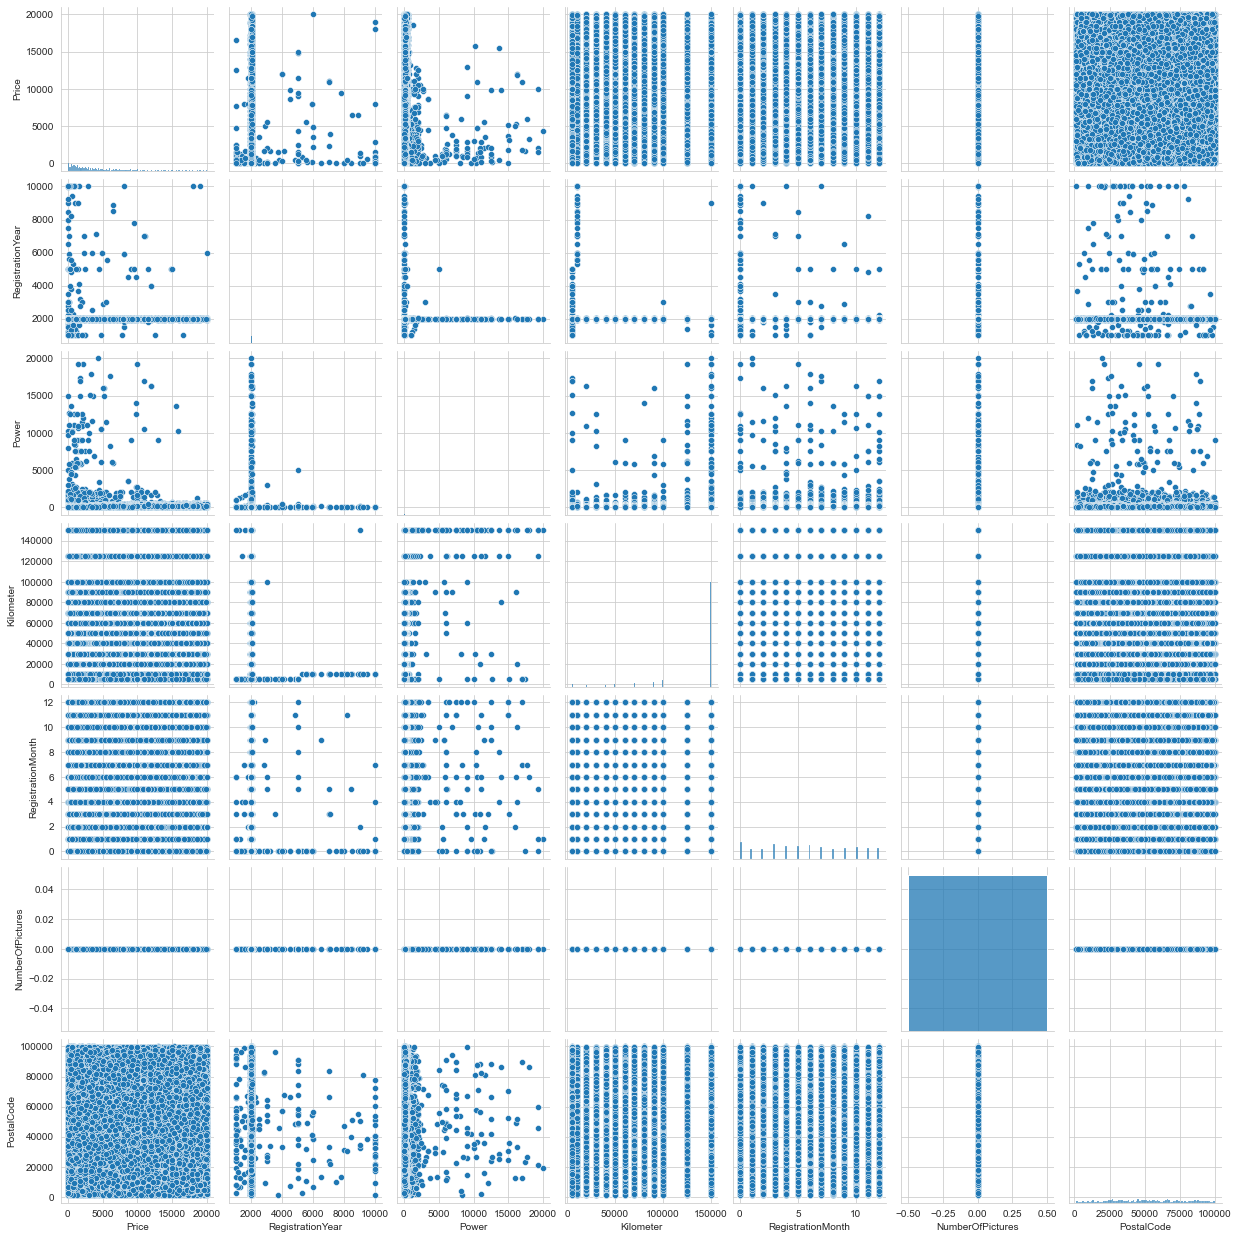

In [15]:
sb.pairplot(data);

In [116]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Conclusion: as long as there are categorical data which contains missing, it is reasonable to fill the missings out by the most frequent values in each column ('mode').

In [13]:
data["VehicleType"] = data["VehicleType"].fillna(data["VehicleType"].mode().values[0])
data["Gearbox"] = data["Gearbox"].fillna(data["Gearbox"].mode().values[0])
data["Model"] = data["Model"].fillna(data["Model"].mode().values[0])
data["FuelType"] = data["FuelType"].fillna(data["FuelType"].mode().values[0])

# если ячейка не заполнена, логично предположить, что ремонта не было - пропуски заполняем 'no'
data["Repaired"] = data["Repaired"].fillna("no")

In [14]:
# checking the results
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Conclusion: missings are gone, we can proceed.

## 1.3 Checking for dublicates

In [15]:
# taking the columns names' list
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [16]:
check_col = ['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen']
for col in check_col:
    print(col, pd.Series(data[col].unique()).duplicated().sum())

DateCrawled 0
Price 0
VehicleType 0
RegistrationYear 0
Gearbox 0
Power 0
Model 0
Kilometer 0
RegistrationMonth 0
FuelType 0
Brand 0
Repaired 0
DateCreated 0
NumberOfPictures 0
PostalCode 0
LastSeen 0


In [17]:
data.duplicated().sum()

5

In [18]:
data = data.drop_duplicates()

In [19]:
data.duplicated().sum()

0

#### Conclusion: dublicates are gone, we can proceed.

### 1.3.1 Removing the columns, which are needed for modelling

In [20]:
data_final = data.copy()

In [21]:
data_final = data_final.drop(['DateCrawled','DateCreated','LastSeen','NumberOfPictures','PostalCode'],axis = 1)

In [22]:
data_final.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired'],
      dtype='object')

In [23]:
# lowering all string names in the dataset
data_final.columns = data_final.columns.str.lower()

In [24]:
data_final.head()

price vehicletype  registrationyear gearbox  power  model  kilometer  \
0    480       sedan              1993  manual      0   golf     150000   
1  18300       coupe              2011  manual    190   golf     125000   
2   9800         suv              2004    auto    163  grand     125000   
3   1500       small              2001  manual     75   golf     150000   
4   3600       small              2008  manual     69  fabia      90000   

   registrationmonth  fueltype       brand repaired  
0                  0    petrol  volkswagen       no  
1                  5  gasoline        audi      yes  
2                  8  gasoline        jeep       no  
3                  6    petrol  volkswagen       no  
4                  7  gasoline       skoda       no

In [25]:
data_final.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'repaired'],
      dtype='object')

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Для удобства в дальнейшем анализе можно названия столбцов привести в более читаемый стиль snake_case. Здесь мы используем регулярные выражения.

Полезная <a href='https://habr.com/ru/post/545150/'>статья</a> про regex для начала
    
Этот блогер хорошо объясняет в своем <a href='https://www.youtube.com/watch?v=sHw5hLYFaIw&t=247s'>видео</a>
</div>

```python
df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
```
</div>

In [26]:
# checking the current output
temp = data_final.copy() 
list_c = ['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'repaired']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354364 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354364 non-null  int64 
 1   vehicletype        354364 non-null  object
 2   registrationyear   354364 non-null  int64 
 3   gearbox            354364 non-null  object
 4   power              354364 non-null  int64 
 5   model              354364 non-null  object
 6   kilometer          354364 non-null  int64 
 7   registrationmonth  354364 non-null  int64 
 8   fueltype           354364 non-null  object
 9   brand              354364 non-null  object
 10  repaired           354364 non-null  object
dtypes: int64(5), object(6)
memory usage: 32.4+ MB
None
-------------------------
price [    0     1     2 ... 19998 19999 20000]
price : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
vehicletype ['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'su

fueltype ['cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol']
fueltype : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
brand ['alfa_romeo' 'audi' 'bmw' 'chevrolet' 'chrysler' 'citroen' 'dacia'
 'daewoo' 'daihatsu' 'fiat' 'ford' 'honda' 'hyundai' 'jaguar' 'jeep' 'kia'
 'lada' 'lancia' 'land_rover' 'mazda' 'mercedes_benz' 'mini' 'mitsubishi'
 'nissan' 'opel' 'peugeot' 'porsche' 'renault' 'rover' 'saab' 'seat'
 'skoda' 'smart' 'sonstige_autos' 'subaru' 'suzuki' 'toyota' 'trabant'
 'volkswagen' 'volvo']
brand : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
repaired ['no' 'yes']
repaired : кол-во NaN 0 , процент NaN 0.0 %


#### Conclusion: good, the dataset is clean, we can proceed.

## 1.4 Working with outliers

In [27]:
data_final.describe()

price  registrationyear          power      kilometer  \
count  354364.000000     354364.000000  354364.000000  354364.000000   
mean     4416.655608       2004.234471     110.093723  128211.373051   
std      4514.159690         90.228593     189.851590   37905.136957   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       registrationmonth  
count      354364.000000  
mean            5.714641  
std             3.726433  
min             0.000000  
25%             3.000000  
50%             6.000000  
75%             9.000000  
max            12.000000

In [28]:
# renaming some columns' names

data_final = data_final.rename(columns={
    'vehicletype' : 'vehicle_type', 
    'registrationyear' : 'reg_year', 
       'kilometer': 'km', 
    'registrationmonth' : 'reg_month', 
    'fueltype': 'fuel_type'
})

In [29]:
data_final.describe()

price       reg_year          power             km  \
count  354364.000000  354364.000000  354364.000000  354364.000000   
mean     4416.655608    2004.234471     110.093723  128211.373051   
std      4514.159690      90.228593     189.851590   37905.136957   
min         0.000000    1000.000000       0.000000    5000.000000   
25%      1050.000000    1999.000000      69.000000  125000.000000   
50%      2700.000000    2003.000000     105.000000  150000.000000   
75%      6400.000000    2008.000000     143.000000  150000.000000   
max     20000.000000    9999.000000   20000.000000  150000.000000   

           reg_month  
count  354364.000000  
mean        5.714641  
std         3.726433  
min         0.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

***Conclusion:*** 
- the median heavily differ from the mean value in the colum 'price', which mean there are signifincat outliers in the column;

- also, the column 'reg_year' contains wierd values like 1000, which is not possible for the registration year value;

- also, the column 'power' contains outliers, since it is not possible to have a car with power = 0.

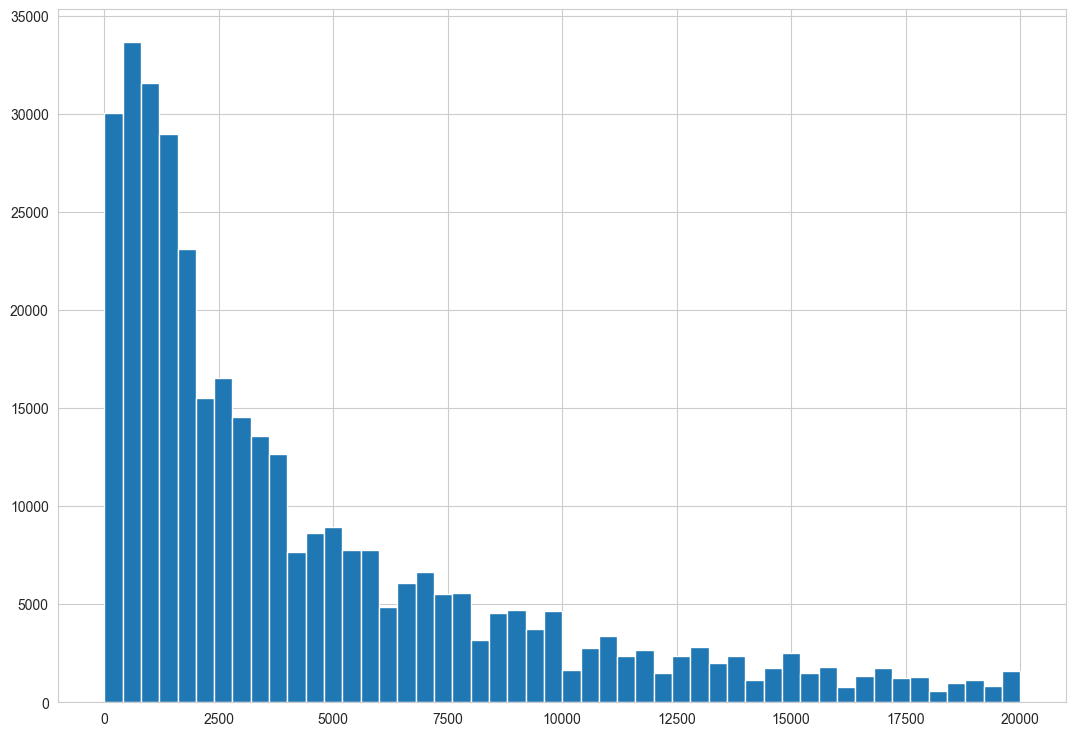

In [30]:
data_final['price'].hist(bins=50, figsize=(13, 9));

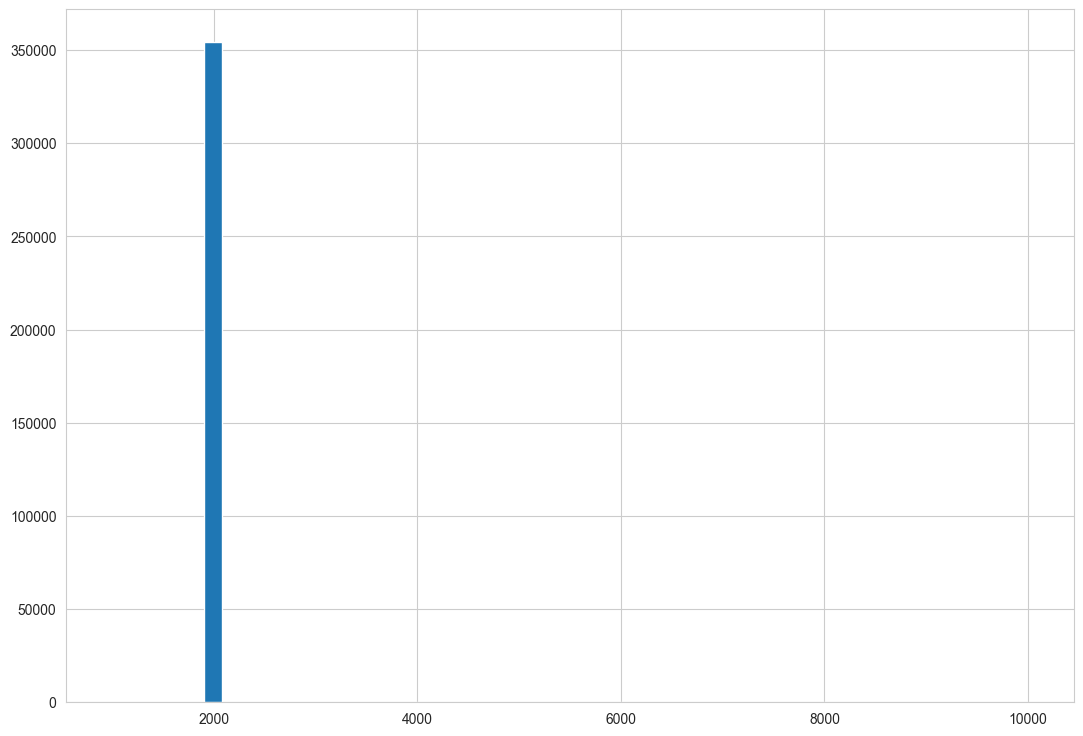

In [31]:
data_final['reg_year'].hist(bins=50, figsize=(13, 9));

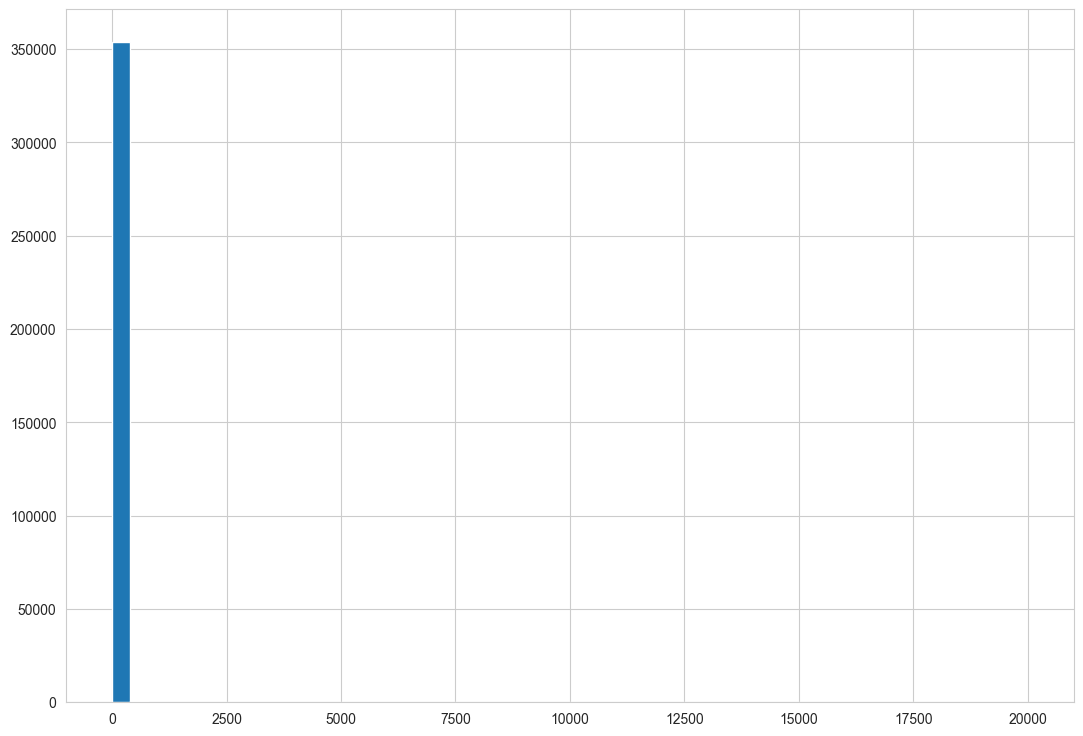

In [32]:
data_final['power'].hist(bins=50, figsize=(13, 9));

## 1.5  Removing outliers in ***'price'*** and ***'power'*** columns

In [33]:
# writing a function for outliers removal
def remove_ouliers(data, column):
    q25=np.array(data[column].quantile(0.25))
    q75=np.array(data[column].quantile(0.75))
    
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    
    del_index = []
    for index_value, value in zip(data[column].index, data[column]):
        if second_part <= value or value <= first_part:
            del_index.append(index_value)
    
    print('Number of rows for removal:' + str(column)+":",
          len(del_index))
    return del_index

In [34]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].min())

0


In [35]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].max())

20000


In [36]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].mode())

0    0
Name: power, dtype: int64


In [37]:
# filling the ouliers in column 'power'
data_final.loc[data_final['power'] > 3500, 'power'] = 3500
data_final.loc[data_final['power'] < 100, 'power'] = 100

In [38]:
# removing outliers

array_num_col = ['price', 'power']
count = 0 
for column in array_num_col:
    index_del = remove_ouliers(data_final, column)
    count += len(index_del)
    data_final = data_final.drop(index_del,axis = 0)
print('Removed:', count)

Number of rows for removal:price: 18979
Number of rows for removal:power: 18761
Removed: 37740


## 1.6  Removing outliers in 'reg_year' and 'reg_month' columns

In [39]:
# reg_year [2016 : 2022]
def reg_year_outliers(value):
    if value >= 2022:
        return 2022
    elif value <=2016:
        return 2016
    else:
        return value

In [40]:
# reg_year
data_final['reg_year'] = data_final['reg_year'].apply(reg_year_outliers)

In [41]:
# reg_month
data_final.loc[data_final['reg_month'] == 0, 'reg_month'] = 1

In [42]:
data_final.describe()

price       reg_year          power             km  \
count  316624.000000  316624.000000  316624.000000  316624.000000   
mean     3481.164368    2016.056629     117.407486  129705.660342   
std      3305.724332       0.293748      25.274596   36734.881748   
min         0.000000    2016.000000     100.000000    5000.000000   
25%       999.000000    2016.000000     100.000000  125000.000000   
50%      2300.000000    2016.000000     101.000000  150000.000000   
75%      4999.000000    2016.000000     131.000000  150000.000000   
max     14400.000000    2022.000000     199.000000  150000.000000   

           reg_month  
count  316624.000000  
mean        5.766534  
std         3.583524  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

### 1.7  Проверим признаки на мультиколлинеарность

In [43]:
data_final.corr()

price  reg_year     power        km  reg_month
price      1.000000 -0.041873  0.369308 -0.307265   0.106111
reg_year  -0.041873  1.000000 -0.049661 -0.002991  -0.046121
power      0.369308 -0.049661  1.000000  0.133318   0.066036
km        -0.307265 -0.002991  0.133318  1.000000   0.013966
reg_month  0.106111 -0.046121  0.066036  0.013966   1.000000

# 2  Обучение моделей

## 2.1 Spliting the data into three subsamples for three different purposes: training and testing.

```
As a benchmark, we split the sample in the proportion as follows:
- 60% train_data
- 20% validation_data
- 20% test_data

```

In [44]:
train_data, other_data = train_test_split(data_final, test_size=0.30, random_state=5)
validation_data, test_data = train_test_split(other_data, test_size=0.70, random_state=5)

print('Train sample size:', train_data.shape[0])
print('Validation sample size:', validation_data.shape[0])
print('Test sample size:', test_data.shape[0])

Train sample size: 221636
Validation sample size: 28496
Test sample size: 66492


## 2.2 Coding variables using OHE process as long as we are having _linear models_

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

Check out [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?ref=hackernoon.com) for more details about OHE.

***Applying OHE and saving a new dataset for further analysis. Also, trying to use OrdinalEncoder() to reduce the execution time.***

In [45]:
# One-Hot Encoding
train_data_ohe = pd.get_dummies(train_data, drop_first=True)
validation_data_ohe = pd.get_dummies(validation_data, drop_first=True)
test_data_ohe = pd.get_dummies(test_data, drop_first=True)

<div class="alert alert-block alert-warning">
<b>FYI</b>
    
OHE coding better to do after data split, not before. Otherwise, there can be data leakage.

More about data leakage: https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage

In [46]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки
X_train = train_data_ohe.drop(['price'], axis=1)
y_train = train_data_ohe['price']

X_valid = validation_data_ohe.drop(['price'], axis=1)
y_valid = validation_data_ohe['price']

X_test = test_data_ohe.drop(['price'], axis=1)
y_test = test_data_ohe['price']

In [47]:
print('Train features sample size:', X_train.shape[0])
print('Train target sample size:', y_train.shape[0])
print()
print('Test features sample size:', X_test.shape[0])
print('Test target sample size:', y_test.shape[0])

Train features sample size: 221636
Train target sample size: 221636

Test features sample size: 66492
Test target sample size: 66492


In [48]:
print('Validation features sample size:', X_valid.shape[0])
print('Validation target sample size:', y_valid.shape[0])

Validation features sample size: 28496
Validation target sample size: 28496


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221636 entries, 293759 to 333391
Columns: 305 entries, reg_year to repaired_yes
dtypes: int64(4), uint8(301)
memory usage: 72.1 MB


In [50]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28496 entries, 182485 to 219315
Columns: 289 entries, reg_year to repaired_yes
dtypes: int64(4), uint8(285)
memory usage: 8.8 MB


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66492 entries, 294936 to 29353
Columns: 300 entries, reg_year to repaired_yes
dtypes: int64(4), uint8(296)
memory usage: 21.3 MB


<div class="alert alert-block alert-info">
<b>FYI:</b> If after coding there are different number of columns in X_train (306), X_valid (299), X_test (300), it means in initial datasets there are different number of unique columns. Some features can be deleted, other (necessary ones) can be added.
</div>

## 2.3  Coding categorical variables with OrdinalEncoder()

***Modelling gradient boosting, decision tree, random forest takes a while. To speed up the process a bit, it is worth to use OrdinalEncoding() instead of OHE - coded data this way learns faster.***

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ord_enc = OrdinalEncoder()

In [54]:
# coding only categorical variables
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221636 entries, 293759 to 333391
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         221636 non-null  int64 
 1   vehicle_type  221636 non-null  object
 2   reg_year      221636 non-null  int64 
 3   gearbox       221636 non-null  object
 4   power         221636 non-null  int64 
 5   model         221636 non-null  object
 6   km            221636 non-null  int64 
 7   reg_month     221636 non-null  int64 
 8   fuel_type     221636 non-null  object
 9   brand         221636 non-null  object
 10  repaired      221636 non-null  object
dtypes: int64(5), object(6)
memory usage: 20.3+ MB


In [55]:
train_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(train_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [56]:
validation_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(validation_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [57]:
test_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(test_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [58]:
# after Ordinal Encoding we can split the dataset for further modeling
X_train_ord = train_data.drop(['price'], axis=1)
y_train_ord = train_data['price']

X_valid_ord = validation_data.drop(['price'], axis=1)
y_valid_ord = validation_data['price']

X_test_ord = test_data.drop(['price'], axis=1)
y_test_ord = test_data['price']

## 2.4  Preparing dataset for gradient boosting

In [59]:
# preparing dataset for gradient boosting models
data_boost = data_final.copy()
data_boost = data_boost.astype({'vehicle_type' : 'category',
                                                'gearbox' : 'category',
                                                'model' : 'category',
                                                'fuel_type' : 'category',
                                                'brand' : 'category',
                                                'repaired' : 'category'})

In [60]:
train_data_boost, other_data_boost = train_test_split(data_boost, test_size=0.30, random_state=5)
validation_data_boost, test_data_boost = train_test_split(other_data_boost, test_size=0.70, random_state=5)

print('Train sample size:', train_data_boost.shape[0])
print('Validation sample size:', validation_data_boost.shape[0])
print('Test sample size:', test_data_boost.shape[0])

Train sample size: 221636
Validation sample size: 28496
Test sample size: 66492


In [61]:
# train_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(train_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [62]:
# validation_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(validation_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [63]:
# test_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(test_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [64]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки - для градиентного бустинга
X_train_boost = train_data_boost.drop(['price'], axis=1)
y_train_boost = train_data_boost['price']

X_valid_boost = validation_data_boost.drop(['price'], axis=1)
y_valid_boost = validation_data_boost['price']

X_test_boost = test_data_boost.drop(['price'], axis=1)
y_test_boost = test_data_boost['price']

print('Train features sample size:', X_train_boost.shape[0])
print('Test target sample size:', y_train_boost.shape[0])
print()
print('Validation features sample size:', X_valid_boost.shape[0])
print('Validation target sample size:', y_valid_boost.shape[0])
print()
print('Test features sample size:', X_test_boost.shape[0])
print('Test target sample size:', y_test_boost.shape[0])

Train features sample size: 221636
Test target sample size: 221636

Validation features sample size: 28496
Validation target sample size: 28496

Test features sample size: 66492
Test target sample size: 66492


#### Conclusion: data was split into 6 subsamples 60/20/20 for training and testing purposes.

## 2.5  Обучение моделей

### 2.5.1 Changing type of variables in ***train, valid, test samples***

In [65]:
# changing the type of variables
X_train_ord['model'] = np.floor(pd.to_numeric(X_train_ord['model'], errors='coerce')).astype('float64')
X_train_ord['brand'] = np.floor(pd.to_numeric(X_train_ord['brand'], errors='coerce')).astype('float64')

X_valid_ord['model'] = np.floor(pd.to_numeric(X_valid_ord['model'], errors='coerce')).astype('float64')
X_valid_ord['brand'] = np.floor(pd.to_numeric(X_valid_ord['brand'], errors='coerce')).astype('float64')

X_test_ord['model'] = np.floor(pd.to_numeric(X_test_ord['model'], errors='coerce')).astype('float64')
X_test_ord['brand'] = np.floor(pd.to_numeric(X_test_ord['brand'], errors='coerce')).astype('float64')

# X_train_boost['model'] = np.floor(pd.to_numeric(X_train_boost['model'], errors='coerce')).astype('float64')
# X_train_boost['brand'] = np.floor(pd.to_numeric(X_train_boost['brand'], errors='coerce')).astype('float64')

# X_valid_boost['model'] = np.floor(pd.to_numeric(X_valid_boost['model'], errors='coerce')).astype('float64')
# X_valid_boost['brand'] = np.floor(pd.to_numeric(X_valid_boost['brand'], errors='coerce')).astype('float64')

# X_test_boost['model'] = np.floor(pd.to_numeric(X_test_boost['model'], errors='coerce')).astype('float64')
# X_test_boost['brand'] = np.floor(pd.to_numeric(X_test_boost['brand'], errors='coerce')).astype('float64')

In [66]:
X_train = np.nan_to_num(X_train)
X_valid = np.nan_to_num(X_valid)
X_test = np.nan_to_num(X_test)

y_train = np.nan_to_num(y_train)
y_valid = np.nan_to_num(y_valid)
y_test = np.nan_to_num(y_test)

In [67]:
X_train_ord = np.nan_to_num(X_train_ord)
X_valid_ord = np.nan_to_num(X_valid_ord)
X_test_ord = np.nan_to_num(X_test_ord)

y_train_ord = np.nan_to_num(y_train_ord)
y_valid_ord = np.nan_to_num(y_valid_ord)
y_test_ord = np.nan_to_num(y_test_ord)

In [68]:
# X_train_boost = np.nan_to_num(X_train_boost)
# X_valid_boost = np.nan_to_num(X_valid_boost)
# X_test_boost = np.nan_to_num(X_test_boost)

# y_train_boost = np.nan_to_num(y_train_boost)
# y_valid_boost = np.nan_to_num(y_valid_boost)
# y_test_boost = np.nan_to_num(y_test_boost)

In [69]:
# # changing the type of variables
# X_train_ord['model'] = np.floor(pd.to_numeric(X_train_ord['model'], errors='coerce')).astype('float64')
# X_train_ord['brand'] = np.floor(pd.to_numeric(X_train_ord['brand'], errors='coerce')).astype('float64')

# X_valid_ord['model'] = np.floor(pd.to_numeric(X_valid_ord['model'], errors='coerce')).astype('float64')
# X_valid_ord['brand'] = np.floor(pd.to_numeric(X_valid_ord['brand'], errors='coerce')).astype('float64')

# X_test_ord['model'] = np.floor(pd.to_numeric(X_test_ord['model'], errors='coerce')).astype('float64')
# X_test_ord['brand'] = np.floor(pd.to_numeric(X_test_ord['brand'], errors='coerce')).astype('float64')

#### Сравним, как обучаются модели Decision Tree Regressor, Random Forest Regressor, Dummy Regressor, lightGBM. 

***Using GridSearchCV in order to find best possible hyperparameters for the models - CatBoostRegressor (Pool), Decision Tree (DT), Random Forest (RF), Dummy Regressor, Gradient boosting (lightGBM).***

### 2.5.2 Cat Boost Regressor

In [74]:
# del data_ohe_features

In [81]:
%%time
# catboost
catboost = CatBoostRegressor(loss_function='RMSE')

parameters_boost = {'depth': [5, 10], 'learning_rate': np.arange(0.1,1,0.2)}

catboost_grid = catboost.grid_search(parameters_boost,
            Pool(X_train_boost, y_train_boost, cat_features=['vehicle_type',
                                                'gearbox',
                                                'model',
                                                'fuel_type',
                                                'brand',
                                                'repaired']),
            cv=3,
            verbose=True,
            plot=False)

0:	learn: 4452.4113461	test: 4470.6348982	best: 4470.6348982 (0)	total: 164ms	remaining: 2m 43s
1:	learn: 4153.8937241	test: 4170.8499474	best: 4170.8499474 (1)	total: 272ms	remaining: 2m 15s
2:	learn: 3891.9482503	test: 3908.1358783	best: 3908.1358783 (2)	total: 390ms	remaining: 2m 9s
3:	learn: 3667.7249105	test: 3683.9580091	best: 3683.9580091 (3)	total: 473ms	remaining: 1m 57s
4:	learn: 3472.9252958	test: 3488.2505365	best: 3488.2505365 (4)	total: 546ms	remaining: 1m 48s
5:	learn: 3303.7269245	test: 3317.9545176	best: 3317.9545176 (5)	total: 634ms	remaining: 1m 45s
6:	learn: 3156.7037277	test: 3169.4166834	best: 3169.4166834 (6)	total: 704ms	remaining: 1m 39s
7:	learn: 3030.4811091	test: 3041.7391609	best: 3041.7391609 (7)	total: 780ms	remaining: 1m 36s
8:	learn: 2919.3618940	test: 2929.7938537	best: 2929.7938537 (8)	total: 865ms	remaining: 1m 35s
9:	learn: 2823.3291632	test: 2833.8967836	best: 2833.8967836 (9)	total: 941ms	remaining: 1m 33s
10:	learn: 2744.3555063	test: 2754.185012

84:	learn: 2103.1529051	test: 2099.7337385	best: 2099.7337385 (84)	total: 6.62s	remaining: 1m 11s
85:	learn: 2102.0253676	test: 2098.6158237	best: 2098.6158237 (85)	total: 6.71s	remaining: 1m 11s
86:	learn: 2101.0396771	test: 2097.6220395	best: 2097.6220395 (86)	total: 6.76s	remaining: 1m 11s
87:	learn: 2100.2733452	test: 2096.9236193	best: 2096.9236193 (87)	total: 6.84s	remaining: 1m 10s
88:	learn: 2099.1709910	test: 2095.7253328	best: 2095.7253328 (88)	total: 6.91s	remaining: 1m 10s
89:	learn: 2097.1804938	test: 2093.2699340	best: 2093.2699340 (89)	total: 6.99s	remaining: 1m 10s
90:	learn: 2096.1421820	test: 2092.1838995	best: 2092.1838995 (90)	total: 7.08s	remaining: 1m 10s
91:	learn: 2094.8277615	test: 2090.8633238	best: 2090.8633238 (91)	total: 7.14s	remaining: 1m 10s
92:	learn: 2093.4678440	test: 2089.5000727	best: 2089.5000727 (92)	total: 7.21s	remaining: 1m 10s
93:	learn: 2092.7535399	test: 2088.6906804	best: 2088.6906804 (93)	total: 7.27s	remaining: 1m 10s
94:	learn: 2091.6134

170:	learn: 2030.2394871	test: 2025.8905218	best: 2025.8905218 (170)	total: 13.7s	remaining: 1m 6s
171:	learn: 2029.8185508	test: 2025.4488175	best: 2025.4488175 (171)	total: 13.7s	remaining: 1m 6s
172:	learn: 2029.4269679	test: 2025.1924636	best: 2025.1924636 (172)	total: 13.8s	remaining: 1m 5s
173:	learn: 2028.9664765	test: 2024.5685060	best: 2024.5685060 (173)	total: 13.8s	remaining: 1m 5s
174:	learn: 2028.5390670	test: 2024.1435175	best: 2024.1435175 (174)	total: 13.9s	remaining: 1m 5s
175:	learn: 2028.1883501	test: 2023.7357960	best: 2023.7357960 (175)	total: 14s	remaining: 1m 5s
176:	learn: 2027.8833397	test: 2023.4950676	best: 2023.4950676 (176)	total: 14.1s	remaining: 1m 5s
177:	learn: 2027.2646474	test: 2022.9597470	best: 2022.9597470 (177)	total: 14.2s	remaining: 1m 5s
178:	learn: 2026.9066395	test: 2022.7102937	best: 2022.7102937 (178)	total: 14.3s	remaining: 1m 5s
179:	learn: 2026.6016742	test: 2022.3875067	best: 2022.3875067 (179)	total: 14.4s	remaining: 1m 5s
180:	learn: 

256:	learn: 1992.8447019	test: 1990.8181884	best: 1990.8181884 (256)	total: 20.1s	remaining: 58.2s
257:	learn: 1992.4954476	test: 1990.4756825	best: 1990.4756825 (257)	total: 20.2s	remaining: 58.1s
258:	learn: 1992.1548302	test: 1990.1572679	best: 1990.1572679 (258)	total: 20.3s	remaining: 58s
259:	learn: 1991.8372010	test: 1989.8866669	best: 1989.8866669 (259)	total: 20.4s	remaining: 58s
260:	learn: 1991.6895657	test: 1989.7122091	best: 1989.7122091 (260)	total: 20.4s	remaining: 57.9s
261:	learn: 1991.4864513	test: 1989.6426028	best: 1989.6426028 (261)	total: 20.5s	remaining: 57.7s
262:	learn: 1991.1479562	test: 1989.4830603	best: 1989.4830603 (262)	total: 20.6s	remaining: 57.6s
263:	learn: 1990.8577338	test: 1989.1947184	best: 1989.1947184 (263)	total: 20.6s	remaining: 57.5s
264:	learn: 1990.6297438	test: 1988.9550301	best: 1988.9550301 (264)	total: 20.7s	remaining: 57.4s
265:	learn: 1990.2678072	test: 1988.6152308	best: 1988.6152308 (265)	total: 20.8s	remaining: 57.3s
266:	learn: 19

340:	learn: 1970.0420660	test: 1971.0579642	best: 1971.0579642 (340)	total: 26.8s	remaining: 51.9s
341:	learn: 1969.9876989	test: 1970.9914079	best: 1970.9914079 (341)	total: 26.9s	remaining: 51.8s
342:	learn: 1969.5240237	test: 1970.6279858	best: 1970.6279858 (342)	total: 27s	remaining: 51.7s
343:	learn: 1969.0673139	test: 1970.2812357	best: 1970.2812357 (343)	total: 27s	remaining: 51.6s
344:	learn: 1968.9270603	test: 1970.1811382	best: 1970.1811382 (344)	total: 27.1s	remaining: 51.5s
345:	learn: 1968.6183380	test: 1969.9194006	best: 1969.9194006 (345)	total: 27.2s	remaining: 51.3s
346:	learn: 1968.4402579	test: 1969.7190948	best: 1969.7190948 (346)	total: 27.2s	remaining: 51.2s
347:	learn: 1967.9953842	test: 1969.3259461	best: 1969.3259461 (347)	total: 27.3s	remaining: 51.1s
348:	learn: 1967.6591063	test: 1969.0022112	best: 1969.0022112 (348)	total: 27.4s	remaining: 51.1s
349:	learn: 1967.4494387	test: 1968.8445167	best: 1968.8445167 (349)	total: 27.5s	remaining: 51s
350:	learn: 1967

425:	learn: 1950.1898305	test: 1954.4669599	best: 1954.4669599 (425)	total: 33.5s	remaining: 45.2s
426:	learn: 1950.1259386	test: 1954.4014036	best: 1954.4014036 (426)	total: 33.6s	remaining: 45.1s
427:	learn: 1949.9965983	test: 1954.2939222	best: 1954.2939222 (427)	total: 33.7s	remaining: 45.1s
428:	learn: 1949.8429409	test: 1954.1349152	best: 1954.1349152 (428)	total: 33.8s	remaining: 45s
429:	learn: 1949.6094105	test: 1953.8424376	best: 1953.8424376 (429)	total: 33.9s	remaining: 44.9s
430:	learn: 1949.5191262	test: 1953.7827067	best: 1953.7827067 (430)	total: 34s	remaining: 44.9s
431:	learn: 1949.4773778	test: 1953.7651861	best: 1953.7651861 (431)	total: 34.1s	remaining: 44.8s
432:	learn: 1949.2714598	test: 1953.6681509	best: 1953.6681509 (432)	total: 34.2s	remaining: 44.7s
433:	learn: 1948.7808059	test: 1953.1613424	best: 1953.1613424 (433)	total: 34.3s	remaining: 44.7s
434:	learn: 1948.1022480	test: 1952.5066572	best: 1952.5066572 (434)	total: 34.4s	remaining: 44.6s
435:	learn: 19

509:	learn: 1935.5160024	test: 1941.7750990	best: 1941.7750990 (509)	total: 40.3s	remaining: 38.7s
510:	learn: 1935.3660687	test: 1941.7012945	best: 1941.7012945 (510)	total: 40.4s	remaining: 38.6s
511:	learn: 1935.0793332	test: 1941.3358913	best: 1941.3358913 (511)	total: 40.5s	remaining: 38.6s
512:	learn: 1934.9320557	test: 1941.1715923	best: 1941.1715923 (512)	total: 40.5s	remaining: 38.5s
513:	learn: 1934.7593029	test: 1940.9868749	best: 1940.9868749 (513)	total: 40.6s	remaining: 38.4s
514:	learn: 1934.6786100	test: 1940.9181772	best: 1940.9181772 (514)	total: 40.7s	remaining: 38.3s
515:	learn: 1934.4101800	test: 1940.6791329	best: 1940.6791329 (515)	total: 40.7s	remaining: 38.2s
516:	learn: 1934.3327106	test: 1940.6485485	best: 1940.6485485 (516)	total: 40.8s	remaining: 38.1s
517:	learn: 1934.1571008	test: 1940.4926139	best: 1940.4926139 (517)	total: 40.8s	remaining: 38s
518:	learn: 1934.0876426	test: 1940.4388719	best: 1940.4388719 (518)	total: 40.9s	remaining: 37.9s
519:	learn: 

594:	learn: 1923.9755232	test: 1932.3757275	best: 1932.3757275 (594)	total: 46.8s	remaining: 31.9s
595:	learn: 1923.9494972	test: 1932.3407123	best: 1932.3407123 (595)	total: 46.9s	remaining: 31.8s
596:	learn: 1923.7496235	test: 1932.0993396	best: 1932.0993396 (596)	total: 46.9s	remaining: 31.7s
597:	learn: 1923.6265311	test: 1932.0562902	best: 1932.0562902 (597)	total: 47s	remaining: 31.6s
598:	learn: 1923.4313195	test: 1931.9273593	best: 1931.9273593 (598)	total: 47.1s	remaining: 31.5s
599:	learn: 1923.1707395	test: 1931.7798843	best: 1931.7798843 (599)	total: 47.2s	remaining: 31.4s
600:	learn: 1923.0899490	test: 1931.7475151	best: 1931.7475151 (600)	total: 47.3s	remaining: 31.4s
601:	learn: 1922.7850876	test: 1931.2842987	best: 1931.2842987 (601)	total: 47.4s	remaining: 31.3s
602:	learn: 1922.6538504	test: 1931.1879543	best: 1931.1879543 (602)	total: 47.4s	remaining: 31.2s
603:	learn: 1922.6042786	test: 1931.1382044	best: 1931.1382044 (603)	total: 47.5s	remaining: 31.1s
604:	learn: 

680:	learn: 1913.8706938	test: 1924.4429835	best: 1924.4429835 (680)	total: 53.5s	remaining: 25s
681:	learn: 1913.8225641	test: 1924.4089696	best: 1924.4089696 (681)	total: 53.5s	remaining: 25s
682:	learn: 1913.7267028	test: 1924.3874712	best: 1924.3874712 (682)	total: 53.6s	remaining: 24.9s
683:	learn: 1913.6532555	test: 1924.4053509	best: 1924.3874712 (682)	total: 53.7s	remaining: 24.8s
684:	learn: 1913.6372696	test: 1924.4186448	best: 1924.3874712 (682)	total: 53.7s	remaining: 24.7s
685:	learn: 1913.6090529	test: 1924.3826551	best: 1924.3826551 (685)	total: 53.8s	remaining: 24.6s
686:	learn: 1913.4400803	test: 1924.2249736	best: 1924.2249736 (686)	total: 53.9s	remaining: 24.5s
687:	learn: 1913.2696018	test: 1924.1173636	best: 1924.1173636 (687)	total: 53.9s	remaining: 24.5s
688:	learn: 1913.2160430	test: 1924.0895072	best: 1924.0895072 (688)	total: 54s	remaining: 24.4s
689:	learn: 1913.1243348	test: 1924.0353032	best: 1924.0353032 (689)	total: 54.1s	remaining: 24.3s
690:	learn: 1913

765:	learn: 1906.2000424	test: 1919.0366491	best: 1919.0366491 (765)	total: 60s	remaining: 18.3s
766:	learn: 1906.0447227	test: 1918.9546131	best: 1918.9546131 (766)	total: 1m	remaining: 18.3s
767:	learn: 1905.9122586	test: 1918.9400214	best: 1918.9400214 (767)	total: 1m	remaining: 18.2s
768:	learn: 1905.8399282	test: 1918.8946491	best: 1918.8946491 (768)	total: 1m	remaining: 18.1s
769:	learn: 1905.7966545	test: 1918.8538076	best: 1918.8538076 (769)	total: 1m	remaining: 18s
770:	learn: 1905.7019219	test: 1918.8002504	best: 1918.8002504 (770)	total: 1m	remaining: 18s
771:	learn: 1905.1662606	test: 1918.1884810	best: 1918.1884810 (771)	total: 1m	remaining: 17.9s
772:	learn: 1905.0860175	test: 1918.1856529	best: 1918.1856529 (772)	total: 1m	remaining: 17.8s
773:	learn: 1905.0599771	test: 1918.1934328	best: 1918.1856529 (772)	total: 1m	remaining: 17.7s
774:	learn: 1905.0216414	test: 1918.1406746	best: 1918.1406746 (774)	total: 1m	remaining: 17.6s
775:	learn: 1904.9821941	test: 1918.0953511

849:	learn: 1897.2065528	test: 1912.1715770	best: 1912.1715770 (849)	total: 1m 6s	remaining: 11.8s
850:	learn: 1897.1702525	test: 1912.1534674	best: 1912.1534674 (850)	total: 1m 6s	remaining: 11.7s
851:	learn: 1897.1264999	test: 1912.1300298	best: 1912.1300298 (851)	total: 1m 6s	remaining: 11.6s
852:	learn: 1896.9064282	test: 1911.9700214	best: 1911.9700214 (852)	total: 1m 7s	remaining: 11.5s
853:	learn: 1896.8558804	test: 1911.9319343	best: 1911.9319343 (853)	total: 1m 7s	remaining: 11.5s
854:	learn: 1896.7971276	test: 1911.8993575	best: 1911.8993575 (854)	total: 1m 7s	remaining: 11.4s
855:	learn: 1896.7686890	test: 1911.8668359	best: 1911.8668359 (855)	total: 1m 7s	remaining: 11.3s
856:	learn: 1896.6725618	test: 1911.8114556	best: 1911.8114556 (856)	total: 1m 7s	remaining: 11.2s
857:	learn: 1896.6408459	test: 1911.7973127	best: 1911.7973127 (857)	total: 1m 7s	remaining: 11.1s
858:	learn: 1896.5882311	test: 1911.7735189	best: 1911.7735189 (858)	total: 1m 7s	remaining: 11s
859:	learn: 

933:	learn: 1890.4697632	test: 1906.8619903	best: 1906.8435999 (932)	total: 1m 13s	remaining: 5.19s
934:	learn: 1890.4370992	test: 1906.8333499	best: 1906.8333499 (934)	total: 1m 13s	remaining: 5.11s
935:	learn: 1890.3735819	test: 1906.7699446	best: 1906.7699446 (935)	total: 1m 13s	remaining: 5.03s
936:	learn: 1890.3521887	test: 1906.7525710	best: 1906.7525710 (936)	total: 1m 13s	remaining: 4.96s
937:	learn: 1890.2933550	test: 1906.6917781	best: 1906.6917781 (937)	total: 1m 13s	remaining: 4.88s
938:	learn: 1890.2736385	test: 1906.6807981	best: 1906.6807981 (938)	total: 1m 13s	remaining: 4.79s
939:	learn: 1890.2423194	test: 1906.6706125	best: 1906.6706125 (939)	total: 1m 13s	remaining: 4.72s
940:	learn: 1890.1344990	test: 1906.6148695	best: 1906.6148695 (940)	total: 1m 13s	remaining: 4.64s
941:	learn: 1889.9248023	test: 1906.4553240	best: 1906.4553240 (941)	total: 1m 14s	remaining: 4.56s
942:	learn: 1889.8598117	test: 1906.4309761	best: 1906.4309761 (942)	total: 1m 14s	remaining: 4.48s


16:	learn: 2164.2481111	test: 2165.6487803	best: 2165.6487803 (16)	total: 1.42s	remaining: 1m 22s
17:	learn: 2159.4825023	test: 2160.3916447	best: 2160.3916447 (17)	total: 1.52s	remaining: 1m 23s
18:	learn: 2154.8782704	test: 2155.6087954	best: 2155.6087954 (18)	total: 1.67s	remaining: 1m 26s
19:	learn: 2151.2144455	test: 2151.5712025	best: 2151.5712025 (19)	total: 1.76s	remaining: 1m 26s
20:	learn: 2145.4664672	test: 2145.8137349	best: 2145.8137349 (20)	total: 1.83s	remaining: 1m 25s
21:	learn: 2141.9836570	test: 2142.1801462	best: 2142.1801462 (21)	total: 1.88s	remaining: 1m 23s
22:	learn: 2137.8435321	test: 2137.7899903	best: 2137.7899903 (22)	total: 1.96s	remaining: 1m 23s
23:	learn: 2131.0613563	test: 2130.9302791	best: 2130.9302791 (23)	total: 2.06s	remaining: 1m 23s
24:	learn: 2125.0449767	test: 2124.5552441	best: 2124.5552441 (24)	total: 2.16s	remaining: 1m 24s
25:	learn: 2121.9231530	test: 2121.4541436	best: 2121.4541436 (25)	total: 2.22s	remaining: 1m 23s
26:	learn: 2119.3815

101:	learn: 1985.8023367	test: 1989.4802741	best: 1989.4802741 (101)	total: 8.29s	remaining: 1m 12s
102:	learn: 1984.1211789	test: 1988.1780501	best: 1988.1780501 (102)	total: 8.38s	remaining: 1m 12s
103:	learn: 1983.1866872	test: 1987.0954367	best: 1987.0954367 (103)	total: 8.44s	remaining: 1m 12s
104:	learn: 1982.1707817	test: 1986.6327041	best: 1986.6327041 (104)	total: 8.51s	remaining: 1m 12s
105:	learn: 1981.0773106	test: 1986.0073927	best: 1986.0073927 (105)	total: 8.59s	remaining: 1m 12s
106:	learn: 1980.4084017	test: 1985.3612939	best: 1985.3612939 (106)	total: 8.66s	remaining: 1m 12s
107:	learn: 1979.9278061	test: 1984.6944538	best: 1984.6944538 (107)	total: 8.76s	remaining: 1m 12s
108:	learn: 1976.6161595	test: 1981.2438316	best: 1981.2438316 (108)	total: 8.91s	remaining: 1m 12s
109:	learn: 1975.6990871	test: 1980.0781022	best: 1980.0781022 (109)	total: 9.02s	remaining: 1m 12s
110:	learn: 1974.9774537	test: 1979.6144405	best: 1979.6144405 (110)	total: 9.07s	remaining: 1m 12s


187:	learn: 1935.2059951	test: 1946.5813481	best: 1946.5813481 (187)	total: 15.3s	remaining: 1m 5s
188:	learn: 1934.8646884	test: 1946.4954913	best: 1946.4954913 (188)	total: 15.3s	remaining: 1m 5s
189:	learn: 1934.1034667	test: 1945.9740500	best: 1945.9740500 (189)	total: 15.4s	remaining: 1m 5s
190:	learn: 1933.4171053	test: 1945.0588233	best: 1945.0588233 (190)	total: 15.5s	remaining: 1m 5s
191:	learn: 1933.0039623	test: 1944.7702091	best: 1944.7702091 (191)	total: 15.5s	remaining: 1m 5s
192:	learn: 1932.8008944	test: 1944.4993600	best: 1944.4993600 (192)	total: 15.6s	remaining: 1m 5s
193:	learn: 1931.6275710	test: 1943.2089690	best: 1943.2089690 (193)	total: 15.7s	remaining: 1m 5s
194:	learn: 1931.3751344	test: 1943.2049807	best: 1943.2049807 (194)	total: 15.8s	remaining: 1m 5s
195:	learn: 1930.9450498	test: 1942.8029718	best: 1942.8029718 (195)	total: 15.8s	remaining: 1m 4s
196:	learn: 1930.5905390	test: 1942.4294255	best: 1942.4294255 (196)	total: 15.9s	remaining: 1m 4s
197:	learn

272:	learn: 1901.8010631	test: 1918.8055984	best: 1918.8055984 (272)	total: 21.9s	remaining: 58.4s
273:	learn: 1901.3912092	test: 1918.6125594	best: 1918.6125594 (273)	total: 22s	remaining: 58.3s
274:	learn: 1901.1997235	test: 1918.5579972	best: 1918.5579972 (274)	total: 22.1s	remaining: 58.1s
275:	learn: 1900.8692940	test: 1918.1771433	best: 1918.1771433 (275)	total: 22.1s	remaining: 58s
276:	learn: 1900.3629206	test: 1917.5956826	best: 1917.5956826 (276)	total: 22.2s	remaining: 58s
277:	learn: 1900.2536929	test: 1917.5778557	best: 1917.5778557 (277)	total: 22.3s	remaining: 57.8s
278:	learn: 1900.2041764	test: 1917.5338120	best: 1917.5338120 (278)	total: 22.3s	remaining: 57.7s
279:	learn: 1900.1673345	test: 1917.5564693	best: 1917.5338120 (278)	total: 22.4s	remaining: 57.5s
280:	learn: 1899.7780985	test: 1917.0971701	best: 1917.0971701 (280)	total: 22.4s	remaining: 57.4s
281:	learn: 1899.0905699	test: 1916.7910599	best: 1916.7910599 (281)	total: 22.5s	remaining: 57.4s
282:	learn: 1898

359:	learn: 1883.0680197	test: 1905.6918583	best: 1905.6918583 (359)	total: 28.9s	remaining: 51.4s
360:	learn: 1882.3631755	test: 1904.9701212	best: 1904.9701212 (360)	total: 29s	remaining: 51.3s
361:	learn: 1882.2396325	test: 1904.9864452	best: 1904.9701212 (360)	total: 29.1s	remaining: 51.2s
362:	learn: 1882.1954766	test: 1904.9123765	best: 1904.9123765 (362)	total: 29.2s	remaining: 51.2s
363:	learn: 1882.0627120	test: 1904.8452388	best: 1904.8452388 (363)	total: 29.3s	remaining: 51.1s
364:	learn: 1881.7750795	test: 1904.6995162	best: 1904.6995162 (364)	total: 29.3s	remaining: 51s
365:	learn: 1881.7486175	test: 1904.7082183	best: 1904.6995162 (364)	total: 29.4s	remaining: 50.9s
366:	learn: 1881.6037869	test: 1904.7058972	best: 1904.6995162 (364)	total: 29.4s	remaining: 50.8s
367:	learn: 1881.2686585	test: 1904.4724300	best: 1904.4724300 (367)	total: 29.5s	remaining: 50.7s
368:	learn: 1881.1792899	test: 1904.4684288	best: 1904.4684288 (368)	total: 29.6s	remaining: 50.6s
369:	learn: 18

444:	learn: 1866.0851474	test: 1893.7068087	best: 1893.7068087 (444)	total: 36s	remaining: 44.9s
445:	learn: 1865.9430872	test: 1893.7165944	best: 1893.7068087 (444)	total: 36.1s	remaining: 44.9s
446:	learn: 1865.7292273	test: 1893.6171812	best: 1893.6171812 (446)	total: 36.2s	remaining: 44.8s
447:	learn: 1865.6690990	test: 1893.6096567	best: 1893.6096567 (447)	total: 36.2s	remaining: 44.7s
448:	learn: 1865.3836167	test: 1893.6135148	best: 1893.6096567 (447)	total: 36.3s	remaining: 44.6s
449:	learn: 1865.0783962	test: 1893.4172914	best: 1893.4172914 (449)	total: 36.5s	remaining: 44.6s
450:	learn: 1865.0196985	test: 1893.4134932	best: 1893.4134932 (450)	total: 36.5s	remaining: 44.5s
451:	learn: 1864.8922562	test: 1893.3510133	best: 1893.3510133 (451)	total: 36.6s	remaining: 44.4s
452:	learn: 1864.8419538	test: 1893.2825334	best: 1893.2825334 (452)	total: 36.7s	remaining: 44.4s
453:	learn: 1864.6848501	test: 1893.0821434	best: 1893.0821434 (453)	total: 36.8s	remaining: 44.3s
454:	learn: 

530:	learn: 1853.7793506	test: 1886.6772491	best: 1886.6692408 (529)	total: 43s	remaining: 38s
531:	learn: 1853.5991234	test: 1886.6534626	best: 1886.6534626 (531)	total: 43.1s	remaining: 37.9s
532:	learn: 1853.5445419	test: 1886.5829727	best: 1886.5829727 (532)	total: 43.2s	remaining: 37.8s
533:	learn: 1853.2595514	test: 1886.2425808	best: 1886.2425808 (533)	total: 43.2s	remaining: 37.7s
534:	learn: 1853.1189751	test: 1886.1495253	best: 1886.1495253 (534)	total: 43.3s	remaining: 37.6s
535:	learn: 1853.0237140	test: 1886.1461012	best: 1886.1461012 (535)	total: 43.4s	remaining: 37.6s
536:	learn: 1852.9047595	test: 1886.1633841	best: 1886.1461012 (535)	total: 43.5s	remaining: 37.5s
537:	learn: 1852.8695156	test: 1886.1537025	best: 1886.1461012 (535)	total: 43.5s	remaining: 37.4s
538:	learn: 1852.7725583	test: 1886.1394837	best: 1886.1394837 (538)	total: 43.6s	remaining: 37.3s
539:	learn: 1852.6160314	test: 1886.0669765	best: 1886.0669765 (539)	total: 43.7s	remaining: 37.2s
540:	learn: 18

616:	learn: 1842.4515482	test: 1880.7325915	best: 1880.7325915 (616)	total: 49.8s	remaining: 30.9s
617:	learn: 1842.3677179	test: 1880.6717551	best: 1880.6717551 (617)	total: 49.9s	remaining: 30.9s
618:	learn: 1842.3353995	test: 1880.6824988	best: 1880.6717551 (617)	total: 50s	remaining: 30.8s
619:	learn: 1842.3178506	test: 1880.6849786	best: 1880.6717551 (617)	total: 50.1s	remaining: 30.7s
620:	learn: 1842.0874883	test: 1880.5968213	best: 1880.5968213 (620)	total: 50.2s	remaining: 30.6s
621:	learn: 1841.9201119	test: 1880.5092446	best: 1880.5092446 (621)	total: 50.2s	remaining: 30.5s
622:	learn: 1841.8404794	test: 1880.4062767	best: 1880.4062767 (622)	total: 50.3s	remaining: 30.4s
623:	learn: 1841.7971298	test: 1880.4263480	best: 1880.4062767 (622)	total: 50.4s	remaining: 30.3s
624:	learn: 1841.3500986	test: 1880.0441791	best: 1880.0441791 (624)	total: 50.4s	remaining: 30.3s
625:	learn: 1841.2824540	test: 1879.9785655	best: 1879.9785655 (625)	total: 50.5s	remaining: 30.2s
626:	learn: 

702:	learn: 1831.8435455	test: 1874.2269919	best: 1874.2269919 (702)	total: 55.6s	remaining: 23.5s
703:	learn: 1831.7257634	test: 1874.1520903	best: 1874.1520903 (703)	total: 55.7s	remaining: 23.4s
704:	learn: 1831.6329177	test: 1874.1193742	best: 1874.1193742 (704)	total: 55.7s	remaining: 23.3s
705:	learn: 1831.6118985	test: 1874.1187709	best: 1874.1187709 (705)	total: 55.8s	remaining: 23.2s
706:	learn: 1831.5340722	test: 1874.0940653	best: 1874.0940653 (706)	total: 55.9s	remaining: 23.2s
707:	learn: 1831.3943426	test: 1874.1684994	best: 1874.0940653 (706)	total: 55.9s	remaining: 23.1s
708:	learn: 1831.2850749	test: 1874.1610258	best: 1874.0940653 (706)	total: 56s	remaining: 23s
709:	learn: 1830.9551357	test: 1873.7459281	best: 1873.7459281 (709)	total: 56s	remaining: 22.9s
710:	learn: 1830.4245489	test: 1873.1642628	best: 1873.1642628 (710)	total: 56.1s	remaining: 22.8s
711:	learn: 1829.9066658	test: 1872.7441238	best: 1872.7441238 (711)	total: 56.2s	remaining: 22.7s
712:	learn: 1829

788:	learn: 1822.2055763	test: 1868.8665832	best: 1868.8665832 (788)	total: 1m 2s	remaining: 16.8s
789:	learn: 1822.0991296	test: 1868.7042211	best: 1868.7042211 (789)	total: 1m 2s	remaining: 16.7s
790:	learn: 1821.7732812	test: 1868.5111396	best: 1868.5111396 (790)	total: 1m 2s	remaining: 16.6s
791:	learn: 1821.6401933	test: 1868.4861137	best: 1868.4861137 (791)	total: 1m 2s	remaining: 16.5s
792:	learn: 1821.4609501	test: 1868.3806926	best: 1868.3806926 (792)	total: 1m 2s	remaining: 16.4s
793:	learn: 1821.3329918	test: 1868.4009034	best: 1868.3806926 (792)	total: 1m 3s	remaining: 16.4s
794:	learn: 1821.2108502	test: 1868.3939255	best: 1868.3806926 (792)	total: 1m 3s	remaining: 16.3s
795:	learn: 1821.0633617	test: 1868.4415146	best: 1868.3806926 (792)	total: 1m 3s	remaining: 16.2s
796:	learn: 1820.8613108	test: 1868.3088619	best: 1868.3088619 (796)	total: 1m 3s	remaining: 16.1s
797:	learn: 1820.6558421	test: 1868.2135969	best: 1868.2135969 (797)	total: 1m 3s	remaining: 16s
798:	learn: 

872:	learn: 1814.1267064	test: 1864.8547944	best: 1864.8547944 (872)	total: 1m 9s	remaining: 10.1s
873:	learn: 1814.0587121	test: 1864.9209137	best: 1864.8547944 (872)	total: 1m 9s	remaining: 10s
874:	learn: 1814.0305056	test: 1864.8700993	best: 1864.8547944 (872)	total: 1m 9s	remaining: 9.97s
875:	learn: 1813.8817531	test: 1864.7546913	best: 1864.7546913 (875)	total: 1m 9s	remaining: 9.89s
876:	learn: 1813.7481196	test: 1864.7165862	best: 1864.7165862 (876)	total: 1m 9s	remaining: 9.82s
877:	learn: 1813.5416567	test: 1864.5691408	best: 1864.5691408 (877)	total: 1m 10s	remaining: 9.74s
878:	learn: 1813.5202442	test: 1864.5810836	best: 1864.5691408 (877)	total: 1m 10s	remaining: 9.66s
879:	learn: 1813.4768958	test: 1864.5707214	best: 1864.5691408 (877)	total: 1m 10s	remaining: 9.57s
880:	learn: 1813.4359415	test: 1864.5340302	best: 1864.5340302 (880)	total: 1m 10s	remaining: 9.49s
881:	learn: 1813.3784846	test: 1864.4681409	best: 1864.4681409 (881)	total: 1m 10s	remaining: 9.41s
882:	le

955:	learn: 1807.0818179	test: 1861.0786006	best: 1861.0786006 (955)	total: 1m 16s	remaining: 3.52s
956:	learn: 1806.9316012	test: 1861.0991345	best: 1861.0786006 (955)	total: 1m 16s	remaining: 3.44s
957:	learn: 1806.8470127	test: 1861.1336844	best: 1861.0786006 (955)	total: 1m 16s	remaining: 3.36s
958:	learn: 1806.7720473	test: 1861.1474093	best: 1861.0786006 (955)	total: 1m 16s	remaining: 3.29s
959:	learn: 1806.6974640	test: 1861.1583145	best: 1861.0786006 (955)	total: 1m 16s	remaining: 3.21s
960:	learn: 1806.6704922	test: 1861.1513284	best: 1861.0786006 (955)	total: 1m 17s	remaining: 3.13s
961:	learn: 1806.5839642	test: 1861.1097892	best: 1861.0786006 (955)	total: 1m 17s	remaining: 3.05s
962:	learn: 1806.5216324	test: 1861.1220569	best: 1861.0786006 (955)	total: 1m 17s	remaining: 2.97s
963:	learn: 1806.4935764	test: 1861.1019459	best: 1861.0786006 (955)	total: 1m 17s	remaining: 2.89s
964:	learn: 1806.4645155	test: 1861.1167880	best: 1861.0786006 (955)	total: 1m 17s	remaining: 2.81s


38:	learn: 2028.9203500	test: 2022.6578554	best: 2022.6578554 (38)	total: 3.48s	remaining: 1m 25s
39:	learn: 2026.5970013	test: 2020.1613418	best: 2020.1613418 (39)	total: 3.53s	remaining: 1m 24s
40:	learn: 2025.4452321	test: 2019.1201166	best: 2019.1201166 (40)	total: 3.59s	remaining: 1m 23s
41:	learn: 2023.7841568	test: 2017.8638540	best: 2017.8638540 (41)	total: 3.67s	remaining: 1m 23s
42:	learn: 2021.4171321	test: 2015.4563762	best: 2015.4563762 (42)	total: 3.76s	remaining: 1m 23s
43:	learn: 2020.2366769	test: 2014.5690476	best: 2014.5690476 (43)	total: 3.87s	remaining: 1m 24s
44:	learn: 2017.0868814	test: 2012.2513178	best: 2012.2513178 (44)	total: 3.94s	remaining: 1m 23s
45:	learn: 2015.4475209	test: 2010.5673059	best: 2010.5673059 (45)	total: 4s	remaining: 1m 22s
46:	learn: 2013.2419317	test: 2007.8272289	best: 2007.8272289 (46)	total: 4.09s	remaining: 1m 22s
47:	learn: 2011.2597778	test: 2005.5654642	best: 2005.5654642 (47)	total: 4.18s	remaining: 1m 22s
48:	learn: 2008.8455356

122:	learn: 1923.3479165	test: 1931.5778202	best: 1931.5778202 (122)	total: 9.73s	remaining: 1m 9s
123:	learn: 1922.9587421	test: 1931.1550315	best: 1931.1550315 (123)	total: 9.81s	remaining: 1m 9s
124:	learn: 1922.2525793	test: 1930.7045736	best: 1930.7045736 (124)	total: 9.89s	remaining: 1m 9s
125:	learn: 1921.6528997	test: 1930.2275588	best: 1930.2275588 (125)	total: 10s	remaining: 1m 9s
126:	learn: 1921.3652363	test: 1929.8703272	best: 1929.8703272 (126)	total: 10.1s	remaining: 1m 9s
127:	learn: 1920.9829983	test: 1929.7187912	best: 1929.7187912 (127)	total: 10.2s	remaining: 1m 9s
128:	learn: 1920.5865585	test: 1929.5778184	best: 1929.5778184 (128)	total: 10.2s	remaining: 1m 8s
129:	learn: 1919.8824334	test: 1929.1149455	best: 1929.1149455 (129)	total: 10.3s	remaining: 1m 8s
130:	learn: 1919.4161931	test: 1929.1502102	best: 1929.1149455 (129)	total: 10.4s	remaining: 1m 8s
131:	learn: 1918.8563460	test: 1928.8835940	best: 1928.8835940 (131)	total: 10.4s	remaining: 1m 8s
132:	learn: 

207:	learn: 1887.6670305	test: 1908.4581748	best: 1907.8950668 (204)	total: 16.1s	remaining: 1m 1s
208:	learn: 1887.0162974	test: 1907.9153863	best: 1907.8950668 (204)	total: 16.2s	remaining: 1m 1s
209:	learn: 1886.6982737	test: 1907.8784983	best: 1907.8784983 (209)	total: 16.4s	remaining: 1m 1s
210:	learn: 1886.3455169	test: 1907.7713280	best: 1907.7713280 (210)	total: 16.4s	remaining: 1m 1s
211:	learn: 1886.0284169	test: 1907.5525732	best: 1907.5525732 (211)	total: 16.5s	remaining: 1m 1s
212:	learn: 1885.9149835	test: 1907.3947895	best: 1907.3947895 (212)	total: 16.5s	remaining: 1m 1s
213:	learn: 1885.8536686	test: 1907.2987804	best: 1907.2987804 (213)	total: 16.6s	remaining: 1m
214:	learn: 1885.7890675	test: 1907.2442503	best: 1907.2442503 (214)	total: 16.7s	remaining: 1m
215:	learn: 1885.1207230	test: 1906.7243386	best: 1906.7243386 (215)	total: 16.8s	remaining: 1m
216:	learn: 1884.9329881	test: 1906.6185269	best: 1906.6185269 (216)	total: 16.8s	remaining: 1m
217:	learn: 1884.32388

291:	learn: 1864.5619756	test: 1895.3265746	best: 1895.1295384 (289)	total: 23.1s	remaining: 56.1s
292:	learn: 1864.5235344	test: 1895.3251433	best: 1895.1295384 (289)	total: 23.2s	remaining: 56s
293:	learn: 1864.2195415	test: 1895.2116900	best: 1895.1295384 (289)	total: 23.2s	remaining: 55.8s
294:	learn: 1863.9853724	test: 1895.2017276	best: 1895.1295384 (289)	total: 23.3s	remaining: 55.7s
295:	learn: 1863.9680531	test: 1895.1981267	best: 1895.1295384 (289)	total: 23.4s	remaining: 55.6s
296:	learn: 1863.5532505	test: 1894.6718896	best: 1894.6718896 (296)	total: 23.5s	remaining: 55.5s
297:	learn: 1863.2612213	test: 1894.5506856	best: 1894.5506856 (297)	total: 23.5s	remaining: 55.4s
298:	learn: 1862.8290753	test: 1894.5039275	best: 1894.5039275 (298)	total: 23.6s	remaining: 55.3s
299:	learn: 1862.5502146	test: 1894.0625487	best: 1894.0625487 (299)	total: 23.7s	remaining: 55.2s
300:	learn: 1862.2388279	test: 1893.9498532	best: 1893.9498532 (300)	total: 23.7s	remaining: 55.1s
301:	learn: 

375:	learn: 1845.9477152	test: 1885.7071013	best: 1885.7071013 (375)	total: 29s	remaining: 48.1s
376:	learn: 1845.7088146	test: 1885.5384649	best: 1885.5384649 (376)	total: 29.1s	remaining: 48s
377:	learn: 1845.5381914	test: 1885.4791301	best: 1885.4791301 (377)	total: 29.1s	remaining: 47.9s
378:	learn: 1845.2999748	test: 1885.4338044	best: 1885.4338044 (378)	total: 29.2s	remaining: 47.9s
379:	learn: 1844.8015341	test: 1885.2005297	best: 1885.2005297 (379)	total: 29.3s	remaining: 47.8s
380:	learn: 1844.7793464	test: 1885.1658319	best: 1885.1658319 (380)	total: 29.4s	remaining: 47.7s
381:	learn: 1844.6011331	test: 1885.0661488	best: 1885.0661488 (381)	total: 29.5s	remaining: 47.7s
382:	learn: 1844.5480705	test: 1885.0344956	best: 1885.0344956 (382)	total: 29.5s	remaining: 47.6s
383:	learn: 1844.3819086	test: 1884.9098549	best: 1884.9098549 (383)	total: 29.6s	remaining: 47.4s
384:	learn: 1844.2603490	test: 1884.8662307	best: 1884.8662307 (384)	total: 29.6s	remaining: 47.3s
385:	learn: 18

459:	learn: 1831.3027812	test: 1879.1647957	best: 1879.1647957 (459)	total: 34.6s	remaining: 40.7s
460:	learn: 1831.1260694	test: 1879.0120410	best: 1879.0120410 (460)	total: 34.7s	remaining: 40.6s
461:	learn: 1830.8928159	test: 1878.6335812	best: 1878.6335812 (461)	total: 34.8s	remaining: 40.5s
462:	learn: 1830.7894692	test: 1878.5347458	best: 1878.5347458 (462)	total: 34.8s	remaining: 40.4s
463:	learn: 1830.2304522	test: 1877.8669543	best: 1877.8669543 (463)	total: 34.9s	remaining: 40.4s
464:	learn: 1830.0651062	test: 1877.7840531	best: 1877.7840531 (464)	total: 35s	remaining: 40.3s
465:	learn: 1829.9448766	test: 1877.7923903	best: 1877.7840531 (464)	total: 35.1s	remaining: 40.3s
466:	learn: 1829.8533629	test: 1877.8119970	best: 1877.7840531 (464)	total: 35.2s	remaining: 40.2s
467:	learn: 1829.7407064	test: 1877.7593323	best: 1877.7593323 (467)	total: 35.2s	remaining: 40.1s
468:	learn: 1829.6284190	test: 1877.8518128	best: 1877.7593323 (467)	total: 35.3s	remaining: 40s
469:	learn: 18

544:	learn: 1819.4229252	test: 1873.9013778	best: 1873.9013778 (544)	total: 41.1s	remaining: 34.3s
545:	learn: 1819.3837186	test: 1873.9562372	best: 1873.9013778 (544)	total: 41.2s	remaining: 34.3s
546:	learn: 1819.3565083	test: 1873.9777548	best: 1873.9013778 (544)	total: 41.3s	remaining: 34.2s
547:	learn: 1819.3074432	test: 1873.8919097	best: 1873.8919097 (547)	total: 41.4s	remaining: 34.1s
548:	learn: 1819.3018481	test: 1873.8995303	best: 1873.8919097 (547)	total: 41.4s	remaining: 34s
549:	learn: 1819.1910186	test: 1873.9100734	best: 1873.8919097 (547)	total: 41.5s	remaining: 34s
550:	learn: 1819.0809875	test: 1873.7649035	best: 1873.7649035 (550)	total: 41.6s	remaining: 33.9s
551:	learn: 1819.0592335	test: 1873.7750565	best: 1873.7649035 (550)	total: 41.6s	remaining: 33.8s
552:	learn: 1818.8953294	test: 1873.7850200	best: 1873.7649035 (550)	total: 41.7s	remaining: 33.7s
553:	learn: 1818.7187224	test: 1873.7138615	best: 1873.7138615 (553)	total: 41.8s	remaining: 33.6s
554:	learn: 18

628:	learn: 1806.6726841	test: 1868.7801131	best: 1868.6709989 (626)	total: 47.4s	remaining: 27.9s
629:	learn: 1806.5270330	test: 1868.5906186	best: 1868.5906186 (629)	total: 47.5s	remaining: 27.9s
630:	learn: 1806.4445034	test: 1868.5274009	best: 1868.5274009 (630)	total: 47.5s	remaining: 27.8s
631:	learn: 1806.3679253	test: 1868.5699539	best: 1868.5274009 (630)	total: 47.6s	remaining: 27.7s
632:	learn: 1806.2655542	test: 1868.5854054	best: 1868.5274009 (630)	total: 47.7s	remaining: 27.6s
633:	learn: 1806.2253728	test: 1868.5967532	best: 1868.5274009 (630)	total: 47.7s	remaining: 27.6s
634:	learn: 1805.9651621	test: 1868.5914577	best: 1868.5274009 (630)	total: 47.8s	remaining: 27.5s
635:	learn: 1805.8695946	test: 1868.4639793	best: 1868.4639793 (635)	total: 47.9s	remaining: 27.4s
636:	learn: 1805.7749486	test: 1868.5369596	best: 1868.4639793 (635)	total: 48s	remaining: 27.3s
637:	learn: 1805.7504752	test: 1868.4337938	best: 1868.4337938 (637)	total: 48s	remaining: 27.3s
638:	learn: 18

716:	learn: 1795.5761689	test: 1862.7237086	best: 1862.5247349 (705)	total: 54s	remaining: 21.3s
717:	learn: 1795.5117011	test: 1862.6904181	best: 1862.5247349 (705)	total: 54s	remaining: 21.2s
718:	learn: 1794.9785349	test: 1862.4650962	best: 1862.4650962 (718)	total: 54.1s	remaining: 21.1s
719:	learn: 1794.8733665	test: 1862.4510153	best: 1862.4510153 (719)	total: 54.1s	remaining: 21s
720:	learn: 1794.8378701	test: 1862.4647627	best: 1862.4510153 (719)	total: 54.2s	remaining: 21s
721:	learn: 1794.6713458	test: 1862.3822989	best: 1862.3822989 (721)	total: 54.3s	remaining: 20.9s
722:	learn: 1794.6506610	test: 1862.4073942	best: 1862.3822989 (721)	total: 54.3s	remaining: 20.8s
723:	learn: 1794.6377143	test: 1862.4050371	best: 1862.3822989 (721)	total: 54.4s	remaining: 20.7s
724:	learn: 1794.5412277	test: 1862.3781674	best: 1862.3781674 (724)	total: 54.5s	remaining: 20.7s
725:	learn: 1794.1458028	test: 1862.2081974	best: 1862.2081974 (725)	total: 54.6s	remaining: 20.6s
726:	learn: 1794.0

801:	learn: 1786.3663522	test: 1859.4703768	best: 1859.4703768 (801)	total: 1m	remaining: 14.9s
802:	learn: 1786.3531993	test: 1859.4866965	best: 1859.4703768 (801)	total: 1m	remaining: 14.8s
803:	learn: 1786.3218636	test: 1859.4813987	best: 1859.4703768 (801)	total: 1m	remaining: 14.7s
804:	learn: 1786.2866861	test: 1859.3955584	best: 1859.3955584 (804)	total: 1m	remaining: 14.6s
805:	learn: 1786.1466092	test: 1859.4225594	best: 1859.3955584 (804)	total: 1m	remaining: 14.5s
806:	learn: 1786.1053227	test: 1859.4022746	best: 1859.3955584 (804)	total: 1m	remaining: 14.5s
807:	learn: 1786.0940134	test: 1859.4011546	best: 1859.3955584 (804)	total: 1m	remaining: 14.4s
808:	learn: 1786.0285582	test: 1859.3442592	best: 1859.3442592 (808)	total: 1m	remaining: 14.3s
809:	learn: 1786.0144135	test: 1859.3508108	best: 1859.3442592 (808)	total: 1m	remaining: 14.2s
810:	learn: 1785.8861739	test: 1859.1208767	best: 1859.1208767 (810)	total: 1m	remaining: 14.2s
811:	learn: 1785.7754946	test: 1859.1182

885:	learn: 1779.9237664	test: 1857.4730981	best: 1857.4477942 (861)	total: 1m 6s	remaining: 8.52s
886:	learn: 1779.8487817	test: 1857.4413714	best: 1857.4413714 (886)	total: 1m 6s	remaining: 8.44s
887:	learn: 1779.6346608	test: 1857.3268459	best: 1857.3268459 (887)	total: 1m 6s	remaining: 8.36s
888:	learn: 1779.5486255	test: 1857.2780102	best: 1857.2780102 (888)	total: 1m 6s	remaining: 8.29s
889:	learn: 1779.4361836	test: 1857.2506272	best: 1857.2506272 (889)	total: 1m 6s	remaining: 8.21s
890:	learn: 1779.4021709	test: 1857.2523123	best: 1857.2506272 (889)	total: 1m 6s	remaining: 8.14s
891:	learn: 1779.2734917	test: 1857.2327487	best: 1857.2327487 (891)	total: 1m 6s	remaining: 8.07s
892:	learn: 1779.1898547	test: 1857.3240372	best: 1857.2327487 (891)	total: 1m 6s	remaining: 7.99s
893:	learn: 1779.1832300	test: 1857.3467526	best: 1857.2327487 (891)	total: 1m 6s	remaining: 7.92s
894:	learn: 1779.1526723	test: 1857.4167106	best: 1857.2327487 (891)	total: 1m 6s	remaining: 7.84s
895:	learn

969:	learn: 1772.7664276	test: 1854.3739285	best: 1854.3485818 (968)	total: 1m 12s	remaining: 2.23s
970:	learn: 1772.6829010	test: 1854.3821547	best: 1854.3485818 (968)	total: 1m 12s	remaining: 2.16s
971:	learn: 1772.6617035	test: 1854.3584698	best: 1854.3485818 (968)	total: 1m 12s	remaining: 2.08s
972:	learn: 1772.6365042	test: 1854.3823714	best: 1854.3485818 (968)	total: 1m 12s	remaining: 2.01s
973:	learn: 1772.5890351	test: 1854.3721967	best: 1854.3485818 (968)	total: 1m 12s	remaining: 1.93s
974:	learn: 1772.5425074	test: 1854.3665684	best: 1854.3485818 (968)	total: 1m 12s	remaining: 1.86s
975:	learn: 1772.4746698	test: 1854.3548238	best: 1854.3485818 (968)	total: 1m 12s	remaining: 1.78s
976:	learn: 1772.4235032	test: 1854.3584717	best: 1854.3485818 (968)	total: 1m 12s	remaining: 1.71s
977:	learn: 1772.3688652	test: 1854.3559692	best: 1854.3485818 (968)	total: 1m 12s	remaining: 1.63s
978:	learn: 1772.2683398	test: 1854.3349734	best: 1854.3349734 (978)	total: 1m 12s	remaining: 1.56s


54:	learn: 1980.2679375	test: 1983.1543313	best: 1983.1543313 (54)	total: 4.27s	remaining: 1m 13s
55:	learn: 1977.5556871	test: 1980.1743745	best: 1980.1743745 (55)	total: 4.33s	remaining: 1m 12s
56:	learn: 1976.7318828	test: 1979.3068071	best: 1979.3068071 (56)	total: 4.38s	remaining: 1m 12s
57:	learn: 1973.3039641	test: 1975.0796924	best: 1975.0796924 (57)	total: 4.45s	remaining: 1m 12s
58:	learn: 1972.6297599	test: 1974.4749440	best: 1974.4749440 (58)	total: 4.55s	remaining: 1m 12s
59:	learn: 1971.1208627	test: 1973.6751578	best: 1973.6751578 (59)	total: 4.64s	remaining: 1m 12s
60:	learn: 1969.2528399	test: 1972.4096933	best: 1972.4096933 (60)	total: 4.71s	remaining: 1m 12s
61:	learn: 1967.0089881	test: 1970.0259648	best: 1970.0259648 (61)	total: 4.8s	remaining: 1m 12s
62:	learn: 1963.6510701	test: 1966.5369419	best: 1966.5369419 (62)	total: 4.87s	remaining: 1m 12s
63:	learn: 1961.2493661	test: 1964.4559646	best: 1964.4559646 (63)	total: 4.94s	remaining: 1m 12s
64:	learn: 1959.52320

141:	learn: 1894.4168385	test: 1912.1897014	best: 1912.1897014 (141)	total: 10.8s	remaining: 1m 5s
142:	learn: 1894.3347271	test: 1912.1221605	best: 1912.1221605 (142)	total: 10.8s	remaining: 1m 5s
143:	learn: 1893.9471616	test: 1911.6684850	best: 1911.6684850 (143)	total: 10.9s	remaining: 1m 4s
144:	learn: 1893.4427488	test: 1911.2002771	best: 1911.2002771 (144)	total: 11s	remaining: 1m 4s
145:	learn: 1893.2849791	test: 1911.4282294	best: 1911.2002771 (144)	total: 11.1s	remaining: 1m 4s
146:	learn: 1893.1210675	test: 1911.1906950	best: 1911.1906950 (146)	total: 11.1s	remaining: 1m 4s
147:	learn: 1892.3088106	test: 1910.3450169	best: 1910.3450169 (147)	total: 11.2s	remaining: 1m 4s
148:	learn: 1891.7210406	test: 1910.2510011	best: 1910.2510011 (148)	total: 11.3s	remaining: 1m 4s
149:	learn: 1890.9683227	test: 1909.6832370	best: 1909.6832370 (149)	total: 11.3s	remaining: 1m 4s
150:	learn: 1890.7017641	test: 1909.5165921	best: 1909.5165921 (150)	total: 11.4s	remaining: 1m 3s
151:	learn: 

227:	learn: 1864.3124719	test: 1896.1834727	best: 1896.1834727 (227)	total: 16.8s	remaining: 57s
228:	learn: 1864.0107423	test: 1895.7884195	best: 1895.7884195 (228)	total: 16.9s	remaining: 57s
229:	learn: 1863.3222601	test: 1894.4501135	best: 1894.4501135 (229)	total: 17.1s	remaining: 57.2s
230:	learn: 1863.2424118	test: 1894.2933095	best: 1894.2933095 (230)	total: 17.2s	remaining: 57.1s
231:	learn: 1862.7539018	test: 1893.9181390	best: 1893.9181390 (231)	total: 17.3s	remaining: 57.2s
232:	learn: 1862.3167789	test: 1893.8852342	best: 1893.8852342 (232)	total: 17.4s	remaining: 57.1s
233:	learn: 1862.0088754	test: 1893.7066299	best: 1893.7066299 (233)	total: 17.4s	remaining: 57s
234:	learn: 1861.6521058	test: 1893.3905386	best: 1893.3905386 (234)	total: 17.5s	remaining: 56.9s
235:	learn: 1861.5273655	test: 1893.4412585	best: 1893.3905386 (234)	total: 17.5s	remaining: 56.7s
236:	learn: 1861.1845879	test: 1893.5115000	best: 1893.3905386 (234)	total: 17.6s	remaining: 56.5s
237:	learn: 1860

312:	learn: 1843.2087891	test: 1886.4363661	best: 1886.4363661 (312)	total: 22.9s	remaining: 50.3s
313:	learn: 1843.0683355	test: 1886.2883673	best: 1886.2883673 (313)	total: 23s	remaining: 50.2s
314:	learn: 1843.0287987	test: 1886.2763085	best: 1886.2763085 (314)	total: 23.1s	remaining: 50.2s
315:	learn: 1842.9894743	test: 1886.2915602	best: 1886.2763085 (314)	total: 23.2s	remaining: 50.1s
316:	learn: 1842.8052533	test: 1886.2529172	best: 1886.2529172 (316)	total: 23.2s	remaining: 50.1s
317:	learn: 1842.6318001	test: 1886.2611857	best: 1886.2529172 (316)	total: 23.3s	remaining: 50s
318:	learn: 1842.3742610	test: 1886.0481738	best: 1886.0481738 (318)	total: 23.4s	remaining: 50s
319:	learn: 1842.3081814	test: 1886.0399410	best: 1886.0399410 (319)	total: 23.5s	remaining: 49.8s
320:	learn: 1842.1984445	test: 1886.0679421	best: 1886.0399410 (319)	total: 23.5s	remaining: 49.8s
321:	learn: 1841.9924619	test: 1885.9597122	best: 1885.9597122 (321)	total: 23.6s	remaining: 49.6s
322:	learn: 1841

398:	learn: 1827.7424877	test: 1880.8906541	best: 1880.8906541 (398)	total: 28.7s	remaining: 43.2s
399:	learn: 1827.4797289	test: 1880.5404821	best: 1880.5404821 (399)	total: 28.8s	remaining: 43.2s
400:	learn: 1825.9623145	test: 1879.3014232	best: 1879.3014232 (400)	total: 28.9s	remaining: 43.1s
401:	learn: 1825.4851307	test: 1879.0870286	best: 1879.0870286 (401)	total: 28.9s	remaining: 43.1s
402:	learn: 1825.3660080	test: 1878.8996473	best: 1878.8996473 (402)	total: 29s	remaining: 43s
403:	learn: 1825.2754969	test: 1878.8179108	best: 1878.8179108 (403)	total: 29.1s	remaining: 42.9s
404:	learn: 1825.2508994	test: 1878.8129359	best: 1878.8129359 (404)	total: 29.1s	remaining: 42.8s
405:	learn: 1825.0727344	test: 1878.6726960	best: 1878.6726960 (405)	total: 29.2s	remaining: 42.7s
406:	learn: 1824.9268280	test: 1878.6265043	best: 1878.6265043 (406)	total: 29.3s	remaining: 42.6s
407:	learn: 1824.7680041	test: 1878.4725281	best: 1878.4725281 (407)	total: 29.4s	remaining: 42.6s
408:	learn: 18

482:	learn: 1812.9791477	test: 1872.9184599	best: 1872.7838719 (476)	total: 34.6s	remaining: 37s
483:	learn: 1812.8249237	test: 1872.7314172	best: 1872.7314172 (483)	total: 34.6s	remaining: 36.9s
484:	learn: 1812.6966946	test: 1872.7943615	best: 1872.7314172 (483)	total: 34.7s	remaining: 36.9s
485:	learn: 1812.6818134	test: 1872.7868075	best: 1872.7314172 (483)	total: 34.8s	remaining: 36.8s
486:	learn: 1812.5769048	test: 1872.7195038	best: 1872.7195038 (486)	total: 34.9s	remaining: 36.8s
487:	learn: 1812.5511652	test: 1872.7213662	best: 1872.7195038 (486)	total: 35s	remaining: 36.7s
488:	learn: 1812.4189068	test: 1872.5688422	best: 1872.5688422 (488)	total: 35.1s	remaining: 36.7s
489:	learn: 1812.2714700	test: 1872.3314391	best: 1872.3314391 (489)	total: 35.2s	remaining: 36.6s
490:	learn: 1812.1235381	test: 1872.3716385	best: 1872.3314391 (489)	total: 35.2s	remaining: 36.5s
491:	learn: 1811.8201508	test: 1872.5274310	best: 1872.3314391 (489)	total: 35.3s	remaining: 36.5s
492:	learn: 18

566:	learn: 1800.4094511	test: 1870.4919212	best: 1870.4919212 (566)	total: 40.9s	remaining: 31.3s
567:	learn: 1800.0480853	test: 1869.9088357	best: 1869.9088357 (567)	total: 41s	remaining: 31.2s
568:	learn: 1799.8642549	test: 1869.9508235	best: 1869.9088357 (567)	total: 41.1s	remaining: 31.1s
569:	learn: 1799.7863867	test: 1869.8388839	best: 1869.8388839 (569)	total: 41.1s	remaining: 31s
570:	learn: 1799.7161389	test: 1869.7849163	best: 1869.7849163 (570)	total: 41.2s	remaining: 31s
571:	learn: 1799.5975419	test: 1869.7303178	best: 1869.7303178 (571)	total: 41.3s	remaining: 30.9s
572:	learn: 1799.5114199	test: 1869.7293706	best: 1869.7293706 (572)	total: 41.3s	remaining: 30.8s
573:	learn: 1799.3117552	test: 1869.6414862	best: 1869.6414862 (573)	total: 41.3s	remaining: 30.7s
574:	learn: 1799.2003008	test: 1869.5616856	best: 1869.5616856 (574)	total: 41.4s	remaining: 30.6s
575:	learn: 1799.0563678	test: 1869.6236799	best: 1869.5616856 (574)	total: 41.5s	remaining: 30.6s
576:	learn: 1798

650:	learn: 1788.9114684	test: 1867.0886649	best: 1866.9719665 (649)	total: 46.8s	remaining: 25.1s
651:	learn: 1788.8842356	test: 1867.0626550	best: 1866.9719665 (649)	total: 46.8s	remaining: 25s
652:	learn: 1788.5948374	test: 1866.9118616	best: 1866.9118616 (652)	total: 46.9s	remaining: 24.9s
653:	learn: 1788.3036440	test: 1866.4410566	best: 1866.4410566 (653)	total: 47s	remaining: 24.8s
654:	learn: 1788.2052187	test: 1866.4544775	best: 1866.4410566 (653)	total: 47s	remaining: 24.8s
655:	learn: 1788.0579198	test: 1866.7473181	best: 1866.4410566 (653)	total: 47.1s	remaining: 24.7s
656:	learn: 1788.0066782	test: 1866.8006461	best: 1866.4410566 (653)	total: 47.2s	remaining: 24.6s
657:	learn: 1787.8345865	test: 1866.9170558	best: 1866.4410566 (653)	total: 47.2s	remaining: 24.5s
658:	learn: 1787.5172523	test: 1866.6724087	best: 1866.4410566 (653)	total: 47.3s	remaining: 24.5s
659:	learn: 1787.4025097	test: 1866.7008359	best: 1866.4410566 (653)	total: 47.4s	remaining: 24.4s
660:	learn: 1787

737:	learn: 1779.1553398	test: 1866.0943058	best: 1866.0004928 (713)	total: 52.7s	remaining: 18.7s
738:	learn: 1779.0950652	test: 1865.9763207	best: 1865.9763207 (738)	total: 52.8s	remaining: 18.6s
739:	learn: 1778.9716250	test: 1866.0545859	best: 1865.9763207 (738)	total: 52.9s	remaining: 18.6s
740:	learn: 1778.8058435	test: 1865.7983612	best: 1865.7983612 (740)	total: 52.9s	remaining: 18.5s
741:	learn: 1778.5241394	test: 1865.9192199	best: 1865.7983612 (740)	total: 53s	remaining: 18.4s
742:	learn: 1778.3656441	test: 1866.0576747	best: 1865.7983612 (740)	total: 53.1s	remaining: 18.4s
743:	learn: 1778.3335015	test: 1865.9999480	best: 1865.7983612 (740)	total: 53.2s	remaining: 18.3s
744:	learn: 1778.2674623	test: 1865.9752205	best: 1865.7983612 (740)	total: 53.2s	remaining: 18.2s
745:	learn: 1778.0121125	test: 1865.7358595	best: 1865.7358595 (745)	total: 53.3s	remaining: 18.1s
746:	learn: 1777.8394514	test: 1865.4969466	best: 1865.4969466 (746)	total: 53.4s	remaining: 18.1s
747:	learn: 

821:	learn: 1770.6740146	test: 1864.3095421	best: 1864.0997794 (819)	total: 59.1s	remaining: 12.8s
822:	learn: 1770.4957782	test: 1864.2140998	best: 1864.0997794 (819)	total: 59.2s	remaining: 12.7s
823:	learn: 1770.4410198	test: 1864.2606412	best: 1864.0997794 (819)	total: 59.3s	remaining: 12.7s
824:	learn: 1770.3870101	test: 1864.2914478	best: 1864.0997794 (819)	total: 59.3s	remaining: 12.6s
825:	learn: 1770.2580334	test: 1864.4105642	best: 1864.0997794 (819)	total: 59.4s	remaining: 12.5s
826:	learn: 1770.1786908	test: 1864.3621272	best: 1864.0997794 (819)	total: 59.5s	remaining: 12.5s
827:	learn: 1770.1157278	test: 1864.4893031	best: 1864.0997794 (819)	total: 59.6s	remaining: 12.4s
828:	learn: 1769.8374787	test: 1864.2919688	best: 1864.0997794 (819)	total: 59.7s	remaining: 12.3s
829:	learn: 1769.3084403	test: 1863.9091230	best: 1863.9091230 (829)	total: 59.8s	remaining: 12.2s
830:	learn: 1769.2909229	test: 1863.9131300	best: 1863.9091230 (829)	total: 59.8s	remaining: 12.2s
831:	learn

905:	learn: 1763.0740182	test: 1862.1009272	best: 1862.1009272 (905)	total: 1m 5s	remaining: 6.84s
906:	learn: 1762.9952561	test: 1862.0893090	best: 1862.0893090 (906)	total: 1m 5s	remaining: 6.76s
907:	learn: 1762.9750453	test: 1862.0798609	best: 1862.0798609 (907)	total: 1m 6s	remaining: 6.69s
908:	learn: 1762.9359341	test: 1862.1025853	best: 1862.0798609 (907)	total: 1m 6s	remaining: 6.62s
909:	learn: 1762.7102577	test: 1862.0198289	best: 1862.0198289 (909)	total: 1m 6s	remaining: 6.55s
910:	learn: 1762.6036010	test: 1862.0034589	best: 1862.0034589 (910)	total: 1m 6s	remaining: 6.48s
911:	learn: 1762.5481442	test: 1862.0418977	best: 1862.0034589 (910)	total: 1m 6s	remaining: 6.41s
912:	learn: 1762.5308011	test: 1862.0331252	best: 1862.0034589 (910)	total: 1m 6s	remaining: 6.34s
913:	learn: 1762.3914714	test: 1862.0794048	best: 1862.0034589 (910)	total: 1m 6s	remaining: 6.27s
914:	learn: 1762.2746212	test: 1861.9472689	best: 1861.9472689 (914)	total: 1m 6s	remaining: 6.2s
915:	learn:

989:	learn: 1755.6981935	test: 1861.1370698	best: 1860.8706497 (984)	total: 1m 12s	remaining: 732ms
990:	learn: 1755.6783732	test: 1861.1443577	best: 1860.8706497 (984)	total: 1m 12s	remaining: 659ms
991:	learn: 1755.6339780	test: 1861.2965263	best: 1860.8706497 (984)	total: 1m 12s	remaining: 586ms
992:	learn: 1755.6230391	test: 1861.3150454	best: 1860.8706497 (984)	total: 1m 12s	remaining: 513ms
993:	learn: 1755.5970564	test: 1861.2853371	best: 1860.8706497 (984)	total: 1m 12s	remaining: 439ms
994:	learn: 1755.5702478	test: 1861.2852827	best: 1860.8706497 (984)	total: 1m 12s	remaining: 366ms
995:	learn: 1755.4984010	test: 1861.1771318	best: 1860.8706497 (984)	total: 1m 12s	remaining: 293ms
996:	learn: 1755.4597362	test: 1861.1782585	best: 1860.8706497 (984)	total: 1m 12s	remaining: 220ms
997:	learn: 1755.4228004	test: 1861.1911834	best: 1860.8706497 (984)	total: 1m 13s	remaining: 146ms
998:	learn: 1755.2605170	test: 1860.9382397	best: 1860.8706497 (984)	total: 1m 13s	remaining: 73.2ms

74:	learn: 1944.8462844	test: 1959.0819910	best: 1959.0819910 (74)	total: 6.79s	remaining: 1m 23s
75:	learn: 1943.9897525	test: 1958.3934350	best: 1958.3934350 (75)	total: 6.87s	remaining: 1m 23s
76:	learn: 1943.5033606	test: 1958.0632447	best: 1958.0632447 (76)	total: 6.93s	remaining: 1m 23s
77:	learn: 1942.1466770	test: 1957.7627290	best: 1957.7627290 (77)	total: 7.01s	remaining: 1m 22s
78:	learn: 1941.4534750	test: 1957.5793119	best: 1957.5793119 (78)	total: 7.1s	remaining: 1m 22s
79:	learn: 1939.6561365	test: 1956.0687549	best: 1956.0687549 (79)	total: 7.2s	remaining: 1m 22s
80:	learn: 1937.2146892	test: 1951.8373730	best: 1951.8373730 (80)	total: 7.31s	remaining: 1m 22s
81:	learn: 1936.6694396	test: 1951.6083815	best: 1951.6083815 (81)	total: 7.4s	remaining: 1m 22s
82:	learn: 1936.2238261	test: 1951.4441680	best: 1951.4441680 (82)	total: 7.46s	remaining: 1m 22s
83:	learn: 1935.5275373	test: 1951.1351785	best: 1951.1351785 (83)	total: 7.58s	remaining: 1m 22s
84:	learn: 1932.9566524

157:	learn: 1884.2217018	test: 1912.5655608	best: 1912.5655608 (157)	total: 13.2s	remaining: 1m 10s
158:	learn: 1883.7772268	test: 1912.1952779	best: 1912.1952779 (158)	total: 13.2s	remaining: 1m 9s
159:	learn: 1883.5110266	test: 1912.0960767	best: 1912.0960767 (159)	total: 13.3s	remaining: 1m 9s
160:	learn: 1883.4624918	test: 1912.1127579	best: 1912.0960767 (159)	total: 13.4s	remaining: 1m 9s
161:	learn: 1883.2239221	test: 1912.1226280	best: 1912.0960767 (159)	total: 13.4s	remaining: 1m 9s
162:	learn: 1882.6959810	test: 1912.2602258	best: 1912.0960767 (159)	total: 13.5s	remaining: 1m 9s
163:	learn: 1882.4235079	test: 1912.1106613	best: 1912.0960767 (159)	total: 13.6s	remaining: 1m 9s
164:	learn: 1882.2669203	test: 1912.1345556	best: 1912.0960767 (159)	total: 13.6s	remaining: 1m 9s
165:	learn: 1881.9936330	test: 1911.7008534	best: 1911.7008534 (165)	total: 13.7s	remaining: 1m 8s
166:	learn: 1881.0411655	test: 1911.0752604	best: 1911.0752604 (166)	total: 13.8s	remaining: 1m 8s
167:	lear

240:	learn: 1857.2599870	test: 1903.6549167	best: 1903.2913920 (238)	total: 19.2s	remaining: 1m
241:	learn: 1857.1558680	test: 1903.4859019	best: 1903.2913920 (238)	total: 19.3s	remaining: 1m
242:	learn: 1856.6114789	test: 1903.0678457	best: 1903.0678457 (242)	total: 19.4s	remaining: 1m
243:	learn: 1856.4939539	test: 1903.0799633	best: 1903.0678457 (242)	total: 19.4s	remaining: 1m
244:	learn: 1856.3447798	test: 1902.9909784	best: 1902.9909784 (244)	total: 19.5s	remaining: 60s
245:	learn: 1856.2737928	test: 1902.9819120	best: 1902.9819120 (245)	total: 19.5s	remaining: 59.8s
246:	learn: 1856.1487620	test: 1902.9147861	best: 1902.9147861 (246)	total: 19.5s	remaining: 59.6s
247:	learn: 1855.9679171	test: 1902.7517058	best: 1902.7517058 (247)	total: 19.6s	remaining: 59.4s
248:	learn: 1855.8466737	test: 1902.7528713	best: 1902.7517058 (247)	total: 19.7s	remaining: 59.3s
249:	learn: 1855.5945785	test: 1902.7381648	best: 1902.7381648 (249)	total: 19.7s	remaining: 59.2s
250:	learn: 1855.4538797

324:	learn: 1836.6869903	test: 1897.2105622	best: 1897.1736228 (320)	total: 25.1s	remaining: 52.2s
325:	learn: 1836.1807085	test: 1896.3902269	best: 1896.3902269 (325)	total: 25.2s	remaining: 52.2s
326:	learn: 1836.0301965	test: 1896.1167703	best: 1896.1167703 (326)	total: 25.3s	remaining: 52.1s
327:	learn: 1835.7194119	test: 1895.9155998	best: 1895.9155998 (327)	total: 25.4s	remaining: 52s
328:	learn: 1835.4110635	test: 1895.6297468	best: 1895.6297468 (328)	total: 25.5s	remaining: 51.9s
329:	learn: 1835.3835469	test: 1895.6304152	best: 1895.6297468 (328)	total: 25.5s	remaining: 51.9s
330:	learn: 1835.1613035	test: 1895.2862930	best: 1895.2862930 (330)	total: 25.6s	remaining: 51.8s
331:	learn: 1834.5647190	test: 1894.3498171	best: 1894.3498171 (331)	total: 25.8s	remaining: 51.8s
332:	learn: 1834.0436343	test: 1894.0412327	best: 1894.0412327 (332)	total: 25.8s	remaining: 51.8s
333:	learn: 1833.8536644	test: 1893.9822699	best: 1893.9822699 (333)	total: 25.9s	remaining: 51.7s
334:	learn: 

408:	learn: 1818.6397429	test: 1888.0556357	best: 1887.8746032 (401)	total: 31s	remaining: 44.7s
409:	learn: 1818.3698052	test: 1888.2593998	best: 1887.8746032 (401)	total: 31s	remaining: 44.7s
410:	learn: 1818.2993726	test: 1888.1215953	best: 1887.8746032 (401)	total: 31.1s	remaining: 44.5s
411:	learn: 1818.1482400	test: 1888.0092340	best: 1887.8746032 (401)	total: 31.2s	remaining: 44.5s
412:	learn: 1817.8073441	test: 1887.6476239	best: 1887.6476239 (412)	total: 31.3s	remaining: 44.5s
413:	learn: 1817.6481162	test: 1887.7614802	best: 1887.6476239 (412)	total: 31.3s	remaining: 44.3s
414:	learn: 1817.5651922	test: 1887.7998671	best: 1887.6476239 (412)	total: 31.4s	remaining: 44.2s
415:	learn: 1817.4731521	test: 1887.6966747	best: 1887.6476239 (412)	total: 31.4s	remaining: 44.1s
416:	learn: 1817.2508602	test: 1887.5038137	best: 1887.5038137 (416)	total: 31.5s	remaining: 44s
417:	learn: 1817.1178952	test: 1887.5652592	best: 1887.5038137 (416)	total: 31.6s	remaining: 44s
418:	learn: 1816.9

495:	learn: 1802.2559181	test: 1883.8545716	best: 1883.8083553 (494)	total: 39.6s	remaining: 40.2s
496:	learn: 1802.0530132	test: 1884.0925411	best: 1883.8083553 (494)	total: 39.6s	remaining: 40.1s
497:	learn: 1801.8945823	test: 1884.0614267	best: 1883.8083553 (494)	total: 39.7s	remaining: 40s
498:	learn: 1801.7441192	test: 1883.9484976	best: 1883.8083553 (494)	total: 39.7s	remaining: 39.9s
499:	learn: 1801.7294051	test: 1883.9470586	best: 1883.8083553 (494)	total: 39.8s	remaining: 39.8s
500:	learn: 1801.4853111	test: 1883.8487221	best: 1883.8083553 (494)	total: 39.9s	remaining: 39.7s
501:	learn: 1801.4499471	test: 1883.9034318	best: 1883.8083553 (494)	total: 40s	remaining: 39.6s
502:	learn: 1801.2301270	test: 1884.0761887	best: 1883.8083553 (494)	total: 40s	remaining: 39.6s
503:	learn: 1801.0910236	test: 1884.1300067	best: 1883.8083553 (494)	total: 40.1s	remaining: 39.5s
504:	learn: 1800.9683984	test: 1884.3516310	best: 1883.8083553 (494)	total: 40.2s	remaining: 39.4s
505:	learn: 1800

580:	learn: 1788.1152557	test: 1880.9277474	best: 1880.8543007 (551)	total: 45.2s	remaining: 32.6s
581:	learn: 1787.9365165	test: 1880.9885182	best: 1880.8543007 (551)	total: 45.2s	remaining: 32.5s
582:	learn: 1787.8255458	test: 1880.9516269	best: 1880.8543007 (551)	total: 45.3s	remaining: 32.4s
583:	learn: 1787.7218523	test: 1880.8344719	best: 1880.8344719 (583)	total: 45.4s	remaining: 32.4s
584:	learn: 1787.6820168	test: 1880.8522072	best: 1880.8344719 (583)	total: 45.5s	remaining: 32.3s
585:	learn: 1787.5795214	test: 1880.9200545	best: 1880.8344719 (583)	total: 45.6s	remaining: 32.2s
586:	learn: 1787.5060168	test: 1880.9425801	best: 1880.8344719 (583)	total: 45.6s	remaining: 32.1s
587:	learn: 1787.4443079	test: 1880.7375249	best: 1880.7375249 (587)	total: 45.7s	remaining: 32s
588:	learn: 1787.4385389	test: 1880.7524982	best: 1880.7375249 (587)	total: 45.7s	remaining: 31.9s
589:	learn: 1787.2246643	test: 1880.7934164	best: 1880.7375249 (587)	total: 45.8s	remaining: 31.8s
590:	learn: 

664:	learn: 1777.4232729	test: 1878.1361309	best: 1877.9018861 (642)	total: 50.6s	remaining: 25.5s
665:	learn: 1777.3952069	test: 1878.1304539	best: 1877.9018861 (642)	total: 50.7s	remaining: 25.4s
666:	learn: 1777.1186329	test: 1877.6952256	best: 1877.6952256 (666)	total: 50.8s	remaining: 25.3s
667:	learn: 1777.0835747	test: 1877.6497776	best: 1877.6497776 (667)	total: 50.8s	remaining: 25.2s
668:	learn: 1777.0037574	test: 1877.7028363	best: 1877.6497776 (667)	total: 50.8s	remaining: 25.2s
669:	learn: 1776.9647152	test: 1877.6406802	best: 1877.6406802 (669)	total: 50.9s	remaining: 25.1s
670:	learn: 1776.9537627	test: 1877.6378976	best: 1877.6378976 (670)	total: 51s	remaining: 25s
671:	learn: 1776.9083570	test: 1877.5419660	best: 1877.5419660 (671)	total: 51s	remaining: 24.9s
672:	learn: 1776.7865779	test: 1877.6861220	best: 1877.5419660 (671)	total: 51.1s	remaining: 24.8s
673:	learn: 1776.7185614	test: 1878.0420440	best: 1877.5419660 (671)	total: 51.1s	remaining: 24.7s
674:	learn: 1776

748:	learn: 1767.8768280	test: 1876.4078324	best: 1876.0937826 (743)	total: 55.8s	remaining: 18.7s
749:	learn: 1767.7950939	test: 1876.3515047	best: 1876.0937826 (743)	total: 55.9s	remaining: 18.6s
750:	learn: 1767.6774872	test: 1876.4243019	best: 1876.0937826 (743)	total: 55.9s	remaining: 18.5s
751:	learn: 1767.6347732	test: 1876.3799097	best: 1876.0937826 (743)	total: 56s	remaining: 18.5s
752:	learn: 1767.5398335	test: 1876.6238839	best: 1876.0937826 (743)	total: 56s	remaining: 18.4s
753:	learn: 1767.4087547	test: 1876.3444518	best: 1876.0937826 (743)	total: 56.1s	remaining: 18.3s
754:	learn: 1767.2611088	test: 1876.2986048	best: 1876.0937826 (743)	total: 56.1s	remaining: 18.2s
755:	learn: 1767.1579796	test: 1876.1712863	best: 1876.0937826 (743)	total: 56.2s	remaining: 18.1s
756:	learn: 1767.1273770	test: 1876.1169358	best: 1876.0937826 (743)	total: 56.2s	remaining: 18.1s
757:	learn: 1766.9946164	test: 1875.8914513	best: 1875.8914513 (757)	total: 56.3s	remaining: 18s
758:	learn: 1766

834:	learn: 1758.9311194	test: 1873.2850627	best: 1873.2141268 (825)	total: 1m	remaining: 12s
835:	learn: 1758.8808535	test: 1873.3406406	best: 1873.2141268 (825)	total: 1m	remaining: 11.9s
836:	learn: 1758.7928677	test: 1873.2378634	best: 1873.2141268 (825)	total: 1m	remaining: 11.9s
837:	learn: 1758.6726365	test: 1873.4022786	best: 1873.2141268 (825)	total: 1m 1s	remaining: 11.8s
838:	learn: 1758.6439404	test: 1873.4729552	best: 1873.2141268 (825)	total: 1m 1s	remaining: 11.7s
839:	learn: 1758.4989847	test: 1873.4426663	best: 1873.2141268 (825)	total: 1m 1s	remaining: 11.7s
840:	learn: 1758.4162428	test: 1873.3226950	best: 1873.2141268 (825)	total: 1m 1s	remaining: 11.6s
841:	learn: 1758.1321049	test: 1872.9206958	best: 1872.9206958 (841)	total: 1m 1s	remaining: 11.5s
842:	learn: 1758.1190836	test: 1872.9314650	best: 1872.9206958 (841)	total: 1m 1s	remaining: 11.4s
843:	learn: 1758.0482928	test: 1872.8321273	best: 1872.8321273 (843)	total: 1m 1s	remaining: 11.4s
844:	learn: 1758.0025

918:	learn: 1750.3936333	test: 1872.5952790	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.84s
919:	learn: 1750.3152418	test: 1872.7958161	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.77s
920:	learn: 1750.2080129	test: 1872.6825351	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.7s
921:	learn: 1750.1183333	test: 1872.6378953	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.62s
922:	learn: 1750.0879507	test: 1872.5939264	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.55s
923:	learn: 1750.0499188	test: 1872.6217019	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.47s
924:	learn: 1749.9461666	test: 1872.7274396	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.4s
925:	learn: 1749.8531640	test: 1872.7215249	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.33s
926:	learn: 1749.8081886	test: 1872.6617080	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.26s
927:	learn: 1749.7238346	test: 1872.5786762	best: 1872.3460371 (913)	total: 1m 6s	remaining: 5.18s
928:	learn: 

0:	learn: 4433.5159450	test: 4453.5920079	best: 4453.5920079 (0)	total: 232ms	remaining: 3m 51s
1:	learn: 4117.1149593	test: 4135.9352750	best: 4135.9352750 (1)	total: 428ms	remaining: 3m 33s
2:	learn: 3844.8122374	test: 3863.7263233	best: 3863.7263233 (2)	total: 625ms	remaining: 3m 27s
3:	learn: 3605.9607929	test: 3625.2792666	best: 3625.2792666 (3)	total: 783ms	remaining: 3m 14s
4:	learn: 3395.1421716	test: 3414.5847972	best: 3414.5847972 (4)	total: 981ms	remaining: 3m 15s
5:	learn: 3215.7377101	test: 3234.1319852	best: 3234.1319852 (5)	total: 1.16s	remaining: 3m 11s
6:	learn: 3062.7930389	test: 3080.3964794	best: 3080.3964794 (6)	total: 1.32s	remaining: 3m 7s
7:	learn: 2928.1627009	test: 2945.3982195	best: 2945.3982195 (7)	total: 1.5s	remaining: 3m 6s
8:	learn: 2811.6053096	test: 2828.6544952	best: 2828.6544952 (8)	total: 1.72s	remaining: 3m 8s
9:	learn: 2715.6870086	test: 2732.4741544	best: 2732.4741544 (9)	total: 1.88s	remaining: 3m 6s
10:	learn: 2625.9814429	test: 2641.8804718	be

86:	learn: 1931.7786702	test: 1958.7864175	best: 1958.7864175 (86)	total: 17s	remaining: 2m 57s
87:	learn: 1930.6012018	test: 1958.1769170	best: 1958.1769170 (87)	total: 17.2s	remaining: 2m 57s
88:	learn: 1929.6792164	test: 1957.4995011	best: 1957.4995011 (88)	total: 17.3s	remaining: 2m 57s
89:	learn: 1928.1503904	test: 1955.7526628	best: 1955.7526628 (89)	total: 17.5s	remaining: 2m 57s
90:	learn: 1926.6906496	test: 1954.4762480	best: 1954.4762480 (90)	total: 17.7s	remaining: 2m 56s
91:	learn: 1925.7277445	test: 1953.8922838	best: 1953.8922838 (91)	total: 17.8s	remaining: 2m 56s
92:	learn: 1922.9062950	test: 1951.4014351	best: 1951.4014351 (92)	total: 18s	remaining: 2m 55s
93:	learn: 1922.0503036	test: 1950.7602270	best: 1950.7602270 (93)	total: 18.2s	remaining: 2m 55s
94:	learn: 1920.3833155	test: 1949.6948208	best: 1949.6948208 (94)	total: 18.3s	remaining: 2m 54s
95:	learn: 1920.1084135	test: 1949.3749107	best: 1949.3749107 (95)	total: 18.5s	remaining: 2m 53s
96:	learn: 1917.7727327	

169:	learn: 1841.2275731	test: 1893.4855243	best: 1893.4855243 (169)	total: 34.8s	remaining: 2m 49s
170:	learn: 1840.8320581	test: 1893.2660379	best: 1893.2660379 (170)	total: 35s	remaining: 2m 49s
171:	learn: 1840.3112288	test: 1892.9391279	best: 1892.9391279 (171)	total: 35.3s	remaining: 2m 49s
172:	learn: 1839.3113319	test: 1892.0560349	best: 1892.0560349 (172)	total: 35.5s	remaining: 2m 49s
173:	learn: 1838.5220006	test: 1891.7692358	best: 1891.7692358 (173)	total: 35.7s	remaining: 2m 49s
174:	learn: 1837.8270921	test: 1891.2165259	best: 1891.2165259 (174)	total: 35.9s	remaining: 2m 49s
175:	learn: 1837.5189833	test: 1891.0702380	best: 1891.0702380 (175)	total: 36.1s	remaining: 2m 48s
176:	learn: 1836.8480985	test: 1890.7524858	best: 1890.7524858 (176)	total: 36.3s	remaining: 2m 48s
177:	learn: 1836.2258471	test: 1890.4927441	best: 1890.4927441 (177)	total: 36.5s	remaining: 2m 48s
178:	learn: 1835.4860256	test: 1889.8531173	best: 1889.8531173 (178)	total: 36.7s	remaining: 2m 48s
17

253:	learn: 1798.0345148	test: 1868.2372896	best: 1868.2372896 (253)	total: 52.4s	remaining: 2m 33s
254:	learn: 1797.7369530	test: 1868.0585689	best: 1868.0585689 (254)	total: 52.6s	remaining: 2m 33s
255:	learn: 1797.3725421	test: 1867.8205726	best: 1867.8205726 (255)	total: 52.8s	remaining: 2m 33s
256:	learn: 1796.5957481	test: 1867.2654461	best: 1867.2654461 (256)	total: 52.9s	remaining: 2m 33s
257:	learn: 1796.2130838	test: 1867.0811302	best: 1867.0811302 (257)	total: 53.1s	remaining: 2m 32s
258:	learn: 1795.6468914	test: 1866.8162830	best: 1866.8162830 (258)	total: 53.3s	remaining: 2m 32s
259:	learn: 1795.2178951	test: 1866.5972474	best: 1866.5972474 (259)	total: 53.5s	remaining: 2m 32s
260:	learn: 1794.8046906	test: 1866.3913218	best: 1866.3913218 (260)	total: 53.7s	remaining: 2m 32s
261:	learn: 1794.2833913	test: 1866.2078635	best: 1866.2078635 (261)	total: 53.9s	remaining: 2m 31s
262:	learn: 1794.0276423	test: 1866.1320381	best: 1866.1320381 (262)	total: 54.1s	remaining: 2m 31s


335:	learn: 1765.5177752	test: 1853.2001035	best: 1853.1938580 (334)	total: 1m 17s	remaining: 2m 32s
336:	learn: 1765.3504247	test: 1853.1340597	best: 1853.1340597 (336)	total: 1m 17s	remaining: 2m 32s
337:	learn: 1765.1115036	test: 1853.1576734	best: 1853.1340597 (336)	total: 1m 17s	remaining: 2m 32s
338:	learn: 1765.0775726	test: 1853.1578901	best: 1853.1340597 (336)	total: 1m 18s	remaining: 2m 32s
339:	learn: 1764.4737975	test: 1853.1318513	best: 1853.1318513 (339)	total: 1m 18s	remaining: 2m 32s
340:	learn: 1764.1269865	test: 1853.1028839	best: 1853.1028839 (340)	total: 1m 19s	remaining: 2m 33s
341:	learn: 1763.8454945	test: 1853.0401471	best: 1853.0401471 (341)	total: 1m 19s	remaining: 2m 33s
342:	learn: 1763.0299765	test: 1852.3745426	best: 1852.3745426 (342)	total: 1m 20s	remaining: 2m 33s
343:	learn: 1762.7800116	test: 1852.3165864	best: 1852.3165864 (343)	total: 1m 20s	remaining: 2m 33s
344:	learn: 1762.3638690	test: 1852.1589397	best: 1852.1589397 (344)	total: 1m 20s	remainin

417:	learn: 1740.2524625	test: 1843.6363602	best: 1843.6363602 (417)	total: 1m 40s	remaining: 2m 19s
418:	learn: 1739.8365813	test: 1843.4306567	best: 1843.4306567 (418)	total: 1m 40s	remaining: 2m 19s
419:	learn: 1739.5623667	test: 1843.3396112	best: 1843.3396112 (419)	total: 1m 40s	remaining: 2m 19s
420:	learn: 1738.9107268	test: 1843.2023011	best: 1843.2023011 (420)	total: 1m 40s	remaining: 2m 18s
421:	learn: 1738.6604445	test: 1843.1709609	best: 1843.1709609 (421)	total: 1m 41s	remaining: 2m 18s
422:	learn: 1738.3828751	test: 1843.1079296	best: 1843.1079296 (422)	total: 1m 41s	remaining: 2m 18s
423:	learn: 1738.0663155	test: 1843.0177233	best: 1843.0177233 (423)	total: 1m 41s	remaining: 2m 18s
424:	learn: 1737.7643591	test: 1842.9816708	best: 1842.9816708 (424)	total: 1m 41s	remaining: 2m 17s
425:	learn: 1737.4505130	test: 1842.9690528	best: 1842.9690528 (425)	total: 1m 42s	remaining: 2m 17s
426:	learn: 1737.0877060	test: 1842.8202837	best: 1842.8202837 (426)	total: 1m 42s	remainin

499:	learn: 1718.3548912	test: 1837.3981237	best: 1837.3981237 (499)	total: 2m	remaining: 2m
500:	learn: 1718.1225308	test: 1837.3029862	best: 1837.3029862 (500)	total: 2m	remaining: 1m 59s
501:	learn: 1717.7939917	test: 1837.1151074	best: 1837.1151074 (501)	total: 2m	remaining: 1m 59s
502:	learn: 1717.5091731	test: 1837.1506945	best: 1837.1151074 (501)	total: 2m 1s	remaining: 1m 59s
503:	learn: 1717.2841814	test: 1837.0985263	best: 1837.0985263 (503)	total: 2m 1s	remaining: 1m 59s
504:	learn: 1717.2359922	test: 1837.0896894	best: 1837.0896894 (504)	total: 2m 1s	remaining: 1m 59s
505:	learn: 1717.0762897	test: 1836.9957268	best: 1836.9957268 (505)	total: 2m 1s	remaining: 1m 59s
506:	learn: 1716.6984010	test: 1837.0234045	best: 1836.9957268 (505)	total: 2m 2s	remaining: 1m 58s
507:	learn: 1716.6231260	test: 1837.0178685	best: 1836.9957268 (505)	total: 2m 2s	remaining: 1m 58s
508:	learn: 1716.5092365	test: 1837.0489643	best: 1836.9957268 (505)	total: 2m 2s	remaining: 1m 58s
509:	learn: 1

581:	learn: 1701.4241145	test: 1832.8372921	best: 1832.8372921 (581)	total: 2m 19s	remaining: 1m 40s
582:	learn: 1701.1099813	test: 1832.7281632	best: 1832.7281632 (582)	total: 2m 19s	remaining: 1m 39s
583:	learn: 1700.6348893	test: 1832.5180128	best: 1832.5180128 (583)	total: 2m 19s	remaining: 1m 39s
584:	learn: 1700.4386709	test: 1832.5002555	best: 1832.5002555 (584)	total: 2m 20s	remaining: 1m 39s
585:	learn: 1700.2469053	test: 1832.4620206	best: 1832.4620206 (585)	total: 2m 20s	remaining: 1m 39s
586:	learn: 1700.0370621	test: 1832.2707118	best: 1832.2707118 (586)	total: 2m 20s	remaining: 1m 38s
587:	learn: 1699.9531593	test: 1832.2219500	best: 1832.2219500 (587)	total: 2m 20s	remaining: 1m 38s
588:	learn: 1699.8670644	test: 1832.2404065	best: 1832.2219500 (587)	total: 2m 20s	remaining: 1m 38s
589:	learn: 1699.7745351	test: 1832.2085138	best: 1832.2085138 (589)	total: 2m 20s	remaining: 1m 37s
590:	learn: 1699.6228553	test: 1832.1399386	best: 1832.1399386 (590)	total: 2m 21s	remainin

664:	learn: 1683.3050889	test: 1828.3457078	best: 1828.3190977 (663)	total: 2m 34s	remaining: 1m 17s
665:	learn: 1683.2469662	test: 1828.3316884	best: 1828.3190977 (663)	total: 2m 34s	remaining: 1m 17s
666:	learn: 1683.0290316	test: 1828.2270116	best: 1828.2270116 (666)	total: 2m 34s	remaining: 1m 17s
667:	learn: 1682.8661208	test: 1828.2402268	best: 1828.2270116 (666)	total: 2m 35s	remaining: 1m 17s
668:	learn: 1682.7257778	test: 1828.2826928	best: 1828.2270116 (666)	total: 2m 35s	remaining: 1m 16s
669:	learn: 1682.6662803	test: 1828.2734040	best: 1828.2270116 (666)	total: 2m 35s	remaining: 1m 16s
670:	learn: 1682.5036655	test: 1828.2045675	best: 1828.2045675 (670)	total: 2m 35s	remaining: 1m 16s
671:	learn: 1682.2583451	test: 1828.1593720	best: 1828.1593720 (671)	total: 2m 35s	remaining: 1m 16s
672:	learn: 1682.2108531	test: 1828.1560722	best: 1828.1560722 (672)	total: 2m 35s	remaining: 1m 15s
673:	learn: 1682.0984294	test: 1828.1886731	best: 1828.1560722 (672)	total: 2m 36s	remainin

746:	learn: 1668.5374153	test: 1824.8251464	best: 1824.8142959 (744)	total: 2m 50s	remaining: 57.6s
747:	learn: 1668.4539412	test: 1824.7914485	best: 1824.7914485 (747)	total: 2m 50s	remaining: 57.4s
748:	learn: 1668.3447162	test: 1824.7819502	best: 1824.7819502 (748)	total: 2m 50s	remaining: 57.1s
749:	learn: 1668.0625654	test: 1824.6791029	best: 1824.6791029 (749)	total: 2m 50s	remaining: 56.9s
750:	learn: 1668.0187151	test: 1824.6574700	best: 1824.6574700 (750)	total: 2m 50s	remaining: 56.7s
751:	learn: 1667.7563938	test: 1824.4498707	best: 1824.4498707 (751)	total: 2m 51s	remaining: 56.5s
752:	learn: 1667.6124237	test: 1824.4609661	best: 1824.4498707 (751)	total: 2m 51s	remaining: 56.2s
753:	learn: 1667.2982967	test: 1824.4505948	best: 1824.4498707 (751)	total: 2m 51s	remaining: 56s
754:	learn: 1667.2337035	test: 1824.4385208	best: 1824.4385208 (754)	total: 2m 51s	remaining: 55.8s
755:	learn: 1667.0460672	test: 1824.4061839	best: 1824.4061839 (755)	total: 2m 52s	remaining: 55.6s
75

830:	learn: 1655.5785962	test: 1822.1485785	best: 1822.1022020 (827)	total: 3m 11s	remaining: 38.8s
831:	learn: 1655.4815448	test: 1822.1407628	best: 1822.1022020 (827)	total: 3m 11s	remaining: 38.6s
832:	learn: 1655.2499598	test: 1822.0888286	best: 1822.0888286 (832)	total: 3m 11s	remaining: 38.4s
833:	learn: 1655.1074119	test: 1822.0659278	best: 1822.0659278 (833)	total: 3m 11s	remaining: 38.2s
834:	learn: 1654.9754528	test: 1822.0669708	best: 1822.0659278 (833)	total: 3m 11s	remaining: 37.9s
835:	learn: 1654.7146451	test: 1821.9250015	best: 1821.9250015 (835)	total: 3m 12s	remaining: 37.7s
836:	learn: 1654.6133661	test: 1821.9204744	best: 1821.9204744 (836)	total: 3m 12s	remaining: 37.5s
837:	learn: 1654.5098839	test: 1821.8857920	best: 1821.8857920 (837)	total: 3m 12s	remaining: 37.3s
838:	learn: 1654.3921090	test: 1821.9077637	best: 1821.8857920 (837)	total: 3m 12s	remaining: 37s
839:	learn: 1654.3287717	test: 1821.9320875	best: 1821.8857920 (837)	total: 3m 13s	remaining: 36.8s
84

913:	learn: 1641.4724911	test: 1819.5204319	best: 1819.5204319 (913)	total: 3m 31s	remaining: 19.9s
914:	learn: 1641.3224034	test: 1819.4212862	best: 1819.4212862 (914)	total: 3m 31s	remaining: 19.6s
915:	learn: 1641.1924085	test: 1819.4048985	best: 1819.4048985 (915)	total: 3m 31s	remaining: 19.4s
916:	learn: 1641.0176036	test: 1819.3705906	best: 1819.3705906 (916)	total: 3m 31s	remaining: 19.2s
917:	learn: 1640.6962297	test: 1819.3562021	best: 1819.3562021 (917)	total: 3m 31s	remaining: 18.9s
918:	learn: 1640.5612537	test: 1819.3165642	best: 1819.3165642 (918)	total: 3m 32s	remaining: 18.7s
919:	learn: 1640.3820054	test: 1819.3336354	best: 1819.3165642 (918)	total: 3m 32s	remaining: 18.5s
920:	learn: 1640.2884734	test: 1819.3374160	best: 1819.3165642 (918)	total: 3m 32s	remaining: 18.2s
921:	learn: 1640.1726312	test: 1819.2757478	best: 1819.2757478 (921)	total: 3m 32s	remaining: 18s
922:	learn: 1639.8141169	test: 1819.0990140	best: 1819.0990140 (922)	total: 3m 32s	remaining: 17.8s
92

996:	learn: 1629.6696333	test: 1818.0369178	best: 1817.9917783 (984)	total: 3m 51s	remaining: 697ms
997:	learn: 1629.5116547	test: 1817.9872718	best: 1817.9872718 (997)	total: 3m 51s	remaining: 465ms
998:	learn: 1629.3703124	test: 1817.9063939	best: 1817.9063939 (998)	total: 3m 52s	remaining: 232ms
999:	learn: 1629.1710548	test: 1817.8659096	best: 1817.8659096 (999)	total: 3m 52s	remaining: 0us

bestTest = 1817.86591
bestIteration = 999

5:	loss: 1817.8659096	best: 1817.8659096 (5)	total: 10m 10s	remaining: 6m 46s
0:	learn: 3747.5028598	test: 3768.6886011	best: 3768.6886011 (0)	total: 260ms	remaining: 4m 19s
1:	learn: 3095.3426222	test: 3115.6973443	best: 3115.6973443 (1)	total: 487ms	remaining: 4m 3s
2:	learn: 2709.4548202	test: 2728.3585416	best: 2728.3585416 (2)	total: 686ms	remaining: 3m 47s
3:	learn: 2483.5833008	test: 2500.9649645	best: 2500.9649645 (3)	total: 939ms	remaining: 3m 53s
4:	learn: 2330.2743214	test: 2344.5089012	best: 2344.5089012 (4)	total: 1.18s	remaining: 3m 55s
5

79:	learn: 1796.0338234	test: 1870.1892542	best: 1870.1892542 (79)	total: 17.7s	remaining: 3m 23s
80:	learn: 1795.2545751	test: 1869.6608097	best: 1869.6608097 (80)	total: 17.9s	remaining: 3m 23s
81:	learn: 1793.9387369	test: 1869.2845188	best: 1869.2845188 (81)	total: 18.1s	remaining: 3m 22s
82:	learn: 1793.7889694	test: 1869.2627545	best: 1869.2627545 (82)	total: 18.2s	remaining: 3m 21s
83:	learn: 1793.2900296	test: 1869.2470607	best: 1869.2470607 (83)	total: 18.4s	remaining: 3m 20s
84:	learn: 1793.1847776	test: 1869.2530623	best: 1869.2470607 (83)	total: 18.6s	remaining: 3m 20s
85:	learn: 1791.0519261	test: 1867.8620747	best: 1867.8620747 (85)	total: 18.8s	remaining: 3m 19s
86:	learn: 1790.0408820	test: 1867.1703031	best: 1867.1703031 (86)	total: 18.9s	remaining: 3m 18s
87:	learn: 1789.2305043	test: 1867.1216075	best: 1867.1216075 (87)	total: 19.1s	remaining: 3m 17s
88:	learn: 1787.7885337	test: 1866.8549083	best: 1866.8549083 (88)	total: 19.3s	remaining: 3m 17s
89:	learn: 1786.4259

162:	learn: 1720.7047582	test: 1845.3289248	best: 1845.3289248 (162)	total: 36.9s	remaining: 3m 9s
163:	learn: 1720.0056868	test: 1845.1999722	best: 1845.1999722 (163)	total: 37.1s	remaining: 3m 9s
164:	learn: 1719.7158564	test: 1845.1513692	best: 1845.1513692 (164)	total: 37.4s	remaining: 3m 9s
165:	learn: 1719.2388813	test: 1844.9254710	best: 1844.9254710 (165)	total: 37.7s	remaining: 3m 9s
166:	learn: 1718.5248117	test: 1844.7046018	best: 1844.7046018 (166)	total: 37.9s	remaining: 3m 9s
167:	learn: 1717.6316859	test: 1844.6109741	best: 1844.6109741 (167)	total: 38.2s	remaining: 3m 9s
168:	learn: 1716.8813347	test: 1844.5012658	best: 1844.5012658 (168)	total: 38.5s	remaining: 3m 9s
169:	learn: 1715.8048367	test: 1843.5542228	best: 1843.5542228 (169)	total: 38.7s	remaining: 3m 9s
170:	learn: 1714.4076935	test: 1843.3654324	best: 1843.3654324 (170)	total: 39s	remaining: 3m 9s
171:	learn: 1713.9817984	test: 1843.2496024	best: 1843.2496024 (171)	total: 39.3s	remaining: 3m 9s
172:	learn: 

245:	learn: 1670.2389704	test: 1833.1732577	best: 1833.1732577 (245)	total: 55.9s	remaining: 2m 51s
246:	learn: 1669.6413969	test: 1833.0991505	best: 1833.0991505 (246)	total: 56.2s	remaining: 2m 51s
247:	learn: 1668.5649851	test: 1832.6916288	best: 1832.6916288 (247)	total: 56.4s	remaining: 2m 51s
248:	learn: 1668.0937090	test: 1832.5931794	best: 1832.5931794 (248)	total: 56.7s	remaining: 2m 51s
249:	learn: 1667.7801802	test: 1832.6149790	best: 1832.5931794 (248)	total: 57.1s	remaining: 2m 51s
250:	learn: 1667.4366197	test: 1832.6610570	best: 1832.5931794 (248)	total: 57.3s	remaining: 2m 51s
251:	learn: 1667.0162897	test: 1832.5135374	best: 1832.5135374 (251)	total: 57.6s	remaining: 2m 51s
252:	learn: 1666.6305063	test: 1832.4205679	best: 1832.4205679 (252)	total: 57.9s	remaining: 2m 50s
253:	learn: 1665.9280003	test: 1832.2629186	best: 1832.2629186 (253)	total: 58.2s	remaining: 2m 50s
254:	learn: 1665.4603266	test: 1832.2192386	best: 1832.2192386 (254)	total: 58.5s	remaining: 2m 50s


327:	learn: 1631.2861077	test: 1827.9908378	best: 1827.8361194 (319)	total: 1m 17s	remaining: 2m 39s
328:	learn: 1631.1758585	test: 1828.0095039	best: 1827.8361194 (319)	total: 1m 17s	remaining: 2m 38s
329:	learn: 1630.9945176	test: 1827.9531061	best: 1827.8361194 (319)	total: 1m 18s	remaining: 2m 38s
330:	learn: 1630.5845924	test: 1827.8807154	best: 1827.8361194 (319)	total: 1m 18s	remaining: 2m 38s
331:	learn: 1630.1346417	test: 1827.9462069	best: 1827.8361194 (319)	total: 1m 18s	remaining: 2m 38s
332:	learn: 1629.4384687	test: 1827.4716359	best: 1827.4716359 (332)	total: 1m 18s	remaining: 2m 38s
333:	learn: 1629.0056201	test: 1827.3880249	best: 1827.3880249 (333)	total: 1m 19s	remaining: 2m 37s
334:	learn: 1628.2065614	test: 1827.0180065	best: 1827.0180065 (334)	total: 1m 19s	remaining: 2m 37s
335:	learn: 1627.8347204	test: 1826.9766048	best: 1826.9766048 (335)	total: 1m 19s	remaining: 2m 37s
336:	learn: 1627.2507137	test: 1826.9991051	best: 1826.9766048 (335)	total: 1m 19s	remainin

409:	learn: 1599.2365479	test: 1823.6835574	best: 1823.3888436 (407)	total: 1m 40s	remaining: 2m 23s
410:	learn: 1598.9691873	test: 1823.6245826	best: 1823.3888436 (407)	total: 1m 40s	remaining: 2m 23s
411:	learn: 1598.6999855	test: 1823.6041709	best: 1823.3888436 (407)	total: 1m 40s	remaining: 2m 23s
412:	learn: 1598.0843928	test: 1823.7393676	best: 1823.3888436 (407)	total: 1m 40s	remaining: 2m 23s
413:	learn: 1597.5054655	test: 1823.7659327	best: 1823.3888436 (407)	total: 1m 41s	remaining: 2m 22s
414:	learn: 1597.2203912	test: 1823.7977074	best: 1823.3888436 (407)	total: 1m 41s	remaining: 2m 22s
415:	learn: 1597.0476542	test: 1823.6212894	best: 1823.3888436 (407)	total: 1m 41s	remaining: 2m 22s
416:	learn: 1596.8129809	test: 1823.4812584	best: 1823.3888436 (407)	total: 1m 41s	remaining: 2m 22s
417:	learn: 1596.6625582	test: 1823.4805123	best: 1823.3888436 (407)	total: 1m 42s	remaining: 2m 22s
418:	learn: 1596.4572948	test: 1823.5348955	best: 1823.3888436 (407)	total: 1m 42s	remainin

491:	learn: 1573.4851527	test: 1822.5167336	best: 1822.5167336 (491)	total: 1m 59s	remaining: 2m 3s
492:	learn: 1573.1431091	test: 1822.4930219	best: 1822.4930219 (492)	total: 2m	remaining: 2m 3s
493:	learn: 1572.8113974	test: 1822.4671041	best: 1822.4671041 (493)	total: 2m	remaining: 2m 3s
494:	learn: 1572.1449828	test: 1822.1455597	best: 1822.1455597 (494)	total: 2m	remaining: 2m 2s
495:	learn: 1571.8052541	test: 1822.1347619	best: 1822.1347619 (495)	total: 2m	remaining: 2m 2s
496:	learn: 1571.7639134	test: 1822.1472992	best: 1822.1347619 (495)	total: 2m	remaining: 2m 2s
497:	learn: 1571.5675593	test: 1821.9480554	best: 1821.9480554 (497)	total: 2m 1s	remaining: 2m 2s
498:	learn: 1571.3698611	test: 1821.8068804	best: 1821.8068804 (498)	total: 2m 1s	remaining: 2m 1s
499:	learn: 1570.9528670	test: 1821.3090361	best: 1821.3090361 (499)	total: 2m 1s	remaining: 2m 1s
500:	learn: 1570.1230693	test: 1821.1183674	best: 1821.1183674 (500)	total: 2m 1s	remaining: 2m 1s
501:	learn: 1569.7924913

573:	learn: 1548.5505323	test: 1819.7594326	best: 1819.6934838 (572)	total: 2m 18s	remaining: 1m 42s
574:	learn: 1548.0328738	test: 1819.5493931	best: 1819.5493931 (574)	total: 2m 18s	remaining: 1m 42s
575:	learn: 1547.5650322	test: 1819.5796451	best: 1819.5493931 (574)	total: 2m 18s	remaining: 1m 42s
576:	learn: 1547.4912225	test: 1819.5613583	best: 1819.5493931 (574)	total: 2m 19s	remaining: 1m 42s
577:	learn: 1547.4651843	test: 1819.5511610	best: 1819.5493931 (574)	total: 2m 19s	remaining: 1m 41s
578:	learn: 1547.1253296	test: 1819.6599915	best: 1819.5493931 (574)	total: 2m 19s	remaining: 1m 41s
579:	learn: 1546.9426200	test: 1819.6614177	best: 1819.5493931 (574)	total: 2m 19s	remaining: 1m 41s
580:	learn: 1546.7263855	test: 1819.6541632	best: 1819.5493931 (574)	total: 2m 20s	remaining: 1m 41s
581:	learn: 1546.5909829	test: 1819.6891795	best: 1819.5493931 (574)	total: 2m 20s	remaining: 1m 40s
582:	learn: 1546.4035792	test: 1819.7975603	best: 1819.5493931 (574)	total: 2m 20s	remainin

655:	learn: 1526.3953595	test: 1820.5750461	best: 1819.5493931 (574)	total: 2m 35s	remaining: 1m 21s
656:	learn: 1526.3081734	test: 1820.5462210	best: 1819.5493931 (574)	total: 2m 36s	remaining: 1m 21s
657:	learn: 1526.2169978	test: 1820.5891924	best: 1819.5493931 (574)	total: 2m 36s	remaining: 1m 21s
658:	learn: 1525.9407431	test: 1820.4550245	best: 1819.5493931 (574)	total: 2m 36s	remaining: 1m 21s
659:	learn: 1525.3243356	test: 1820.5394075	best: 1819.5493931 (574)	total: 2m 36s	remaining: 1m 20s
660:	learn: 1524.7258006	test: 1820.5610764	best: 1819.5493931 (574)	total: 2m 37s	remaining: 1m 20s
661:	learn: 1524.6562730	test: 1820.5577747	best: 1819.5493931 (574)	total: 2m 37s	remaining: 1m 20s
662:	learn: 1524.5020953	test: 1820.5033601	best: 1819.5493931 (574)	total: 2m 37s	remaining: 1m 20s
663:	learn: 1524.3050451	test: 1820.5235925	best: 1819.5493931 (574)	total: 2m 37s	remaining: 1m 19s
664:	learn: 1524.1044494	test: 1820.5657696	best: 1819.5493931 (574)	total: 2m 38s	remainin

738:	learn: 1508.0400447	test: 1820.1530355	best: 1819.5493931 (574)	total: 2m 56s	remaining: 1m 2s
739:	learn: 1507.8902746	test: 1820.1565556	best: 1819.5493931 (574)	total: 2m 56s	remaining: 1m 1s
740:	learn: 1507.6585779	test: 1820.1213252	best: 1819.5493931 (574)	total: 2m 56s	remaining: 1m 1s
741:	learn: 1507.5033138	test: 1820.0087832	best: 1819.5493931 (574)	total: 2m 56s	remaining: 1m 1s
742:	learn: 1507.3527500	test: 1820.0304592	best: 1819.5493931 (574)	total: 2m 57s	remaining: 1m 1s
743:	learn: 1507.2805944	test: 1820.0032807	best: 1819.5493931 (574)	total: 2m 57s	remaining: 1m 1s
744:	learn: 1506.8252493	test: 1820.1242632	best: 1819.5493931 (574)	total: 2m 58s	remaining: 1m
745:	learn: 1506.5946981	test: 1819.9967861	best: 1819.5493931 (574)	total: 2m 58s	remaining: 1m
746:	learn: 1506.3907300	test: 1820.0676014	best: 1819.5493931 (574)	total: 2m 58s	remaining: 1m
747:	learn: 1506.2414282	test: 1820.0000494	best: 1819.5493931 (574)	total: 2m 58s	remaining: 1m
748:	learn: 

821:	learn: 1491.0221968	test: 1820.4295197	best: 1819.5493931 (574)	total: 3m 16s	remaining: 42.5s
822:	learn: 1490.9077183	test: 1820.3883291	best: 1819.5493931 (574)	total: 3m 16s	remaining: 42.3s
823:	learn: 1490.7993322	test: 1820.4461505	best: 1819.5493931 (574)	total: 3m 16s	remaining: 42s
824:	learn: 1490.6976443	test: 1820.4843511	best: 1819.5493931 (574)	total: 3m 16s	remaining: 41.8s
825:	learn: 1490.5014258	test: 1820.5362363	best: 1819.5493931 (574)	total: 3m 17s	remaining: 41.5s
826:	learn: 1490.2100527	test: 1820.6214944	best: 1819.5493931 (574)	total: 3m 17s	remaining: 41.3s
827:	learn: 1490.1995109	test: 1820.6216575	best: 1819.5493931 (574)	total: 3m 17s	remaining: 41.1s
828:	learn: 1490.0519959	test: 1820.6887400	best: 1819.5493931 (574)	total: 3m 17s	remaining: 40.8s
829:	learn: 1489.9071662	test: 1820.7746303	best: 1819.5493931 (574)	total: 3m 18s	remaining: 40.6s
830:	learn: 1489.6767216	test: 1820.7728768	best: 1819.5493931 (574)	total: 3m 18s	remaining: 40.3s
83

904:	learn: 1475.8090788	test: 1821.3855027	best: 1819.5493931 (574)	total: 3m 38s	remaining: 22.9s
905:	learn: 1475.5893207	test: 1821.3725972	best: 1819.5493931 (574)	total: 3m 38s	remaining: 22.7s
906:	learn: 1475.2540644	test: 1821.5153247	best: 1819.5493931 (574)	total: 3m 39s	remaining: 22.5s
907:	learn: 1474.9677161	test: 1821.6038517	best: 1819.5493931 (574)	total: 3m 39s	remaining: 22.2s
908:	learn: 1474.8807841	test: 1821.6159483	best: 1819.5493931 (574)	total: 3m 39s	remaining: 22s
909:	learn: 1474.5510004	test: 1821.6417684	best: 1819.5493931 (574)	total: 3m 40s	remaining: 21.8s
910:	learn: 1474.3944369	test: 1821.7127061	best: 1819.5493931 (574)	total: 3m 40s	remaining: 21.6s
911:	learn: 1474.3169869	test: 1821.7080243	best: 1819.5493931 (574)	total: 3m 40s	remaining: 21.3s
912:	learn: 1474.2671930	test: 1821.6930384	best: 1819.5493931 (574)	total: 3m 41s	remaining: 21.1s
913:	learn: 1474.1759633	test: 1821.7065029	best: 1819.5493931 (574)	total: 3m 41s	remaining: 20.8s
91

988:	learn: 1460.5135172	test: 1822.4857772	best: 1819.5493931 (574)	total: 4m 1s	remaining: 2.69s
989:	learn: 1460.3988661	test: 1822.5279107	best: 1819.5493931 (574)	total: 4m 1s	remaining: 2.44s
990:	learn: 1460.3391467	test: 1822.5054653	best: 1819.5493931 (574)	total: 4m 2s	remaining: 2.2s
991:	learn: 1460.0744369	test: 1822.6492297	best: 1819.5493931 (574)	total: 4m 2s	remaining: 1.95s
992:	learn: 1459.9733502	test: 1822.6384484	best: 1819.5493931 (574)	total: 4m 2s	remaining: 1.71s
993:	learn: 1459.8276639	test: 1822.6812146	best: 1819.5493931 (574)	total: 4m 2s	remaining: 1.47s
994:	learn: 1459.7664215	test: 1822.6667881	best: 1819.5493931 (574)	total: 4m 2s	remaining: 1.22s
995:	learn: 1459.4824010	test: 1822.8230735	best: 1819.5493931 (574)	total: 4m 3s	remaining: 976ms
996:	learn: 1459.3064527	test: 1822.8663669	best: 1819.5493931 (574)	total: 4m 3s	remaining: 732ms
997:	learn: 1459.1125154	test: 1822.8420974	best: 1819.5493931 (574)	total: 4m 3s	remaining: 488ms
998:	learn:

72:	learn: 1767.8388677	test: 1872.6872388	best: 1872.6872388 (72)	total: 15.8s	remaining: 3m 20s
73:	learn: 1766.1037555	test: 1872.0714979	best: 1872.0714979 (73)	total: 16s	remaining: 3m 19s
74:	learn: 1764.7264495	test: 1872.1798047	best: 1872.0714979 (73)	total: 16.2s	remaining: 3m 19s
75:	learn: 1762.9474620	test: 1871.5818891	best: 1871.5818891 (75)	total: 16.4s	remaining: 3m 19s
76:	learn: 1762.1354342	test: 1871.5976706	best: 1871.5818891 (75)	total: 16.7s	remaining: 3m 20s
77:	learn: 1759.4972116	test: 1871.2024797	best: 1871.2024797 (77)	total: 16.9s	remaining: 3m 19s
78:	learn: 1759.0281436	test: 1871.2079582	best: 1871.2024797 (77)	total: 17.1s	remaining: 3m 18s
79:	learn: 1757.5193655	test: 1871.3271484	best: 1871.2024797 (77)	total: 17.2s	remaining: 3m 18s
80:	learn: 1755.4244915	test: 1870.1407645	best: 1870.1407645 (80)	total: 17.5s	remaining: 3m 18s
81:	learn: 1754.0532246	test: 1869.3126432	best: 1869.3126432 (81)	total: 17.6s	remaining: 3m 17s
82:	learn: 1752.962995

155:	learn: 1671.8760356	test: 1850.6610337	best: 1850.6610337 (155)	total: 35.3s	remaining: 3m 10s
156:	learn: 1671.1959289	test: 1850.4500359	best: 1850.4500359 (156)	total: 35.5s	remaining: 3m 10s
157:	learn: 1670.6373522	test: 1850.3026823	best: 1850.3026823 (157)	total: 35.7s	remaining: 3m 10s
158:	learn: 1669.7509795	test: 1850.3801158	best: 1850.3026823 (157)	total: 35.9s	remaining: 3m 9s
159:	learn: 1668.1704308	test: 1849.8331658	best: 1849.8331658 (159)	total: 36.1s	remaining: 3m 9s
160:	learn: 1667.7158330	test: 1849.6949632	best: 1849.6949632 (160)	total: 36.3s	remaining: 3m 9s
161:	learn: 1666.7917124	test: 1849.3660433	best: 1849.3660433 (161)	total: 36.5s	remaining: 3m 9s
162:	learn: 1665.9595681	test: 1849.2300396	best: 1849.2300396 (162)	total: 36.8s	remaining: 3m 9s
163:	learn: 1664.7692486	test: 1848.4942640	best: 1848.4942640 (163)	total: 37.1s	remaining: 3m 9s
164:	learn: 1663.6376798	test: 1848.2596976	best: 1848.2596976 (164)	total: 37.4s	remaining: 3m 9s
165:	le

238:	learn: 1613.6937390	test: 1844.5364906	best: 1843.7093496 (230)	total: 1m 3s	remaining: 3m 21s
239:	learn: 1613.2487485	test: 1844.5613668	best: 1843.7093496 (230)	total: 1m 3s	remaining: 3m 21s
240:	learn: 1612.4208381	test: 1844.4975274	best: 1843.7093496 (230)	total: 1m 3s	remaining: 3m 20s
241:	learn: 1611.7525390	test: 1844.2897355	best: 1843.7093496 (230)	total: 1m 3s	remaining: 3m 20s
242:	learn: 1611.0160237	test: 1844.1716885	best: 1843.7093496 (230)	total: 1m 4s	remaining: 3m 19s
243:	learn: 1610.1236479	test: 1844.0714914	best: 1843.7093496 (230)	total: 1m 4s	remaining: 3m 19s
244:	learn: 1609.3090839	test: 1844.0040226	best: 1843.7093496 (230)	total: 1m 4s	remaining: 3m 19s
245:	learn: 1608.2988277	test: 1843.6877923	best: 1843.6877923 (245)	total: 1m 4s	remaining: 3m 18s
246:	learn: 1607.6154408	test: 1843.8977851	best: 1843.6877923 (245)	total: 1m 4s	remaining: 3m 17s
247:	learn: 1607.3546200	test: 1843.7564071	best: 1843.6877923 (245)	total: 1m 5s	remaining: 3m 17s


321:	learn: 1569.3977081	test: 1843.0399342	best: 1842.1797472 (290)	total: 1m 25s	remaining: 2m 59s
322:	learn: 1569.1860635	test: 1843.1751028	best: 1842.1797472 (290)	total: 1m 25s	remaining: 2m 59s
323:	learn: 1568.7332210	test: 1842.9985970	best: 1842.1797472 (290)	total: 1m 25s	remaining: 2m 59s
324:	learn: 1568.4838990	test: 1843.0125954	best: 1842.1797472 (290)	total: 1m 25s	remaining: 2m 58s
325:	learn: 1568.0342879	test: 1843.0281206	best: 1842.1797472 (290)	total: 1m 26s	remaining: 2m 58s
326:	learn: 1567.0694862	test: 1842.7620343	best: 1842.1797472 (290)	total: 1m 26s	remaining: 2m 57s
327:	learn: 1566.9277831	test: 1842.7366948	best: 1842.1797472 (290)	total: 1m 26s	remaining: 2m 57s
328:	learn: 1566.6218127	test: 1842.7999806	best: 1842.1797472 (290)	total: 1m 27s	remaining: 2m 57s
329:	learn: 1566.4598012	test: 1842.7155666	best: 1842.1797472 (290)	total: 1m 27s	remaining: 2m 57s
330:	learn: 1566.0004544	test: 1842.6218908	best: 1842.1797472 (290)	total: 1m 27s	remainin

403:	learn: 1535.4331636	test: 1841.6074192	best: 1840.9565670 (389)	total: 1m 44s	remaining: 2m 34s
404:	learn: 1535.1134516	test: 1841.6018645	best: 1840.9565670 (389)	total: 1m 44s	remaining: 2m 34s
405:	learn: 1534.4053953	test: 1841.8710388	best: 1840.9565670 (389)	total: 1m 45s	remaining: 2m 33s
406:	learn: 1533.9412477	test: 1841.8019677	best: 1840.9565670 (389)	total: 1m 45s	remaining: 2m 33s
407:	learn: 1533.5395465	test: 1841.7834447	best: 1840.9565670 (389)	total: 1m 45s	remaining: 2m 33s
408:	learn: 1533.0560010	test: 1842.0276876	best: 1840.9565670 (389)	total: 1m 45s	remaining: 2m 32s
409:	learn: 1532.8017424	test: 1842.0289436	best: 1840.9565670 (389)	total: 1m 45s	remaining: 2m 32s
410:	learn: 1532.6591846	test: 1842.0088075	best: 1840.9565670 (389)	total: 1m 46s	remaining: 2m 32s
411:	learn: 1532.1416637	test: 1842.0884983	best: 1840.9565670 (389)	total: 1m 46s	remaining: 2m 31s
412:	learn: 1531.9916186	test: 1842.0972697	best: 1840.9565670 (389)	total: 1m 46s	remainin

485:	learn: 1506.0743153	test: 1842.5067912	best: 1840.9565670 (389)	total: 2m 2s	remaining: 2m 9s
486:	learn: 1505.5272248	test: 1842.7368672	best: 1840.9565670 (389)	total: 2m 2s	remaining: 2m 8s
487:	learn: 1505.0786705	test: 1842.6582714	best: 1840.9565670 (389)	total: 2m 2s	remaining: 2m 8s
488:	learn: 1504.8474866	test: 1842.8353043	best: 1840.9565670 (389)	total: 2m 2s	remaining: 2m 8s
489:	learn: 1504.6914018	test: 1842.8850001	best: 1840.9565670 (389)	total: 2m 2s	remaining: 2m 7s
490:	learn: 1504.2471880	test: 1842.7538061	best: 1840.9565670 (389)	total: 2m 3s	remaining: 2m 7s
491:	learn: 1503.7838486	test: 1843.0399598	best: 1840.9565670 (389)	total: 2m 3s	remaining: 2m 7s
492:	learn: 1503.1002759	test: 1843.0017944	best: 1840.9565670 (389)	total: 2m 3s	remaining: 2m 6s
493:	learn: 1502.6899697	test: 1843.2457296	best: 1840.9565670 (389)	total: 2m 3s	remaining: 2m 6s
494:	learn: 1502.5166179	test: 1843.3525804	best: 1840.9565670 (389)	total: 2m 3s	remaining: 2m 6s
495:	learn

567:	learn: 1479.2858645	test: 1845.0814902	best: 1840.9565670 (389)	total: 2m 19s	remaining: 1m 46s
568:	learn: 1478.6255223	test: 1845.1108621	best: 1840.9565670 (389)	total: 2m 19s	remaining: 1m 45s
569:	learn: 1478.4547364	test: 1845.1790873	best: 1840.9565670 (389)	total: 2m 19s	remaining: 1m 45s
570:	learn: 1478.1378269	test: 1845.2926215	best: 1840.9565670 (389)	total: 2m 20s	remaining: 1m 45s
571:	learn: 1478.0064619	test: 1845.2739140	best: 1840.9565670 (389)	total: 2m 20s	remaining: 1m 45s
572:	learn: 1477.7467858	test: 1845.2119932	best: 1840.9565670 (389)	total: 2m 20s	remaining: 1m 44s
573:	learn: 1477.5011735	test: 1845.4158634	best: 1840.9565670 (389)	total: 2m 20s	remaining: 1m 44s
574:	learn: 1477.0318823	test: 1845.5820473	best: 1840.9565670 (389)	total: 2m 21s	remaining: 1m 44s
575:	learn: 1476.8481821	test: 1845.5870647	best: 1840.9565670 (389)	total: 2m 21s	remaining: 1m 43s
576:	learn: 1476.4298976	test: 1845.6747337	best: 1840.9565670 (389)	total: 2m 21s	remainin

649:	learn: 1455.5424142	test: 1849.1340987	best: 1840.9565670 (389)	total: 2m 38s	remaining: 1m 25s
650:	learn: 1455.2726751	test: 1849.2352922	best: 1840.9565670 (389)	total: 2m 38s	remaining: 1m 24s
651:	learn: 1454.9206563	test: 1849.3997472	best: 1840.9565670 (389)	total: 2m 38s	remaining: 1m 24s
652:	learn: 1454.8611268	test: 1849.4501941	best: 1840.9565670 (389)	total: 2m 39s	remaining: 1m 24s
653:	learn: 1454.6763237	test: 1849.5902525	best: 1840.9565670 (389)	total: 2m 39s	remaining: 1m 24s
654:	learn: 1454.5665609	test: 1849.5700095	best: 1840.9565670 (389)	total: 2m 39s	remaining: 1m 24s
655:	learn: 1454.3571466	test: 1849.5318523	best: 1840.9565670 (389)	total: 2m 39s	remaining: 1m 23s
656:	learn: 1454.3281723	test: 1849.5252447	best: 1840.9565670 (389)	total: 2m 39s	remaining: 1m 23s
657:	learn: 1454.2391442	test: 1849.5070601	best: 1840.9565670 (389)	total: 2m 40s	remaining: 1m 23s
658:	learn: 1453.8789804	test: 1849.6688980	best: 1840.9565670 (389)	total: 2m 40s	remainin

731:	learn: 1435.1286014	test: 1850.8860171	best: 1840.9565670 (389)	total: 2m 58s	remaining: 1m 5s
732:	learn: 1435.0658419	test: 1850.7911920	best: 1840.9565670 (389)	total: 2m 58s	remaining: 1m 5s
733:	learn: 1434.8447018	test: 1850.7695699	best: 1840.9565670 (389)	total: 2m 58s	remaining: 1m 4s
734:	learn: 1434.6658134	test: 1850.8708633	best: 1840.9565670 (389)	total: 2m 59s	remaining: 1m 4s
735:	learn: 1434.3260315	test: 1850.7537581	best: 1840.9565670 (389)	total: 2m 59s	remaining: 1m 4s
736:	learn: 1434.2230766	test: 1850.7507674	best: 1840.9565670 (389)	total: 2m 59s	remaining: 1m 4s
737:	learn: 1434.0205005	test: 1850.7665677	best: 1840.9565670 (389)	total: 2m 59s	remaining: 1m 3s
738:	learn: 1433.7496830	test: 1850.7883826	best: 1840.9565670 (389)	total: 3m	remaining: 1m 3s
739:	learn: 1433.4170946	test: 1850.7664834	best: 1840.9565670 (389)	total: 3m	remaining: 1m 3s
740:	learn: 1433.3768841	test: 1850.7728203	best: 1840.9565670 (389)	total: 3m	remaining: 1m 3s
741:	learn: 

814:	learn: 1416.0376619	test: 1854.1338000	best: 1840.9565670 (389)	total: 3m 15s	remaining: 44.5s
815:	learn: 1415.9408497	test: 1854.0718101	best: 1840.9565670 (389)	total: 3m 16s	remaining: 44.2s
816:	learn: 1415.8738892	test: 1854.1146010	best: 1840.9565670 (389)	total: 3m 16s	remaining: 44s
817:	learn: 1415.7523063	test: 1854.0339951	best: 1840.9565670 (389)	total: 3m 16s	remaining: 43.7s
818:	learn: 1415.5532624	test: 1853.9702440	best: 1840.9565670 (389)	total: 3m 16s	remaining: 43.5s
819:	learn: 1415.2905908	test: 1854.1306359	best: 1840.9565670 (389)	total: 3m 16s	remaining: 43.2s
820:	learn: 1415.1803440	test: 1854.2029652	best: 1840.9565670 (389)	total: 3m 17s	remaining: 43s
821:	learn: 1414.8198043	test: 1854.2687964	best: 1840.9565670 (389)	total: 3m 17s	remaining: 42.7s
822:	learn: 1414.7329485	test: 1854.2503991	best: 1840.9565670 (389)	total: 3m 17s	remaining: 42.5s
823:	learn: 1414.6084519	test: 1854.3562928	best: 1840.9565670 (389)	total: 3m 17s	remaining: 42.3s
824:

897:	learn: 1398.3892944	test: 1856.7498695	best: 1840.9565670 (389)	total: 3m 33s	remaining: 24.3s
898:	learn: 1398.2414638	test: 1856.7736411	best: 1840.9565670 (389)	total: 3m 33s	remaining: 24s
899:	learn: 1398.1892396	test: 1856.7739179	best: 1840.9565670 (389)	total: 3m 33s	remaining: 23.8s
900:	learn: 1397.9262556	test: 1856.7361271	best: 1840.9565670 (389)	total: 3m 34s	remaining: 23.5s
901:	learn: 1397.8131761	test: 1856.7964017	best: 1840.9565670 (389)	total: 3m 34s	remaining: 23.3s
902:	learn: 1397.7866816	test: 1856.8212391	best: 1840.9565670 (389)	total: 3m 34s	remaining: 23s
903:	learn: 1397.6368607	test: 1856.9297587	best: 1840.9565670 (389)	total: 3m 34s	remaining: 22.8s
904:	learn: 1397.4745868	test: 1856.9415505	best: 1840.9565670 (389)	total: 3m 34s	remaining: 22.6s
905:	learn: 1397.3340466	test: 1856.9432209	best: 1840.9565670 (389)	total: 3m 35s	remaining: 22.3s
906:	learn: 1397.0912989	test: 1856.9082585	best: 1840.9565670 (389)	total: 3m 35s	remaining: 22.1s
907:

980:	learn: 1381.1141722	test: 1858.6687981	best: 1840.9565670 (389)	total: 3m 51s	remaining: 4.49s
981:	learn: 1380.9306789	test: 1858.7878903	best: 1840.9565670 (389)	total: 3m 51s	remaining: 4.25s
982:	learn: 1380.8712530	test: 1858.7308889	best: 1840.9565670 (389)	total: 3m 52s	remaining: 4.01s
983:	learn: 1380.7605758	test: 1858.8799652	best: 1840.9565670 (389)	total: 3m 52s	remaining: 3.78s
984:	learn: 1380.5217935	test: 1858.8740094	best: 1840.9565670 (389)	total: 3m 52s	remaining: 3.54s
985:	learn: 1380.1669374	test: 1858.9678550	best: 1840.9565670 (389)	total: 3m 52s	remaining: 3.3s
986:	learn: 1379.8809674	test: 1858.9218491	best: 1840.9565670 (389)	total: 3m 52s	remaining: 3.07s
987:	learn: 1379.5683711	test: 1859.1198040	best: 1840.9565670 (389)	total: 3m 53s	remaining: 2.83s
988:	learn: 1379.3386637	test: 1859.1417221	best: 1840.9565670 (389)	total: 3m 53s	remaining: 2.59s
989:	learn: 1379.0921415	test: 1859.1532180	best: 1840.9565670 (389)	total: 3m 53s	remaining: 2.36s
9

63:	learn: 1752.4763336	test: 1881.8104389	best: 1881.8104389 (63)	total: 13s	remaining: 3m 9s
64:	learn: 1751.7394406	test: 1881.9177721	best: 1881.8104389 (63)	total: 13.2s	remaining: 3m 10s
65:	learn: 1749.6983643	test: 1881.0398756	best: 1881.0398756 (65)	total: 13.5s	remaining: 3m 10s
66:	learn: 1748.6835615	test: 1881.0798705	best: 1881.0398756 (65)	total: 13.7s	remaining: 3m 10s
67:	learn: 1747.8296024	test: 1881.4375412	best: 1881.0398756 (65)	total: 13.9s	remaining: 3m 11s
68:	learn: 1743.7000864	test: 1880.4456482	best: 1880.4456482 (68)	total: 14.1s	remaining: 3m 10s
69:	learn: 1740.7748190	test: 1880.3420486	best: 1880.3420486 (69)	total: 14.4s	remaining: 3m 11s
70:	learn: 1739.6014517	test: 1880.2510993	best: 1880.2510993 (70)	total: 14.6s	remaining: 3m 11s
71:	learn: 1738.7240597	test: 1879.9744265	best: 1879.9744265 (71)	total: 14.8s	remaining: 3m 10s
72:	learn: 1737.9070753	test: 1880.2468110	best: 1879.9744265 (71)	total: 14.9s	remaining: 3m 9s
73:	learn: 1737.4377139	

148:	learn: 1637.6372014	test: 1871.8006563	best: 1871.5801485 (146)	total: 30.9s	remaining: 2m 56s
149:	learn: 1637.2249136	test: 1871.9798274	best: 1871.5801485 (146)	total: 31.2s	remaining: 2m 56s
150:	learn: 1636.7987681	test: 1871.7817710	best: 1871.5801485 (146)	total: 31.3s	remaining: 2m 56s
151:	learn: 1636.3348765	test: 1871.9179643	best: 1871.5801485 (146)	total: 31.5s	remaining: 2m 55s
152:	learn: 1635.4114707	test: 1871.9395267	best: 1871.5801485 (146)	total: 31.8s	remaining: 2m 56s
153:	learn: 1634.5574530	test: 1871.9503584	best: 1871.5801485 (146)	total: 31.9s	remaining: 2m 55s
154:	learn: 1632.8675485	test: 1871.8514182	best: 1871.5801485 (146)	total: 32.1s	remaining: 2m 55s
155:	learn: 1631.8759723	test: 1871.5161637	best: 1871.5161637 (155)	total: 32.4s	remaining: 2m 55s
156:	learn: 1631.5616224	test: 1871.7340840	best: 1871.5161637 (155)	total: 32.6s	remaining: 2m 55s
157:	learn: 1631.1851950	test: 1871.7537968	best: 1871.5161637 (155)	total: 32.8s	remaining: 2m 54s


231:	learn: 1572.3679650	test: 1875.8968002	best: 1869.4803232 (165)	total: 47.7s	remaining: 2m 37s
232:	learn: 1571.5149555	test: 1875.9287345	best: 1869.4803232 (165)	total: 47.9s	remaining: 2m 37s
233:	learn: 1570.5819671	test: 1875.5733743	best: 1869.4803232 (165)	total: 48.1s	remaining: 2m 37s
234:	learn: 1570.0581512	test: 1875.5654677	best: 1869.4803232 (165)	total: 48.3s	remaining: 2m 37s
235:	learn: 1568.8874581	test: 1875.6166950	best: 1869.4803232 (165)	total: 48.5s	remaining: 2m 36s
236:	learn: 1567.8283573	test: 1875.6663350	best: 1869.4803232 (165)	total: 48.8s	remaining: 2m 37s
237:	learn: 1567.1761507	test: 1875.4154827	best: 1869.4803232 (165)	total: 49.1s	remaining: 2m 37s
238:	learn: 1565.8821861	test: 1876.0014925	best: 1869.4803232 (165)	total: 49.3s	remaining: 2m 36s
239:	learn: 1565.1290603	test: 1875.9999278	best: 1869.4803232 (165)	total: 49.5s	remaining: 2m 36s
240:	learn: 1564.7973774	test: 1876.0893197	best: 1869.4803232 (165)	total: 49.7s	remaining: 2m 36s


314:	learn: 1526.4596570	test: 1876.4500072	best: 1869.4803232 (165)	total: 1m 6s	remaining: 2m 24s
315:	learn: 1525.7438606	test: 1876.7538145	best: 1869.4803232 (165)	total: 1m 6s	remaining: 2m 24s
316:	learn: 1525.2820068	test: 1876.9930383	best: 1869.4803232 (165)	total: 1m 7s	remaining: 2m 25s
317:	learn: 1525.0332688	test: 1877.0763925	best: 1869.4803232 (165)	total: 1m 8s	remaining: 2m 26s
318:	learn: 1523.9557004	test: 1876.9854027	best: 1869.4803232 (165)	total: 1m 8s	remaining: 2m 26s
319:	learn: 1523.2936996	test: 1876.6875644	best: 1869.4803232 (165)	total: 1m 8s	remaining: 2m 26s
320:	learn: 1522.8257877	test: 1876.7773571	best: 1869.4803232 (165)	total: 1m 9s	remaining: 2m 26s
321:	learn: 1522.4366960	test: 1876.8746671	best: 1869.4803232 (165)	total: 1m 9s	remaining: 2m 26s
322:	learn: 1521.7495157	test: 1876.6876872	best: 1869.4803232 (165)	total: 1m 9s	remaining: 2m 26s
323:	learn: 1521.6122765	test: 1876.7199514	best: 1869.4803232 (165)	total: 1m 10s	remaining: 2m 27s

396:	learn: 1484.2120754	test: 1877.9635607	best: 1869.4803232 (165)	total: 1m 33s	remaining: 2m 22s
397:	learn: 1483.8348953	test: 1878.1812352	best: 1869.4803232 (165)	total: 1m 34s	remaining: 2m 22s
398:	learn: 1483.4707948	test: 1878.2422416	best: 1869.4803232 (165)	total: 1m 34s	remaining: 2m 22s
399:	learn: 1483.0989528	test: 1877.8779167	best: 1869.4803232 (165)	total: 1m 34s	remaining: 2m 22s
400:	learn: 1482.4952199	test: 1877.7270186	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 22s
401:	learn: 1481.4096207	test: 1877.4984206	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 22s
402:	learn: 1480.8834091	test: 1877.4466612	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 21s
403:	learn: 1480.5265246	test: 1877.1974899	best: 1869.4803232 (165)	total: 1m 36s	remaining: 2m 21s
404:	learn: 1480.2702442	test: 1877.0533929	best: 1869.4803232 (165)	total: 1m 37s	remaining: 2m 23s
405:	learn: 1479.0505573	test: 1877.0181400	best: 1869.4803232 (165)	total: 1m 38s	remainin

478:	learn: 1453.5277868	test: 1878.6043721	best: 1869.4803232 (165)	total: 1m 59s	remaining: 2m 10s
479:	learn: 1453.0607393	test: 1878.3947847	best: 1869.4803232 (165)	total: 1m 59s	remaining: 2m 9s
480:	learn: 1452.7028950	test: 1878.4385079	best: 1869.4803232 (165)	total: 2m	remaining: 2m 9s
481:	learn: 1452.3136293	test: 1878.4728637	best: 1869.4803232 (165)	total: 2m	remaining: 2m 9s
482:	learn: 1452.2326691	test: 1878.5243153	best: 1869.4803232 (165)	total: 2m	remaining: 2m 9s
483:	learn: 1451.7454553	test: 1878.6896272	best: 1869.4803232 (165)	total: 2m 1s	remaining: 2m 9s
484:	learn: 1451.4485451	test: 1878.6194379	best: 1869.4803232 (165)	total: 2m 1s	remaining: 2m 8s
485:	learn: 1451.1208447	test: 1878.5201392	best: 1869.4803232 (165)	total: 2m 1s	remaining: 2m 8s
486:	learn: 1450.5030638	test: 1878.5503498	best: 1869.4803232 (165)	total: 2m 1s	remaining: 2m 8s
487:	learn: 1450.0077803	test: 1878.4993944	best: 1869.4803232 (165)	total: 2m 2s	remaining: 2m 8s
488:	learn: 1449

561:	learn: 1425.3331068	test: 1881.7331573	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 51s
562:	learn: 1425.0039133	test: 1881.7374855	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 51s
563:	learn: 1424.8572760	test: 1881.8473592	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 51s
564:	learn: 1424.7499648	test: 1881.6891036	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 50s
565:	learn: 1424.5202363	test: 1881.7887357	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 50s
566:	learn: 1424.1503860	test: 1881.9166158	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 50s
567:	learn: 1423.8530009	test: 1881.8420028	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 49s
568:	learn: 1423.4104574	test: 1882.0337861	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 49s
569:	learn: 1423.2135678	test: 1882.2084213	best: 1869.4803232 (165)	total: 2m 25s	remaining: 1m 49s
570:	learn: 1423.0827476	test: 1882.2617611	best: 1869.4803232 (165)	total: 2m 25s	remainin

643:	learn: 1400.1656959	test: 1884.0615934	best: 1869.4803232 (165)	total: 2m 47s	remaining: 1m 32s
644:	learn: 1399.8729070	test: 1884.0826736	best: 1869.4803232 (165)	total: 2m 48s	remaining: 1m 32s
645:	learn: 1399.7111941	test: 1884.0335500	best: 1869.4803232 (165)	total: 2m 48s	remaining: 1m 32s
646:	learn: 1399.4260598	test: 1883.8006819	best: 1869.4803232 (165)	total: 2m 49s	remaining: 1m 32s
647:	learn: 1399.1743944	test: 1883.9376947	best: 1869.4803232 (165)	total: 2m 49s	remaining: 1m 32s
648:	learn: 1398.6526373	test: 1884.0112564	best: 1869.4803232 (165)	total: 2m 49s	remaining: 1m 31s
649:	learn: 1398.3954069	test: 1883.9887516	best: 1869.4803232 (165)	total: 2m 49s	remaining: 1m 31s
650:	learn: 1398.1393320	test: 1883.9708921	best: 1869.4803232 (165)	total: 2m 50s	remaining: 1m 31s
651:	learn: 1397.9127288	test: 1884.1782217	best: 1869.4803232 (165)	total: 2m 50s	remaining: 1m 30s
652:	learn: 1397.8216511	test: 1884.0671097	best: 1869.4803232 (165)	total: 2m 50s	remainin

725:	learn: 1377.4725754	test: 1886.2295071	best: 1869.4803232 (165)	total: 3m 10s	remaining: 1m 12s
726:	learn: 1376.9194178	test: 1886.1592559	best: 1869.4803232 (165)	total: 3m 11s	remaining: 1m 11s
727:	learn: 1376.7195468	test: 1886.1436989	best: 1869.4803232 (165)	total: 3m 11s	remaining: 1m 11s
728:	learn: 1376.4839566	test: 1886.3928391	best: 1869.4803232 (165)	total: 3m 11s	remaining: 1m 11s
729:	learn: 1376.4277140	test: 1886.4261451	best: 1869.4803232 (165)	total: 3m 11s	remaining: 1m 10s
730:	learn: 1375.8404979	test: 1886.2216496	best: 1869.4803232 (165)	total: 3m 12s	remaining: 1m 10s
731:	learn: 1375.4869629	test: 1886.0841273	best: 1869.4803232 (165)	total: 3m 12s	remaining: 1m 10s
732:	learn: 1375.2384818	test: 1886.0521943	best: 1869.4803232 (165)	total: 3m 12s	remaining: 1m 10s
733:	learn: 1375.1617550	test: 1886.1409574	best: 1869.4803232 (165)	total: 3m 13s	remaining: 1m 9s
734:	learn: 1374.9299923	test: 1886.1555854	best: 1869.4803232 (165)	total: 3m 13s	remaining

808:	learn: 1357.0979576	test: 1891.0564951	best: 1869.4803232 (165)	total: 3m 35s	remaining: 50.8s
809:	learn: 1356.9325542	test: 1891.0787611	best: 1869.4803232 (165)	total: 3m 35s	remaining: 50.6s
810:	learn: 1356.6822949	test: 1891.0846425	best: 1869.4803232 (165)	total: 3m 36s	remaining: 50.4s
811:	learn: 1356.5880854	test: 1891.0990579	best: 1869.4803232 (165)	total: 3m 36s	remaining: 50.1s
812:	learn: 1356.4847210	test: 1891.0961627	best: 1869.4803232 (165)	total: 3m 36s	remaining: 49.9s
813:	learn: 1356.4329097	test: 1891.0579074	best: 1869.4803232 (165)	total: 3m 37s	remaining: 49.6s
814:	learn: 1356.3699281	test: 1891.0933162	best: 1869.4803232 (165)	total: 3m 37s	remaining: 49.4s
815:	learn: 1356.2006569	test: 1891.0957417	best: 1869.4803232 (165)	total: 3m 38s	remaining: 49.2s
816:	learn: 1355.9957132	test: 1890.9379535	best: 1869.4803232 (165)	total: 3m 38s	remaining: 49s
817:	learn: 1355.7209145	test: 1891.0573294	best: 1869.4803232 (165)	total: 3m 38s	remaining: 48.7s
81

891:	learn: 1340.0205167	test: 1893.3368608	best: 1869.4803232 (165)	total: 4m	remaining: 29.2s
892:	learn: 1339.9065975	test: 1893.4223216	best: 1869.4803232 (165)	total: 4m 1s	remaining: 28.9s
893:	learn: 1339.5063339	test: 1893.4226936	best: 1869.4803232 (165)	total: 4m 1s	remaining: 28.6s
894:	learn: 1339.3362898	test: 1893.4874546	best: 1869.4803232 (165)	total: 4m 1s	remaining: 28.3s
895:	learn: 1339.1439242	test: 1893.5604979	best: 1869.4803232 (165)	total: 4m 1s	remaining: 28.1s
896:	learn: 1338.9480995	test: 1893.6819449	best: 1869.4803232 (165)	total: 4m 2s	remaining: 27.8s
897:	learn: 1338.7176079	test: 1893.8186129	best: 1869.4803232 (165)	total: 4m 2s	remaining: 27.5s
898:	learn: 1338.6588678	test: 1893.7953026	best: 1869.4803232 (165)	total: 4m 2s	remaining: 27.3s
899:	learn: 1338.5852795	test: 1893.8264887	best: 1869.4803232 (165)	total: 4m 2s	remaining: 27s
900:	learn: 1338.4213152	test: 1893.7214303	best: 1869.4803232 (165)	total: 4m 3s	remaining: 26.7s
901:	learn: 133

974:	learn: 1321.8861214	test: 1897.1666975	best: 1869.4803232 (165)	total: 4m 25s	remaining: 6.8s
975:	learn: 1321.8280789	test: 1897.1330712	best: 1869.4803232 (165)	total: 4m 25s	remaining: 6.53s
976:	learn: 1321.6241811	test: 1897.0373805	best: 1869.4803232 (165)	total: 4m 25s	remaining: 6.25s
977:	learn: 1321.3364443	test: 1897.2203556	best: 1869.4803232 (165)	total: 4m 26s	remaining: 5.98s
978:	learn: 1321.0116909	test: 1897.3380620	best: 1869.4803232 (165)	total: 4m 26s	remaining: 5.71s
979:	learn: 1320.8571526	test: 1897.4444510	best: 1869.4803232 (165)	total: 4m 26s	remaining: 5.44s
980:	learn: 1320.7066229	test: 1897.4832230	best: 1869.4803232 (165)	total: 4m 27s	remaining: 5.17s
981:	learn: 1320.4762713	test: 1897.5076711	best: 1869.4803232 (165)	total: 4m 27s	remaining: 4.9s
982:	learn: 1320.2986411	test: 1897.6292057	best: 1869.4803232 (165)	total: 4m 27s	remaining: 4.63s
983:	learn: 1320.1764679	test: 1897.5856674	best: 1869.4803232 (165)	total: 4m 27s	remaining: 4.36s
98

58:	learn: 1743.5077161	test: 1895.3781792	best: 1893.8264681 (55)	total: 14.2s	remaining: 3m 46s
59:	learn: 1741.4504796	test: 1894.8905026	best: 1893.8264681 (55)	total: 14.4s	remaining: 3m 44s
60:	learn: 1740.4586560	test: 1894.6759197	best: 1893.8264681 (55)	total: 14.7s	remaining: 3m 46s
61:	learn: 1739.7521609	test: 1894.5403671	best: 1893.8264681 (55)	total: 15s	remaining: 3m 46s
62:	learn: 1736.3686713	test: 1893.7333291	best: 1893.7333291 (62)	total: 15.1s	remaining: 3m 45s
63:	learn: 1735.0424894	test: 1894.0204495	best: 1893.7333291 (62)	total: 15.5s	remaining: 3m 47s
64:	learn: 1734.4531340	test: 1894.0323738	best: 1893.7333291 (62)	total: 15.9s	remaining: 3m 48s
65:	learn: 1730.9029343	test: 1892.8239736	best: 1892.8239736 (65)	total: 16.1s	remaining: 3m 47s
66:	learn: 1728.8776362	test: 1892.5197460	best: 1892.5197460 (66)	total: 16.5s	remaining: 3m 49s
67:	learn: 1727.0251472	test: 1893.5749786	best: 1892.5197460 (66)	total: 16.9s	remaining: 3m 51s
68:	learn: 1724.098167

142:	learn: 1625.0922895	test: 1895.2816960	best: 1891.5340108 (111)	total: 32.9s	remaining: 3m 17s
143:	learn: 1624.6891091	test: 1895.6140298	best: 1891.5340108 (111)	total: 33.1s	remaining: 3m 16s
144:	learn: 1622.4823850	test: 1896.1167716	best: 1891.5340108 (111)	total: 33.3s	remaining: 3m 16s
145:	learn: 1621.1496742	test: 1896.4665791	best: 1891.5340108 (111)	total: 33.5s	remaining: 3m 15s
146:	learn: 1620.4036862	test: 1896.4074298	best: 1891.5340108 (111)	total: 33.7s	remaining: 3m 15s
147:	learn: 1619.2831086	test: 1897.0261411	best: 1891.5340108 (111)	total: 33.9s	remaining: 3m 14s
148:	learn: 1618.6044260	test: 1897.0039416	best: 1891.5340108 (111)	total: 34.1s	remaining: 3m 14s
149:	learn: 1616.6374113	test: 1897.6929887	best: 1891.5340108 (111)	total: 34.3s	remaining: 3m 14s
150:	learn: 1615.1838650	test: 1897.3844709	best: 1891.5340108 (111)	total: 34.5s	remaining: 3m 13s
151:	learn: 1614.4938246	test: 1897.5355735	best: 1891.5340108 (111)	total: 34.6s	remaining: 3m 13s


225:	learn: 1554.6947594	test: 1898.5238388	best: 1891.5340108 (111)	total: 47.6s	remaining: 2m 43s
226:	learn: 1554.0071058	test: 1898.7475142	best: 1891.5340108 (111)	total: 47.8s	remaining: 2m 42s
227:	learn: 1553.6973015	test: 1898.8100965	best: 1891.5340108 (111)	total: 48s	remaining: 2m 42s
228:	learn: 1553.3646682	test: 1898.8329020	best: 1891.5340108 (111)	total: 48.2s	remaining: 2m 42s
229:	learn: 1551.9250352	test: 1899.0289920	best: 1891.5340108 (111)	total: 48.4s	remaining: 2m 42s
230:	learn: 1551.3952017	test: 1898.9446850	best: 1891.5340108 (111)	total: 48.6s	remaining: 2m 41s
231:	learn: 1550.4464745	test: 1899.2492323	best: 1891.5340108 (111)	total: 48.8s	remaining: 2m 41s
232:	learn: 1550.2232333	test: 1899.3626343	best: 1891.5340108 (111)	total: 49s	remaining: 2m 41s
233:	learn: 1549.3926200	test: 1899.7566413	best: 1891.5340108 (111)	total: 49.2s	remaining: 2m 41s
234:	learn: 1548.4925606	test: 1900.0513374	best: 1891.5340108 (111)	total: 49.3s	remaining: 2m 40s
235:

309:	learn: 1502.8575802	test: 1904.1751095	best: 1891.5340108 (111)	total: 1m 3s	remaining: 2m 22s
310:	learn: 1502.5785436	test: 1904.1339759	best: 1891.5340108 (111)	total: 1m 4s	remaining: 2m 21s
311:	learn: 1501.9428415	test: 1904.5940911	best: 1891.5340108 (111)	total: 1m 4s	remaining: 2m 21s
312:	learn: 1501.2823805	test: 1905.1273280	best: 1891.5340108 (111)	total: 1m 4s	remaining: 2m 21s
313:	learn: 1500.9846667	test: 1905.1425286	best: 1891.5340108 (111)	total: 1m 4s	remaining: 2m 21s
314:	learn: 1500.6087386	test: 1905.0728882	best: 1891.5340108 (111)	total: 1m 5s	remaining: 2m 21s
315:	learn: 1499.9816423	test: 1905.2413341	best: 1891.5340108 (111)	total: 1m 5s	remaining: 2m 21s
316:	learn: 1499.8081336	test: 1905.3010195	best: 1891.5340108 (111)	total: 1m 5s	remaining: 2m 21s
317:	learn: 1499.3697304	test: 1905.4489826	best: 1891.5340108 (111)	total: 1m 5s	remaining: 2m 21s
318:	learn: 1499.0608304	test: 1905.6236484	best: 1891.5340108 (111)	total: 1m 6s	remaining: 2m 21s


391:	learn: 1465.5607228	test: 1910.1682329	best: 1891.5340108 (111)	total: 1m 24s	remaining: 2m 10s
392:	learn: 1464.8191233	test: 1910.1020014	best: 1891.5340108 (111)	total: 1m 24s	remaining: 2m 10s
393:	learn: 1464.2400846	test: 1910.1207165	best: 1891.5340108 (111)	total: 1m 24s	remaining: 2m 10s
394:	learn: 1463.6684558	test: 1910.0849523	best: 1891.5340108 (111)	total: 1m 25s	remaining: 2m 10s
395:	learn: 1463.4346425	test: 1909.9966239	best: 1891.5340108 (111)	total: 1m 25s	remaining: 2m 10s
396:	learn: 1462.9118903	test: 1910.3626278	best: 1891.5340108 (111)	total: 1m 25s	remaining: 2m 10s
397:	learn: 1461.8672303	test: 1911.0893255	best: 1891.5340108 (111)	total: 1m 26s	remaining: 2m 10s
398:	learn: 1461.4805640	test: 1910.8476141	best: 1891.5340108 (111)	total: 1m 26s	remaining: 2m 9s
399:	learn: 1461.1173221	test: 1911.2087563	best: 1891.5340108 (111)	total: 1m 26s	remaining: 2m 9s
400:	learn: 1460.2327970	test: 1911.1671619	best: 1891.5340108 (111)	total: 1m 26s	remaining:

473:	learn: 1428.4642048	test: 1914.2120975	best: 1891.5340108 (111)	total: 1m 41s	remaining: 1m 52s
474:	learn: 1427.9514476	test: 1914.3217412	best: 1891.5340108 (111)	total: 1m 41s	remaining: 1m 52s
475:	learn: 1427.4915344	test: 1914.5532112	best: 1891.5340108 (111)	total: 1m 41s	remaining: 1m 51s
476:	learn: 1426.9626172	test: 1914.8018004	best: 1891.5340108 (111)	total: 1m 41s	remaining: 1m 51s
477:	learn: 1426.7240239	test: 1914.7751337	best: 1891.5340108 (111)	total: 1m 42s	remaining: 1m 51s
478:	learn: 1426.1800039	test: 1914.7123647	best: 1891.5340108 (111)	total: 1m 42s	remaining: 1m 51s
479:	learn: 1425.6839560	test: 1914.9785736	best: 1891.5340108 (111)	total: 1m 42s	remaining: 1m 51s
480:	learn: 1425.4958367	test: 1915.0382932	best: 1891.5340108 (111)	total: 1m 42s	remaining: 1m 50s
481:	learn: 1425.3317895	test: 1915.0333143	best: 1891.5340108 (111)	total: 1m 43s	remaining: 1m 50s
482:	learn: 1424.9594090	test: 1914.9462778	best: 1891.5340108 (111)	total: 1m 43s	remainin

555:	learn: 1399.9700603	test: 1921.0501909	best: 1891.5340108 (111)	total: 2m 3s	remaining: 1m 38s
556:	learn: 1399.7052038	test: 1921.1698213	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 38s
557:	learn: 1399.2727722	test: 1921.0983296	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 38s
558:	learn: 1398.8109879	test: 1921.2157920	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 38s
559:	learn: 1398.4507269	test: 1921.2885004	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 37s
560:	learn: 1398.3526067	test: 1921.3629472	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 37s
561:	learn: 1398.1822300	test: 1921.2555626	best: 1891.5340108 (111)	total: 2m 5s	remaining: 1m 37s
562:	learn: 1398.0547090	test: 1921.3119850	best: 1891.5340108 (111)	total: 2m 5s	remaining: 1m 37s
563:	learn: 1397.1155262	test: 1921.4524094	best: 1891.5340108 (111)	total: 2m 5s	remaining: 1m 37s
564:	learn: 1396.7471373	test: 1921.6044259	best: 1891.5340108 (111)	total: 2m 5s	remaining: 1m 36s


638:	learn: 1371.0560770	test: 1927.7170095	best: 1891.5340108 (111)	total: 2m 20s	remaining: 1m 19s
639:	learn: 1370.9788288	test: 1927.6595484	best: 1891.5340108 (111)	total: 2m 20s	remaining: 1m 19s
640:	learn: 1370.7750329	test: 1927.6340985	best: 1891.5340108 (111)	total: 2m 20s	remaining: 1m 18s
641:	learn: 1369.8208107	test: 1928.1527586	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 18s
642:	learn: 1369.5460405	test: 1928.1677729	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 18s
643:	learn: 1369.0252175	test: 1928.3800079	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 18s
644:	learn: 1368.8863702	test: 1928.2818817	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 17s
645:	learn: 1368.6463047	test: 1928.5197140	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 17s
646:	learn: 1368.4948530	test: 1928.3323124	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 17s
647:	learn: 1368.3275151	test: 1928.4802878	best: 1891.5340108 (111)	total: 2m 22s	remainin

720:	learn: 1347.6904158	test: 1932.6479947	best: 1891.5340108 (111)	total: 2m 37s	remaining: 1m 1s
721:	learn: 1347.4210515	test: 1932.5442848	best: 1891.5340108 (111)	total: 2m 37s	remaining: 1m
722:	learn: 1347.0149986	test: 1932.6132381	best: 1891.5340108 (111)	total: 2m 38s	remaining: 1m
723:	learn: 1346.8195861	test: 1932.5785896	best: 1891.5340108 (111)	total: 2m 38s	remaining: 1m
724:	learn: 1346.6107551	test: 1932.6578370	best: 1891.5340108 (111)	total: 2m 38s	remaining: 1m
725:	learn: 1346.1614725	test: 1932.9786747	best: 1891.5340108 (111)	total: 2m 38s	remaining: 60s
726:	learn: 1345.6855387	test: 1933.6118520	best: 1891.5340108 (111)	total: 2m 39s	remaining: 59.8s
727:	learn: 1345.5675730	test: 1933.6427491	best: 1891.5340108 (111)	total: 2m 39s	remaining: 59.5s
728:	learn: 1345.4147785	test: 1933.7431948	best: 1891.5340108 (111)	total: 2m 39s	remaining: 59.3s
729:	learn: 1345.3629658	test: 1933.7331378	best: 1891.5340108 (111)	total: 2m 39s	remaining: 59.1s
730:	learn: 13

803:	learn: 1324.6031799	test: 1937.6024244	best: 1891.5340108 (111)	total: 2m 55s	remaining: 42.8s
804:	learn: 1324.5025020	test: 1937.5168250	best: 1891.5340108 (111)	total: 2m 55s	remaining: 42.5s
805:	learn: 1324.1288750	test: 1937.1643898	best: 1891.5340108 (111)	total: 2m 55s	remaining: 42.3s
806:	learn: 1324.0323162	test: 1937.1698052	best: 1891.5340108 (111)	total: 2m 56s	remaining: 42.1s
807:	learn: 1323.7318830	test: 1937.4686965	best: 1891.5340108 (111)	total: 2m 56s	remaining: 41.9s
808:	learn: 1323.5718644	test: 1937.4691976	best: 1891.5340108 (111)	total: 2m 56s	remaining: 41.7s
809:	learn: 1323.2625719	test: 1937.5579583	best: 1891.5340108 (111)	total: 2m 56s	remaining: 41.5s
810:	learn: 1323.1358720	test: 1937.5058127	best: 1891.5340108 (111)	total: 2m 56s	remaining: 41.2s
811:	learn: 1322.8823504	test: 1937.9328564	best: 1891.5340108 (111)	total: 2m 57s	remaining: 41s
812:	learn: 1322.8068074	test: 1937.9473965	best: 1891.5340108 (111)	total: 2m 57s	remaining: 40.8s
81

886:	learn: 1304.4523195	test: 1941.6503328	best: 1891.5340108 (111)	total: 3m 12s	remaining: 24.5s
887:	learn: 1304.2871120	test: 1941.7580631	best: 1891.5340108 (111)	total: 3m 12s	remaining: 24.3s
888:	learn: 1304.1951402	test: 1941.8305068	best: 1891.5340108 (111)	total: 3m 12s	remaining: 24.1s
889:	learn: 1304.0113413	test: 1941.7844107	best: 1891.5340108 (111)	total: 3m 12s	remaining: 23.8s
890:	learn: 1303.9162933	test: 1941.7783702	best: 1891.5340108 (111)	total: 3m 13s	remaining: 23.6s
891:	learn: 1303.8674286	test: 1941.8026165	best: 1891.5340108 (111)	total: 3m 13s	remaining: 23.4s
892:	learn: 1303.7671388	test: 1941.8544967	best: 1891.5340108 (111)	total: 3m 13s	remaining: 23.2s
893:	learn: 1303.6411192	test: 1941.8828641	best: 1891.5340108 (111)	total: 3m 13s	remaining: 23s
894:	learn: 1303.3694596	test: 1942.1248854	best: 1891.5340108 (111)	total: 3m 13s	remaining: 22.8s
895:	learn: 1303.2151397	test: 1942.0699669	best: 1891.5340108 (111)	total: 3m 14s	remaining: 22.5s
89

969:	learn: 1283.1972435	test: 1946.7289481	best: 1891.5340108 (111)	total: 3m 29s	remaining: 6.46s
970:	learn: 1283.1252742	test: 1946.7937407	best: 1891.5340108 (111)	total: 3m 29s	remaining: 6.25s
971:	learn: 1282.9134310	test: 1946.8680889	best: 1891.5340108 (111)	total: 3m 29s	remaining: 6.03s
972:	learn: 1282.6045428	test: 1947.0867686	best: 1891.5340108 (111)	total: 3m 29s	remaining: 5.82s
973:	learn: 1282.4355310	test: 1947.3232853	best: 1891.5340108 (111)	total: 3m 29s	remaining: 5.6s
974:	learn: 1282.2005861	test: 1947.4382312	best: 1891.5340108 (111)	total: 3m 30s	remaining: 5.39s
975:	learn: 1281.9052409	test: 1947.6673009	best: 1891.5340108 (111)	total: 3m 30s	remaining: 5.17s
976:	learn: 1281.8393996	test: 1947.6107341	best: 1891.5340108 (111)	total: 3m 30s	remaining: 4.96s
977:	learn: 1281.4728909	test: 1947.7567471	best: 1891.5340108 (111)	total: 3m 30s	remaining: 4.74s
978:	learn: 1281.1881557	test: 1947.7995411	best: 1891.5340108 (111)	total: 3m 31s	remaining: 4.53s
9

52:	learn: 2014.1016985	test: 2020.6038140	best: 2020.6038140 (52)	total: 10.3s	remaining: 3m 3s
53:	learn: 2011.1578708	test: 2018.1975737	best: 2018.1975737 (53)	total: 10.4s	remaining: 3m 2s
54:	learn: 2007.0342455	test: 2014.1789846	best: 2014.1789846 (54)	total: 10.6s	remaining: 3m 1s
55:	learn: 2004.7266694	test: 2012.1080662	best: 2012.1080662 (55)	total: 10.7s	remaining: 3m 1s
56:	learn: 2000.5801746	test: 2008.3599198	best: 2008.3599198 (56)	total: 10.9s	remaining: 3m
57:	learn: 1996.5434537	test: 2004.7498872	best: 2004.7498872 (57)	total: 11.1s	remaining: 3m
58:	learn: 1993.8938936	test: 2002.4076715	best: 2002.4076715 (58)	total: 11.3s	remaining: 3m
59:	learn: 1992.4700360	test: 2001.2480548	best: 2001.2480548 (59)	total: 11.5s	remaining: 2m 59s
60:	learn: 1989.1273584	test: 1998.1113388	best: 1998.1113388 (60)	total: 11.9s	remaining: 3m 3s
61:	learn: 1987.0384293	test: 1996.6000953	best: 1996.6000953 (61)	total: 12.2s	remaining: 3m 4s
62:	learn: 1984.1699754	test: 1994.429

136:	learn: 1874.1417226	test: 1912.8637745	best: 1912.8637745 (136)	total: 26.8s	remaining: 2m 48s
137:	learn: 1872.4281348	test: 1911.4389819	best: 1911.4389819 (137)	total: 27.1s	remaining: 2m 48s
138:	learn: 1871.1761296	test: 1910.4352642	best: 1910.4352642 (138)	total: 27.2s	remaining: 2m 48s
139:	learn: 1870.2607277	test: 1909.9059466	best: 1909.9059466 (139)	total: 27.4s	remaining: 2m 48s
140:	learn: 1868.8109609	test: 1908.7611342	best: 1908.7611342 (140)	total: 27.7s	remaining: 2m 48s
141:	learn: 1867.8213668	test: 1908.2953492	best: 1908.2953492 (141)	total: 27.9s	remaining: 2m 48s
142:	learn: 1867.1292620	test: 1907.7930039	best: 1907.7930039 (142)	total: 28.1s	remaining: 2m 48s
143:	learn: 1866.1838468	test: 1907.0692404	best: 1907.0692404 (143)	total: 28.3s	remaining: 2m 48s
144:	learn: 1864.8594982	test: 1906.0407861	best: 1906.0407861 (144)	total: 28.5s	remaining: 2m 48s
145:	learn: 1863.8584261	test: 1905.1646696	best: 1905.1646696 (145)	total: 28.7s	remaining: 2m 48s


219:	learn: 1812.8015867	test: 1875.6862122	best: 1875.6862122 (219)	total: 45.5s	remaining: 2m 41s
220:	learn: 1812.1956065	test: 1875.4917976	best: 1875.4917976 (220)	total: 45.7s	remaining: 2m 41s
221:	learn: 1811.6062414	test: 1874.9876920	best: 1874.9876920 (221)	total: 46s	remaining: 2m 41s
222:	learn: 1810.6891884	test: 1874.6295454	best: 1874.6295454 (222)	total: 46.1s	remaining: 2m 40s
223:	learn: 1810.2194154	test: 1874.5012757	best: 1874.5012757 (223)	total: 46.4s	remaining: 2m 40s
224:	learn: 1809.7895892	test: 1874.3428485	best: 1874.3428485 (224)	total: 46.6s	remaining: 2m 40s
225:	learn: 1808.8363346	test: 1873.8232530	best: 1873.8232530 (225)	total: 46.8s	remaining: 2m 40s
226:	learn: 1808.0327067	test: 1873.4010940	best: 1873.4010940 (226)	total: 46.9s	remaining: 2m 39s
227:	learn: 1807.3232804	test: 1873.2325180	best: 1873.2325180 (227)	total: 47.1s	remaining: 2m 39s
228:	learn: 1806.1422104	test: 1872.1035561	best: 1872.1035561 (228)	total: 47.3s	remaining: 2m 39s
22

303:	learn: 1771.3512569	test: 1856.4918992	best: 1856.4918992 (303)	total: 1m 2s	remaining: 2m 23s
304:	learn: 1770.4281905	test: 1856.3057925	best: 1856.3057925 (304)	total: 1m 2s	remaining: 2m 22s
305:	learn: 1769.9369991	test: 1856.2026526	best: 1856.2026526 (305)	total: 1m 2s	remaining: 2m 22s
306:	learn: 1769.2918080	test: 1855.9295448	best: 1855.9295448 (306)	total: 1m 3s	remaining: 2m 22s
307:	learn: 1769.1602947	test: 1855.9351017	best: 1855.9295448 (306)	total: 1m 3s	remaining: 2m 21s
308:	learn: 1768.5940477	test: 1855.6256862	best: 1855.6256862 (308)	total: 1m 3s	remaining: 2m 21s
309:	learn: 1767.9993154	test: 1855.5987700	best: 1855.5987700 (309)	total: 1m 3s	remaining: 2m 21s
310:	learn: 1767.5625210	test: 1855.4486759	best: 1855.4486759 (310)	total: 1m 3s	remaining: 2m 21s
311:	learn: 1767.1374552	test: 1855.2105784	best: 1855.2105784 (311)	total: 1m 4s	remaining: 2m 21s
312:	learn: 1766.6403840	test: 1854.9648994	best: 1854.9648994 (312)	total: 1m 4s	remaining: 2m 21s


386:	learn: 1739.5904387	test: 1844.7162559	best: 1844.7087466 (385)	total: 1m 18s	remaining: 2m 4s
387:	learn: 1739.0139093	test: 1844.5792608	best: 1844.5792608 (387)	total: 1m 18s	remaining: 2m 4s
388:	learn: 1738.6711015	test: 1844.5204819	best: 1844.5204819 (388)	total: 1m 19s	remaining: 2m 4s
389:	learn: 1738.5466599	test: 1844.5059582	best: 1844.5059582 (389)	total: 1m 19s	remaining: 2m 4s
390:	learn: 1738.1793709	test: 1844.4162095	best: 1844.4162095 (390)	total: 1m 19s	remaining: 2m 3s
391:	learn: 1737.8214226	test: 1844.2030454	best: 1844.2030454 (391)	total: 1m 19s	remaining: 2m 3s
392:	learn: 1737.4274105	test: 1844.0820977	best: 1844.0820977 (392)	total: 1m 19s	remaining: 2m 3s
393:	learn: 1736.9299677	test: 1844.1061976	best: 1844.0820977 (392)	total: 1m 19s	remaining: 2m 2s
394:	learn: 1736.5105295	test: 1843.9836958	best: 1843.9836958 (394)	total: 1m 20s	remaining: 2m 2s
395:	learn: 1736.1375317	test: 1843.9392568	best: 1843.9392568 (395)	total: 1m 20s	remaining: 2m 2s


468:	learn: 1715.0477972	test: 1838.0242126	best: 1838.0242126 (468)	total: 1m 35s	remaining: 1m 48s
469:	learn: 1714.9007046	test: 1837.9551425	best: 1837.9551425 (469)	total: 1m 36s	remaining: 1m 48s
470:	learn: 1714.1761016	test: 1837.6895885	best: 1837.6895885 (470)	total: 1m 36s	remaining: 1m 48s
471:	learn: 1713.9336844	test: 1837.6306394	best: 1837.6306394 (471)	total: 1m 36s	remaining: 1m 47s
472:	learn: 1713.4101000	test: 1837.5459655	best: 1837.5459655 (472)	total: 1m 36s	remaining: 1m 47s
473:	learn: 1713.1882572	test: 1837.5014458	best: 1837.5014458 (473)	total: 1m 36s	remaining: 1m 47s
474:	learn: 1712.7314341	test: 1837.3928472	best: 1837.3928472 (474)	total: 1m 37s	remaining: 1m 47s
475:	learn: 1712.4925012	test: 1837.3386669	best: 1837.3386669 (475)	total: 1m 37s	remaining: 1m 46s
476:	learn: 1712.4495905	test: 1837.3594194	best: 1837.3386669 (475)	total: 1m 37s	remaining: 1m 46s
477:	learn: 1712.3623664	test: 1837.3729504	best: 1837.3386669 (475)	total: 1m 37s	remainin

550:	learn: 1690.4234130	test: 1831.6501311	best: 1831.6501311 (550)	total: 1m 52s	remaining: 1m 32s
551:	learn: 1690.1056883	test: 1831.5084466	best: 1831.5084466 (551)	total: 1m 53s	remaining: 1m 31s
552:	learn: 1689.4519359	test: 1831.3803494	best: 1831.3803494 (552)	total: 1m 53s	remaining: 1m 31s
553:	learn: 1689.2940816	test: 1831.3643006	best: 1831.3643006 (553)	total: 1m 53s	remaining: 1m 31s
554:	learn: 1689.0022439	test: 1831.3279100	best: 1831.3279100 (554)	total: 1m 54s	remaining: 1m 31s
555:	learn: 1688.6776024	test: 1831.3292662	best: 1831.3279100 (554)	total: 1m 54s	remaining: 1m 31s
556:	learn: 1688.4807853	test: 1831.3403594	best: 1831.3279100 (554)	total: 1m 54s	remaining: 1m 31s
557:	learn: 1688.3979684	test: 1831.3141051	best: 1831.3141051 (557)	total: 1m 55s	remaining: 1m 31s
558:	learn: 1688.0582492	test: 1831.2572404	best: 1831.2572404 (558)	total: 1m 55s	remaining: 1m 31s
559:	learn: 1687.8820148	test: 1831.2157320	best: 1831.2157320 (559)	total: 1m 55s	remainin

633:	learn: 1670.5692100	test: 1827.5617110	best: 1827.5617110 (633)	total: 2m 12s	remaining: 1m 16s
634:	learn: 1670.1228770	test: 1827.4534831	best: 1827.4534831 (634)	total: 2m 12s	remaining: 1m 16s
635:	learn: 1669.8584710	test: 1827.4317512	best: 1827.4317512 (635)	total: 2m 13s	remaining: 1m 16s
636:	learn: 1669.6644731	test: 1827.4192141	best: 1827.4192141 (636)	total: 2m 13s	remaining: 1m 15s
637:	learn: 1669.4435376	test: 1827.4477117	best: 1827.4192141 (636)	total: 2m 13s	remaining: 1m 15s
638:	learn: 1669.4208149	test: 1827.4541572	best: 1827.4192141 (636)	total: 2m 13s	remaining: 1m 15s
639:	learn: 1669.2830425	test: 1827.4184868	best: 1827.4184868 (639)	total: 2m 13s	remaining: 1m 15s
640:	learn: 1669.1862879	test: 1827.4282237	best: 1827.4184868 (639)	total: 2m 14s	remaining: 1m 15s
641:	learn: 1669.0481699	test: 1827.4142187	best: 1827.4142187 (641)	total: 2m 14s	remaining: 1m 14s
642:	learn: 1668.8448591	test: 1827.3428981	best: 1827.3428981 (642)	total: 2m 14s	remainin

715:	learn: 1652.8024871	test: 1824.6531195	best: 1824.6531195 (715)	total: 2m 29s	remaining: 59.1s
716:	learn: 1652.6119688	test: 1824.6219268	best: 1824.6219268 (716)	total: 2m 29s	remaining: 58.9s
717:	learn: 1652.3569596	test: 1824.5716675	best: 1824.5716675 (717)	total: 2m 29s	remaining: 58.7s
718:	learn: 1652.1648879	test: 1824.5676293	best: 1824.5676293 (718)	total: 2m 29s	remaining: 58.5s
719:	learn: 1652.0786607	test: 1824.5342013	best: 1824.5342013 (719)	total: 2m 29s	remaining: 58.3s
720:	learn: 1651.5833951	test: 1824.4820740	best: 1824.4820740 (720)	total: 2m 30s	remaining: 58.1s
721:	learn: 1651.3662619	test: 1824.5046772	best: 1824.4820740 (720)	total: 2m 30s	remaining: 57.9s
722:	learn: 1651.0251246	test: 1824.4533961	best: 1824.4533961 (722)	total: 2m 30s	remaining: 57.7s
723:	learn: 1650.8891555	test: 1824.4085893	best: 1824.4085893 (723)	total: 2m 30s	remaining: 57.4s
724:	learn: 1650.4140194	test: 1824.2821315	best: 1824.2821315 (724)	total: 2m 30s	remaining: 57.2s


799:	learn: 1635.8679646	test: 1821.6199414	best: 1821.6199414 (799)	total: 2m 48s	remaining: 42.2s
800:	learn: 1635.6886686	test: 1821.6004755	best: 1821.6004755 (800)	total: 2m 49s	remaining: 42s
801:	learn: 1635.4164999	test: 1821.5906089	best: 1821.5906089 (801)	total: 2m 49s	remaining: 41.8s
802:	learn: 1635.0336383	test: 1821.4209298	best: 1821.4209298 (802)	total: 2m 49s	remaining: 41.6s
803:	learn: 1634.8188677	test: 1821.3976186	best: 1821.3976186 (803)	total: 2m 49s	remaining: 41.4s
804:	learn: 1634.5333507	test: 1821.3529605	best: 1821.3529605 (804)	total: 2m 49s	remaining: 41.1s
805:	learn: 1634.1761962	test: 1821.3648172	best: 1821.3529605 (804)	total: 2m 50s	remaining: 40.9s
806:	learn: 1633.9082539	test: 1821.3102187	best: 1821.3102187 (806)	total: 2m 50s	remaining: 40.7s
807:	learn: 1633.7901419	test: 1821.3171053	best: 1821.3102187 (806)	total: 2m 50s	remaining: 40.5s
808:	learn: 1633.5438494	test: 1821.2968699	best: 1821.2968699 (808)	total: 2m 50s	remaining: 40.3s
80

882:	learn: 1620.0139449	test: 1819.3992504	best: 1819.3992504 (882)	total: 3m 9s	remaining: 25.1s
883:	learn: 1619.7482910	test: 1819.3502716	best: 1819.3502716 (883)	total: 3m 9s	remaining: 24.9s
884:	learn: 1619.4671173	test: 1819.2938176	best: 1819.2938176 (884)	total: 3m 9s	remaining: 24.7s
885:	learn: 1619.3263192	test: 1819.2462132	best: 1819.2462132 (885)	total: 3m 9s	remaining: 24.4s
886:	learn: 1619.2275158	test: 1819.2307874	best: 1819.2307874 (886)	total: 3m 10s	remaining: 24.2s
887:	learn: 1618.9900991	test: 1819.2020266	best: 1819.2020266 (887)	total: 3m 10s	remaining: 24s
888:	learn: 1618.5456322	test: 1819.1349108	best: 1819.1349108 (888)	total: 3m 10s	remaining: 23.8s
889:	learn: 1618.3549524	test: 1819.1347804	best: 1819.1347804 (889)	total: 3m 10s	remaining: 23.6s
890:	learn: 1617.9606112	test: 1819.1859623	best: 1819.1347804 (889)	total: 3m 10s	remaining: 23.4s
891:	learn: 1617.8873661	test: 1819.1848752	best: 1819.1347804 (889)	total: 3m 11s	remaining: 23.1s
892:	l

965:	learn: 1605.2797116	test: 1817.3352378	best: 1817.3352378 (965)	total: 3m 29s	remaining: 7.36s
966:	learn: 1605.0809543	test: 1817.3592317	best: 1817.3352378 (965)	total: 3m 29s	remaining: 7.14s
967:	learn: 1605.0289325	test: 1817.3467550	best: 1817.3352378 (965)	total: 3m 29s	remaining: 6.93s
968:	learn: 1604.8681180	test: 1817.3679078	best: 1817.3352378 (965)	total: 3m 29s	remaining: 6.71s
969:	learn: 1604.7319345	test: 1817.3370981	best: 1817.3352378 (965)	total: 3m 29s	remaining: 6.49s
970:	learn: 1604.4738578	test: 1817.3068849	best: 1817.3068849 (970)	total: 3m 30s	remaining: 6.28s
971:	learn: 1604.2087409	test: 1817.3407796	best: 1817.3068849 (970)	total: 3m 30s	remaining: 6.06s
972:	learn: 1603.9702574	test: 1817.3341391	best: 1817.3068849 (970)	total: 3m 30s	remaining: 5.84s
973:	learn: 1603.8816289	test: 1817.3289479	best: 1817.3068849 (970)	total: 3m 30s	remaining: 5.63s
974:	learn: 1603.5985726	test: 1817.3201497	best: 1817.3068849 (970)	total: 3m 31s	remaining: 5.41s


48:	learn: 2026.6181333	test: 2057.3057604	best: 2057.3057604 (48)	total: 9.86s	remaining: 3m 11s
49:	learn: 2023.1778545	test: 2054.0903672	best: 2054.0903672 (49)	total: 10.1s	remaining: 3m 12s
50:	learn: 2020.9782875	test: 2052.1862156	best: 2052.1862156 (50)	total: 10.3s	remaining: 3m 12s
51:	learn: 2019.0411125	test: 2050.5372081	best: 2050.5372081 (51)	total: 10.5s	remaining: 3m 12s
52:	learn: 2016.8738991	test: 2048.8557195	best: 2048.8557195 (52)	total: 10.7s	remaining: 3m 11s
53:	learn: 2015.2907752	test: 2047.5250493	best: 2047.5250493 (53)	total: 11.1s	remaining: 3m 13s
54:	learn: 2013.9321969	test: 2046.3961247	best: 2046.3961247 (54)	total: 11.3s	remaining: 3m 13s
55:	learn: 2009.5687738	test: 2042.3726272	best: 2042.3726272 (55)	total: 11.5s	remaining: 3m 13s
56:	learn: 2006.7602128	test: 2039.8775054	best: 2039.8775054 (56)	total: 11.7s	remaining: 3m 13s
57:	learn: 2005.0348360	test: 2038.3985793	best: 2038.3985793 (57)	total: 11.8s	remaining: 3m 12s
58:	learn: 2003.1068

133:	learn: 1869.3455997	test: 1932.3450146	best: 1932.3450146 (133)	total: 27.8s	remaining: 2m 59s
134:	learn: 1867.6722776	test: 1930.9377750	best: 1930.9377750 (134)	total: 27.9s	remaining: 2m 58s
135:	learn: 1865.5772526	test: 1929.2275147	best: 1929.2275147 (135)	total: 28.1s	remaining: 2m 58s
136:	learn: 1864.7780665	test: 1928.6141921	best: 1928.6141921 (136)	total: 28.3s	remaining: 2m 57s
137:	learn: 1863.8215648	test: 1928.2855995	best: 1928.2855995 (137)	total: 28.5s	remaining: 2m 57s
138:	learn: 1862.7329044	test: 1927.7250440	best: 1927.7250440 (138)	total: 28.7s	remaining: 2m 57s
139:	learn: 1862.1072476	test: 1927.2761791	best: 1927.2761791 (139)	total: 28.9s	remaining: 2m 57s
140:	learn: 1860.4803786	test: 1925.8365587	best: 1925.8365587 (140)	total: 29.1s	remaining: 2m 57s
141:	learn: 1859.6749901	test: 1925.1977589	best: 1925.1977589 (141)	total: 29.3s	remaining: 2m 57s
142:	learn: 1858.4443325	test: 1924.0132737	best: 1924.0132737 (142)	total: 29.5s	remaining: 2m 56s


216:	learn: 1803.4760212	test: 1893.1323580	best: 1893.1323580 (216)	total: 43.6s	remaining: 2m 37s
217:	learn: 1802.8676500	test: 1892.9359883	best: 1892.9359883 (217)	total: 43.8s	remaining: 2m 37s
218:	learn: 1802.4384316	test: 1892.7594589	best: 1892.7594589 (218)	total: 44.1s	remaining: 2m 37s
219:	learn: 1801.8216982	test: 1892.6466109	best: 1892.6466109 (219)	total: 44.3s	remaining: 2m 37s
220:	learn: 1801.4984762	test: 1892.4867800	best: 1892.4867800 (220)	total: 44.5s	remaining: 2m 36s
221:	learn: 1800.9751160	test: 1892.1690545	best: 1892.1690545 (221)	total: 44.7s	remaining: 2m 36s
222:	learn: 1800.1414747	test: 1892.0937833	best: 1892.0937833 (222)	total: 44.9s	remaining: 2m 36s
223:	learn: 1799.1513517	test: 1891.1958371	best: 1891.1958371 (223)	total: 45.1s	remaining: 2m 36s
224:	learn: 1798.9738692	test: 1891.1446927	best: 1891.1446927 (224)	total: 45.3s	remaining: 2m 35s
225:	learn: 1798.7142563	test: 1891.0665733	best: 1891.0665733 (225)	total: 45.5s	remaining: 2m 35s


299:	learn: 1761.7382613	test: 1874.9245885	best: 1874.9245885 (299)	total: 1m 2s	remaining: 2m 25s
300:	learn: 1761.2906062	test: 1874.7383824	best: 1874.7383824 (300)	total: 1m 2s	remaining: 2m 25s
301:	learn: 1760.9457404	test: 1874.6726431	best: 1874.6726431 (301)	total: 1m 2s	remaining: 2m 25s
302:	learn: 1760.2135610	test: 1874.0124539	best: 1874.0124539 (302)	total: 1m 2s	remaining: 2m 24s
303:	learn: 1759.5600525	test: 1873.6567110	best: 1873.6567110 (303)	total: 1m 3s	remaining: 2m 24s
304:	learn: 1759.2924113	test: 1873.5668742	best: 1873.5668742 (304)	total: 1m 3s	remaining: 2m 24s
305:	learn: 1758.8904486	test: 1873.4801872	best: 1873.4801872 (305)	total: 1m 3s	remaining: 2m 23s
306:	learn: 1758.4433227	test: 1873.1323119	best: 1873.1323119 (306)	total: 1m 3s	remaining: 2m 23s
307:	learn: 1758.1150165	test: 1873.0857393	best: 1873.0857393 (307)	total: 1m 3s	remaining: 2m 23s
308:	learn: 1757.8718763	test: 1872.9475986	best: 1872.9475986 (308)	total: 1m 3s	remaining: 2m 22s


381:	learn: 1729.7119133	test: 1862.3051715	best: 1862.3051715 (381)	total: 1m 15s	remaining: 2m 2s
382:	learn: 1729.2367501	test: 1861.9212995	best: 1861.9212995 (382)	total: 1m 15s	remaining: 2m 1s
383:	learn: 1728.9647006	test: 1861.8027835	best: 1861.8027835 (383)	total: 1m 15s	remaining: 2m 1s
384:	learn: 1728.8614047	test: 1861.8043100	best: 1861.8027835 (383)	total: 1m 15s	remaining: 2m 1s
385:	learn: 1728.4140969	test: 1861.4863171	best: 1861.4863171 (385)	total: 1m 16s	remaining: 2m 1s
386:	learn: 1727.8384444	test: 1861.3844617	best: 1861.3844617 (386)	total: 1m 16s	remaining: 2m
387:	learn: 1727.4502001	test: 1861.2262234	best: 1861.2262234 (387)	total: 1m 16s	remaining: 2m
388:	learn: 1727.2158396	test: 1861.1272231	best: 1861.1272231 (388)	total: 1m 16s	remaining: 2m
389:	learn: 1726.9674254	test: 1861.0986440	best: 1861.0986440 (389)	total: 1m 16s	remaining: 1m 59s
390:	learn: 1726.7914344	test: 1861.0964066	best: 1861.0964066 (390)	total: 1m 16s	remaining: 1m 59s
391:	le

464:	learn: 1702.8975185	test: 1853.7657678	best: 1853.7657678 (464)	total: 1m 28s	remaining: 1m 42s
465:	learn: 1702.4784923	test: 1853.7008080	best: 1853.7008080 (465)	total: 1m 28s	remaining: 1m 41s
466:	learn: 1702.1156574	test: 1853.4846373	best: 1853.4846373 (466)	total: 1m 29s	remaining: 1m 41s
467:	learn: 1701.9338957	test: 1853.4614176	best: 1853.4614176 (467)	total: 1m 29s	remaining: 1m 41s
468:	learn: 1701.6387200	test: 1853.4062678	best: 1853.4062678 (468)	total: 1m 29s	remaining: 1m 41s
469:	learn: 1701.3041440	test: 1853.3653220	best: 1853.3653220 (469)	total: 1m 29s	remaining: 1m 41s
470:	learn: 1701.0244588	test: 1853.3290551	best: 1853.3290551 (470)	total: 1m 29s	remaining: 1m 40s
471:	learn: 1700.8622412	test: 1853.3292265	best: 1853.3290551 (470)	total: 1m 29s	remaining: 1m 40s
472:	learn: 1700.5584948	test: 1853.2666497	best: 1853.2666497 (472)	total: 1m 30s	remaining: 1m 40s
473:	learn: 1700.4654267	test: 1853.2770512	best: 1853.2666497 (472)	total: 1m 30s	remainin

547:	learn: 1679.6780587	test: 1848.3062871	best: 1848.2903411 (546)	total: 1m 42s	remaining: 1m 24s
548:	learn: 1679.2564287	test: 1848.2885852	best: 1848.2885852 (548)	total: 1m 42s	remaining: 1m 24s
549:	learn: 1679.1716634	test: 1848.2805440	best: 1848.2805440 (549)	total: 1m 42s	remaining: 1m 24s
550:	learn: 1678.8396204	test: 1848.1852026	best: 1848.1852026 (550)	total: 1m 43s	remaining: 1m 24s
551:	learn: 1678.5241834	test: 1848.1404023	best: 1848.1404023 (551)	total: 1m 43s	remaining: 1m 24s
552:	learn: 1678.2882243	test: 1848.1068383	best: 1848.1068383 (552)	total: 1m 43s	remaining: 1m 24s
553:	learn: 1678.1216082	test: 1848.0867614	best: 1848.0867614 (553)	total: 1m 44s	remaining: 1m 23s
554:	learn: 1677.9124254	test: 1848.1252031	best: 1848.0867614 (553)	total: 1m 44s	remaining: 1m 23s
555:	learn: 1677.5993294	test: 1848.0724271	best: 1848.0724271 (555)	total: 1m 44s	remaining: 1m 23s
556:	learn: 1677.3885859	test: 1848.1099424	best: 1848.0724271 (555)	total: 1m 44s	remainin

629:	learn: 1660.9685486	test: 1844.8586807	best: 1844.8586807 (629)	total: 2m	remaining: 1m 10s
630:	learn: 1660.8526865	test: 1844.8875312	best: 1844.8586807 (629)	total: 2m	remaining: 1m 10s
631:	learn: 1660.6897875	test: 1844.8599731	best: 1844.8586807 (629)	total: 2m 1s	remaining: 1m 10s
632:	learn: 1660.4365728	test: 1844.8464951	best: 1844.8464951 (632)	total: 2m 1s	remaining: 1m 10s
633:	learn: 1660.2527263	test: 1844.8105848	best: 1844.8105848 (633)	total: 2m 1s	remaining: 1m 10s
634:	learn: 1660.1396840	test: 1844.8315029	best: 1844.8105848 (633)	total: 2m 1s	remaining: 1m 10s
635:	learn: 1660.0484546	test: 1844.8252693	best: 1844.8105848 (633)	total: 2m 2s	remaining: 1m 9s
636:	learn: 1659.8549491	test: 1844.7728897	best: 1844.7728897 (636)	total: 2m 2s	remaining: 1m 9s
637:	learn: 1659.6958624	test: 1844.7333917	best: 1844.7333917 (637)	total: 2m 2s	remaining: 1m 9s
638:	learn: 1659.5691739	test: 1844.7469365	best: 1844.7333917 (637)	total: 2m 2s	remaining: 1m 9s
639:	learn

712:	learn: 1643.2264557	test: 1841.0578562	best: 1841.0540709 (711)	total: 2m 18s	remaining: 55.7s
713:	learn: 1642.9592124	test: 1841.0107665	best: 1841.0107665 (713)	total: 2m 18s	remaining: 55.5s
714:	learn: 1642.7942056	test: 1840.9930303	best: 1840.9930303 (714)	total: 2m 18s	remaining: 55.3s
715:	learn: 1642.6291173	test: 1840.9982524	best: 1840.9930303 (714)	total: 2m 18s	remaining: 55.1s
716:	learn: 1642.4845362	test: 1840.9778829	best: 1840.9778829 (716)	total: 2m 19s	remaining: 54.9s
717:	learn: 1642.3596341	test: 1840.9823212	best: 1840.9778829 (716)	total: 2m 19s	remaining: 54.7s
718:	learn: 1642.1570960	test: 1840.9985416	best: 1840.9778829 (716)	total: 2m 19s	remaining: 54.5s
719:	learn: 1642.0757849	test: 1840.9809228	best: 1840.9778829 (716)	total: 2m 19s	remaining: 54.4s
720:	learn: 1641.7867357	test: 1840.9762540	best: 1840.9762540 (720)	total: 2m 19s	remaining: 54.2s
721:	learn: 1641.6276797	test: 1840.9470146	best: 1840.9470146 (721)	total: 2m 20s	remaining: 53.9s


795:	learn: 1628.3022037	test: 1839.0397724	best: 1838.9573814 (792)	total: 2m 35s	remaining: 39.7s
796:	learn: 1628.2501287	test: 1839.0495686	best: 1838.9573814 (792)	total: 2m 35s	remaining: 39.5s
797:	learn: 1628.2127587	test: 1839.0599666	best: 1838.9573814 (792)	total: 2m 35s	remaining: 39.4s
798:	learn: 1628.1185032	test: 1839.0109325	best: 1838.9573814 (792)	total: 2m 35s	remaining: 39.2s
799:	learn: 1627.9748313	test: 1838.9991392	best: 1838.9573814 (792)	total: 2m 35s	remaining: 39s
800:	learn: 1627.8979789	test: 1838.9796053	best: 1838.9573814 (792)	total: 2m 36s	remaining: 38.8s
801:	learn: 1627.7757712	test: 1839.0245571	best: 1838.9573814 (792)	total: 2m 36s	remaining: 38.7s
802:	learn: 1627.5730353	test: 1838.9555182	best: 1838.9555182 (802)	total: 2m 36s	remaining: 38.5s
803:	learn: 1627.2419772	test: 1838.9064386	best: 1838.9064386 (803)	total: 2m 36s	remaining: 38.3s
804:	learn: 1627.1465124	test: 1838.8598099	best: 1838.8598099 (804)	total: 2m 37s	remaining: 38.1s
80

878:	learn: 1614.1857804	test: 1836.9878989	best: 1836.9878989 (878)	total: 2m 53s	remaining: 23.9s
879:	learn: 1613.9892277	test: 1837.0096122	best: 1836.9878989 (878)	total: 2m 54s	remaining: 23.7s
880:	learn: 1613.8091484	test: 1836.9748822	best: 1836.9748822 (880)	total: 2m 54s	remaining: 23.5s
881:	learn: 1613.6301849	test: 1836.8854967	best: 1836.8854967 (881)	total: 2m 54s	remaining: 23.3s
882:	learn: 1613.5722809	test: 1836.8830074	best: 1836.8830074 (882)	total: 2m 54s	remaining: 23.1s
883:	learn: 1613.4007552	test: 1836.8249964	best: 1836.8249964 (883)	total: 2m 54s	remaining: 22.9s
884:	learn: 1613.2414671	test: 1836.7646044	best: 1836.7646044 (884)	total: 2m 55s	remaining: 22.7s
885:	learn: 1613.0884175	test: 1836.7402318	best: 1836.7402318 (885)	total: 2m 55s	remaining: 22.5s
886:	learn: 1612.9960788	test: 1836.7301480	best: 1836.7301480 (886)	total: 2m 55s	remaining: 22.4s
887:	learn: 1612.8669803	test: 1836.7305290	best: 1836.7301480 (886)	total: 2m 55s	remaining: 22.1s


962:	learn: 1599.1196302	test: 1835.3231980	best: 1835.2834140 (959)	total: 3m 9s	remaining: 7.29s
963:	learn: 1598.9622615	test: 1835.2695571	best: 1835.2695571 (963)	total: 3m 9s	remaining: 7.09s
964:	learn: 1598.8905591	test: 1835.2595914	best: 1835.2595914 (964)	total: 3m 10s	remaining: 6.89s
965:	learn: 1598.5622099	test: 1835.1233336	best: 1835.1233336 (965)	total: 3m 10s	remaining: 6.7s
966:	learn: 1598.3139685	test: 1835.0636646	best: 1835.0636646 (966)	total: 3m 10s	remaining: 6.5s
967:	learn: 1598.1523536	test: 1835.0302846	best: 1835.0302846 (967)	total: 3m 10s	remaining: 6.3s
968:	learn: 1598.0086595	test: 1835.0396262	best: 1835.0302846 (967)	total: 3m 10s	remaining: 6.1s
969:	learn: 1597.9587292	test: 1835.0537137	best: 1835.0302846 (967)	total: 3m 10s	remaining: 5.9s
970:	learn: 1597.8641661	test: 1835.0194620	best: 1835.0194620 (970)	total: 3m 11s	remaining: 5.71s
971:	learn: 1597.7122015	test: 1835.0296503	best: 1835.0194620 (970)	total: 3m 11s	remaining: 5.52s
972:	le

46:	learn: 2024.9988238	test: 2042.8504099	best: 2042.8504099 (46)	total: 8.35s	remaining: 2m 49s
47:	learn: 2022.6558545	test: 2040.8152602	best: 2040.8152602 (47)	total: 8.48s	remaining: 2m 48s
48:	learn: 2019.6998699	test: 2038.1306200	best: 2038.1306200 (48)	total: 8.6s	remaining: 2m 46s
49:	learn: 2017.1466686	test: 2035.8109096	best: 2035.8109096 (49)	total: 8.77s	remaining: 2m 46s
50:	learn: 2014.9216223	test: 2034.0351169	best: 2034.0351169 (50)	total: 8.93s	remaining: 2m 46s
51:	learn: 2013.5717631	test: 2032.9202971	best: 2032.9202971 (51)	total: 9.06s	remaining: 2m 45s
52:	learn: 2011.8367622	test: 2031.0558656	best: 2031.0558656 (52)	total: 9.22s	remaining: 2m 44s
53:	learn: 2009.3961947	test: 2029.3547327	best: 2029.3547327 (53)	total: 9.36s	remaining: 2m 44s
54:	learn: 2007.2922967	test: 2027.3494620	best: 2027.3494620 (54)	total: 9.52s	remaining: 2m 43s
55:	learn: 2003.9596984	test: 2024.0930623	best: 2024.0930623 (55)	total: 9.66s	remaining: 2m 42s
56:	learn: 1999.29654

130:	learn: 1877.9666668	test: 1922.0564666	best: 1922.0564666 (130)	total: 27.4s	remaining: 3m 1s
131:	learn: 1877.4554309	test: 1921.8127094	best: 1921.8127094 (131)	total: 27.6s	remaining: 3m 1s
132:	learn: 1875.6200848	test: 1920.0211625	best: 1920.0211625 (132)	total: 28s	remaining: 3m 2s
133:	learn: 1875.0949237	test: 1919.5966666	best: 1919.5966666 (133)	total: 28.3s	remaining: 3m 2s
134:	learn: 1874.3183906	test: 1919.1187442	best: 1919.1187442 (134)	total: 28.7s	remaining: 3m 3s
135:	learn: 1873.4948062	test: 1918.6787345	best: 1918.6787345 (135)	total: 29.1s	remaining: 3m 4s
136:	learn: 1872.8534884	test: 1918.4914900	best: 1918.4914900 (136)	total: 29.3s	remaining: 3m 4s
137:	learn: 1871.6130962	test: 1917.2678095	best: 1917.2678095 (137)	total: 29.6s	remaining: 3m 4s
138:	learn: 1870.4172209	test: 1916.2597134	best: 1916.2597134 (138)	total: 29.8s	remaining: 3m 4s
139:	learn: 1869.8224700	test: 1915.9247916	best: 1915.9247916 (139)	total: 30s	remaining: 3m 4s
140:	learn: 18

213:	learn: 1813.0839533	test: 1879.9444702	best: 1879.9444702 (213)	total: 48.9s	remaining: 2m 59s
214:	learn: 1812.7305737	test: 1879.8494877	best: 1879.8494877 (214)	total: 49.1s	remaining: 2m 59s
215:	learn: 1812.1344436	test: 1879.6063275	best: 1879.6063275 (215)	total: 49.3s	remaining: 2m 58s
216:	learn: 1811.6098525	test: 1879.3003672	best: 1879.3003672 (216)	total: 49.5s	remaining: 2m 58s
217:	learn: 1811.0127905	test: 1879.0649653	best: 1879.0649653 (217)	total: 49.6s	remaining: 2m 58s
218:	learn: 1810.7376828	test: 1878.8502293	best: 1878.8502293 (218)	total: 49.8s	remaining: 2m 57s
219:	learn: 1810.2917614	test: 1878.7868252	best: 1878.7868252 (219)	total: 50s	remaining: 2m 57s
220:	learn: 1809.7420956	test: 1878.5952649	best: 1878.5952649 (220)	total: 50.2s	remaining: 2m 56s
221:	learn: 1809.3476174	test: 1878.2679429	best: 1878.2679429 (221)	total: 50.6s	remaining: 2m 57s
222:	learn: 1808.9386225	test: 1878.1125026	best: 1878.1125026 (222)	total: 50.9s	remaining: 2m 57s
22

297:	learn: 1771.8847746	test: 1859.8860905	best: 1859.8860905 (297)	total: 1m 9s	remaining: 2m 44s
298:	learn: 1771.8103765	test: 1859.8774442	best: 1859.8774442 (298)	total: 1m 10s	remaining: 2m 44s
299:	learn: 1771.1518596	test: 1859.2216354	best: 1859.2216354 (299)	total: 1m 10s	remaining: 2m 44s
300:	learn: 1770.6457417	test: 1858.8017546	best: 1858.8017546 (300)	total: 1m 10s	remaining: 2m 43s
301:	learn: 1770.2622437	test: 1858.7255498	best: 1858.7255498 (301)	total: 1m 10s	remaining: 2m 43s
302:	learn: 1769.8573957	test: 1858.6219191	best: 1858.6219191 (302)	total: 1m 11s	remaining: 2m 43s
303:	learn: 1769.1588068	test: 1858.2278280	best: 1858.2278280 (303)	total: 1m 11s	remaining: 2m 43s
304:	learn: 1768.8516756	test: 1858.1659869	best: 1858.1659869 (304)	total: 1m 11s	remaining: 2m 42s
305:	learn: 1768.4428118	test: 1858.1224990	best: 1858.1224990 (305)	total: 1m 11s	remaining: 2m 43s
306:	learn: 1768.1532950	test: 1858.0569760	best: 1858.0569760 (306)	total: 1m 12s	remaining

380:	learn: 1743.5981770	test: 1849.7705363	best: 1849.7705363 (380)	total: 1m 41s	remaining: 2m 44s
381:	learn: 1743.4547407	test: 1849.7604849	best: 1849.7604849 (381)	total: 1m 41s	remaining: 2m 44s
382:	learn: 1743.2542662	test: 1849.7160377	best: 1849.7160377 (382)	total: 1m 41s	remaining: 2m 44s
383:	learn: 1743.1200292	test: 1849.6935283	best: 1849.6935283 (383)	total: 1m 42s	remaining: 2m 43s
384:	learn: 1742.7834141	test: 1849.5425030	best: 1849.5425030 (384)	total: 1m 42s	remaining: 2m 43s
385:	learn: 1742.4613504	test: 1849.4744425	best: 1849.4744425 (385)	total: 1m 42s	remaining: 2m 42s
386:	learn: 1741.8392360	test: 1849.3374323	best: 1849.3374323 (386)	total: 1m 42s	remaining: 2m 42s
387:	learn: 1741.1369888	test: 1849.2991085	best: 1849.2991085 (387)	total: 1m 43s	remaining: 2m 42s
388:	learn: 1740.9028083	test: 1849.2111582	best: 1849.2111582 (388)	total: 1m 43s	remaining: 2m 42s
389:	learn: 1740.6049251	test: 1849.1712340	best: 1849.1712340 (389)	total: 1m 43s	remainin

462:	learn: 1718.1169618	test: 1841.3839396	best: 1841.3839396 (462)	total: 2m 6s	remaining: 2m 26s
463:	learn: 1717.5117892	test: 1841.0248270	best: 1841.0248270 (463)	total: 2m 6s	remaining: 2m 26s
464:	learn: 1717.3167914	test: 1841.0227531	best: 1841.0227531 (464)	total: 2m 6s	remaining: 2m 25s
465:	learn: 1716.9827784	test: 1840.9289403	best: 1840.9289403 (465)	total: 2m 7s	remaining: 2m 25s
466:	learn: 1716.7218143	test: 1840.8705081	best: 1840.8705081 (466)	total: 2m 7s	remaining: 2m 25s
467:	learn: 1716.7071666	test: 1840.8660041	best: 1840.8660041 (467)	total: 2m 7s	remaining: 2m 25s
468:	learn: 1716.1606710	test: 1840.7729113	best: 1840.7729113 (468)	total: 2m 8s	remaining: 2m 25s
469:	learn: 1715.7992445	test: 1840.5666895	best: 1840.5666895 (469)	total: 2m 8s	remaining: 2m 25s
470:	learn: 1715.2081006	test: 1840.4259896	best: 1840.4259896 (470)	total: 2m 9s	remaining: 2m 24s
471:	learn: 1714.6279072	test: 1840.0432786	best: 1840.0432786 (471)	total: 2m 9s	remaining: 2m 24s


544:	learn: 1695.1449650	test: 1835.7566726	best: 1835.7366079 (543)	total: 2m 29s	remaining: 2m 5s
545:	learn: 1694.9695808	test: 1835.7136192	best: 1835.7136192 (545)	total: 2m 30s	remaining: 2m 4s
546:	learn: 1694.7374924	test: 1835.6868680	best: 1835.6868680 (546)	total: 2m 30s	remaining: 2m 4s
547:	learn: 1694.6336971	test: 1835.6622413	best: 1835.6622413 (547)	total: 2m 30s	remaining: 2m 4s
548:	learn: 1694.4109246	test: 1835.5004140	best: 1835.5004140 (548)	total: 2m 30s	remaining: 2m 3s
549:	learn: 1694.1253559	test: 1835.4139288	best: 1835.4139288 (549)	total: 2m 30s	remaining: 2m 3s
550:	learn: 1693.9523475	test: 1835.3193772	best: 1835.3193772 (550)	total: 2m 31s	remaining: 2m 3s
551:	learn: 1693.4960949	test: 1835.0507878	best: 1835.0507878 (551)	total: 2m 31s	remaining: 2m 2s
552:	learn: 1693.0726586	test: 1834.8198068	best: 1834.8198068 (552)	total: 2m 31s	remaining: 2m 2s
553:	learn: 1692.5816956	test: 1834.6048971	best: 1834.6048971 (553)	total: 2m 31s	remaining: 2m 2s


627:	learn: 1674.0661167	test: 1830.5433940	best: 1830.5433940 (627)	total: 2m 51s	remaining: 1m 41s
628:	learn: 1673.9496142	test: 1830.5612221	best: 1830.5433940 (627)	total: 2m 51s	remaining: 1m 41s
629:	learn: 1673.7998135	test: 1830.5291074	best: 1830.5291074 (629)	total: 2m 51s	remaining: 1m 41s
630:	learn: 1673.4580531	test: 1830.5331437	best: 1830.5291074 (629)	total: 2m 52s	remaining: 1m 40s
631:	learn: 1673.1549652	test: 1830.3775360	best: 1830.3775360 (631)	total: 2m 52s	remaining: 1m 40s
632:	learn: 1673.0157996	test: 1830.3306228	best: 1830.3306228 (632)	total: 2m 52s	remaining: 1m 40s
633:	learn: 1672.8227074	test: 1830.2530484	best: 1830.2530484 (633)	total: 2m 52s	remaining: 1m 39s
634:	learn: 1672.6308121	test: 1830.2292064	best: 1830.2292064 (634)	total: 2m 52s	remaining: 1m 39s
635:	learn: 1672.3307602	test: 1830.1988535	best: 1830.1988535 (635)	total: 2m 53s	remaining: 1m 39s
636:	learn: 1671.9721801	test: 1829.9565846	best: 1829.9565846 (636)	total: 2m 53s	remainin

710:	learn: 1655.5106082	test: 1826.9555994	best: 1826.9187859 (706)	total: 3m 6s	remaining: 1m 15s
711:	learn: 1655.3391833	test: 1826.9576384	best: 1826.9187859 (706)	total: 3m 6s	remaining: 1m 15s
712:	learn: 1654.9803443	test: 1826.9227437	best: 1826.9187859 (706)	total: 3m 6s	remaining: 1m 15s
713:	learn: 1654.9188228	test: 1826.9359833	best: 1826.9187859 (706)	total: 3m 6s	remaining: 1m 14s
714:	learn: 1654.7322695	test: 1826.9075182	best: 1826.9075182 (714)	total: 3m 6s	remaining: 1m 14s
715:	learn: 1654.5864038	test: 1826.8397841	best: 1826.8397841 (715)	total: 3m 7s	remaining: 1m 14s
716:	learn: 1654.3442869	test: 1826.8156701	best: 1826.8156701 (716)	total: 3m 7s	remaining: 1m 13s
717:	learn: 1654.0718215	test: 1826.7864215	best: 1826.7864215 (717)	total: 3m 7s	remaining: 1m 13s
718:	learn: 1653.9740001	test: 1826.7620843	best: 1826.7620843 (718)	total: 3m 7s	remaining: 1m 13s
719:	learn: 1653.7650549	test: 1826.7801541	best: 1826.7620843 (718)	total: 3m 7s	remaining: 1m 13s


793:	learn: 1639.8789895	test: 1824.6438171	best: 1824.6438171 (793)	total: 3m 20s	remaining: 52.1s
794:	learn: 1639.6979985	test: 1824.6240781	best: 1824.6240781 (794)	total: 3m 20s	remaining: 51.8s
795:	learn: 1639.4492049	test: 1824.5719831	best: 1824.5719831 (795)	total: 3m 20s	remaining: 51.5s
796:	learn: 1639.1239000	test: 1824.4669768	best: 1824.4669768 (796)	total: 3m 21s	remaining: 51.2s
797:	learn: 1639.0335207	test: 1824.4247668	best: 1824.4247668 (797)	total: 3m 21s	remaining: 51s
798:	learn: 1638.9689614	test: 1824.4298816	best: 1824.4247668 (797)	total: 3m 21s	remaining: 50.7s
799:	learn: 1638.7331999	test: 1824.3269758	best: 1824.3269758 (799)	total: 3m 21s	remaining: 50.4s
800:	learn: 1638.5440764	test: 1824.3067270	best: 1824.3067270 (800)	total: 3m 21s	remaining: 50.1s
801:	learn: 1638.2475044	test: 1824.2745831	best: 1824.2745831 (801)	total: 3m 21s	remaining: 49.9s
802:	learn: 1638.0246727	test: 1824.2381259	best: 1824.2381259 (802)	total: 3m 22s	remaining: 49.6s
80

876:	learn: 1623.8927431	test: 1822.0618324	best: 1822.0618324 (876)	total: 3m 34s	remaining: 30.1s
877:	learn: 1623.4909944	test: 1821.9749956	best: 1821.9749956 (877)	total: 3m 35s	remaining: 29.9s
878:	learn: 1623.3144369	test: 1821.9643081	best: 1821.9643081 (878)	total: 3m 35s	remaining: 29.6s
879:	learn: 1623.2690474	test: 1821.9706089	best: 1821.9643081 (878)	total: 3m 35s	remaining: 29.4s
880:	learn: 1623.2218473	test: 1821.9693261	best: 1821.9643081 (878)	total: 3m 35s	remaining: 29.1s
881:	learn: 1623.1215249	test: 1821.9653986	best: 1821.9643081 (878)	total: 3m 35s	remaining: 28.9s
882:	learn: 1622.9667355	test: 1821.9357228	best: 1821.9357228 (882)	total: 3m 35s	remaining: 28.6s
883:	learn: 1622.7686007	test: 1821.9463118	best: 1821.9357228 (882)	total: 3m 36s	remaining: 28.3s
884:	learn: 1622.7288981	test: 1821.9439627	best: 1821.9357228 (882)	total: 3m 36s	remaining: 28.1s
885:	learn: 1622.6080446	test: 1821.8981822	best: 1821.8981822 (885)	total: 3m 36s	remaining: 27.8s


960:	learn: 1609.8398132	test: 1820.0517643	best: 1820.0501881 (959)	total: 3m 49s	remaining: 9.31s
961:	learn: 1609.7570833	test: 1820.0245269	best: 1820.0245269 (961)	total: 3m 49s	remaining: 9.07s
962:	learn: 1609.6755705	test: 1820.0024154	best: 1820.0024154 (962)	total: 3m 49s	remaining: 8.83s
963:	learn: 1609.5865834	test: 1820.0367429	best: 1820.0024154 (962)	total: 3m 50s	remaining: 8.59s
964:	learn: 1609.4563446	test: 1820.0112218	best: 1820.0024154 (962)	total: 3m 50s	remaining: 8.35s
965:	learn: 1609.3071414	test: 1819.9764524	best: 1819.9764524 (965)	total: 3m 50s	remaining: 8.11s
966:	learn: 1609.2105202	test: 1819.9670237	best: 1819.9670237 (966)	total: 3m 50s	remaining: 7.87s
967:	learn: 1609.1383090	test: 1819.9527655	best: 1819.9527655 (967)	total: 3m 50s	remaining: 7.63s
968:	learn: 1609.0705990	test: 1819.9845154	best: 1819.9527655 (967)	total: 3m 50s	remaining: 7.39s
969:	learn: 1608.8221657	test: 1819.9300863	best: 1819.9300863 (969)	total: 3m 51s	remaining: 7.15s


In [82]:
catboost_grid['params']

{'depth': 10, 'learning_rate': 0.1}

In [84]:
%%time
final_cat = CatBoostRegressor(depth=catboost_grid['params']['depth'], 
                              learning_rate=catboost_grid["params"]['learning_rate'],
                              loss_function='RMSE',
                              verbose=100)

final_cat.fit(Pool(X_train_boost, y_train_boost,
                   cat_features=['vehicle_type',
                                                'gearbox',
                                                'model',
                                                'fuel_type',
                                                'brand',
                                                'repaired']))

0:	learn: 3136.7780552	total: 221ms	remaining: 3m 40s
100:	learn: 1916.1674584	total: 21.9s	remaining: 3m 15s
200:	learn: 1829.9435336	total: 44s	remaining: 2m 55s
300:	learn: 1782.4549484	total: 1m 7s	remaining: 2m 35s
400:	learn: 1750.5564389	total: 1m 29s	remaining: 2m 12s
500:	learn: 1726.7447188	total: 1m 52s	remaining: 1m 51s
600:	learn: 1704.5778828	total: 2m 14s	remaining: 1m 29s
700:	learn: 1685.9122718	total: 2m 39s	remaining: 1m 7s
800:	learn: 1671.3517715	total: 3m 8s	remaining: 46.7s
900:	learn: 1657.3000770	total: 3m 38s	remaining: 24s
999:	learn: 1644.3485031	total: 4m 7s	remaining: 0us
CPU times: user 12min 21s, sys: 11.2 s, total: 12min 33s
Wall time: 4min 9s


### 2.5.3 Decision Tree

In [63]:
%%time
# Initiating and building Decision Tree model
parameters_dt = {
    'max_depth': [2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
dt = DecisionTreeRegressor()
grid_DT = GridSearchCV(dt, param_grid=parameters_dt)
best_decision_tree_model = grid_DT.fit(X_train_ord, y_train_ord)
print('Best parameters for Decision Tree: {}'.format(grid_DT.best_params_))

Best parameters for Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 5, 'splitter': 'best'}
CPU times: user 13.5 s, sys: 482 ms, total: 14 s
Wall time: 14.5 s


### 2.5.4 Random Forest Regressor

In [60]:
%%time
# Initiating and building Random Forest Regressor model
parameters_rf = {
    'n_estimators': [5, 10, 20],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 7, 9, 10]
}
rf_model = RandomForestRegressor()
grid_RF = GridSearchCV(rf_model, param_grid=parameters_rf)
best_random_forest_model = grid_RF.fit(X_train_ord, y_train_ord)
print('Best parameters for Random Forest: {}'.format(grid_RF.best_params_))

Best parameters for Random Forest: {'criterion': 'poisson', 'max_depth': 10, 'n_estimators': 20}
CPU times: user 3min 23s, sys: 2.99 s, total: 3min 26s
Wall time: 3min 45s


### 2.5.5 Dummy Regressor

In [62]:
%%time
# Dummy Regressor
parameters_dummy = {
    'strategy': ['mean', 'median', 'quantile', 'constant']
}
random_dummy = DummyRegressor()
grid_Dummy = GridSearchCV(random_dummy, param_grid=parameters_dummy)
best_dummy_model = grid_Dummy.fit(X_train_ord, y_train_ord)
print('Best parameters for Dummy Regressor: {}'.format(grid_Dummy.best_params_))

Best parameters for Dummy Regressor: {'strategy': 'mean'}
CPU times: user 253 ms, sys: 49.3 ms, total: 302 ms
Wall time: 408 ms


### 2.5.6 Gradient Boosting

https://programmersought.com/article/40776531516/#LGBMRegressor_436

In [78]:
%%time
model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    min_split_gain=0.0,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    silent=True
)

model.fit(X_train_boost, y_train_boost, 
          eval_set=[(X_train_boost, y_train_boost), 
                    (X_valid_boost, y_valid_boost)], 
          verbose=10, 
          early_stopping_rounds=5)

[10]	training's l2: 5.53713e+06	valid_1's l2: 5.55839e+06
[20]	training's l2: 4.40371e+06	valid_1's l2: 4.45343e+06
[30]	training's l2: 4.0307e+06	valid_1's l2: 4.1109e+06
[40]	training's l2: 3.85979e+06	valid_1's l2: 3.96196e+06
[50]	training's l2: 3.76124e+06	valid_1's l2: 3.88327e+06
[60]	training's l2: 3.68564e+06	valid_1's l2: 3.82208e+06
[70]	training's l2: 3.62199e+06	valid_1's l2: 3.76774e+06
[80]	training's l2: 3.57079e+06	valid_1's l2: 3.72644e+06
[90]	training's l2: 3.52602e+06	valid_1's l2: 3.68922e+06
[100]	training's l2: 3.49728e+06	valid_1's l2: 3.66925e+06
CPU times: user 4.88 s, sys: 204 ms, total: 5.08 s
Wall time: 1.67 s


LGBMRegressor(silent=True)

In [75]:
%%time
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_boost, y_train_boost)
lgb_eval = lgb.Dataset(X_valid_boost, y_valid_boost, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 1798.31	valid_0's l2: 5.62817e+06
CPU times: user 2.09 s, sys: 242 ms, total: 2.33 s
Wall time: 1.4 s


In [73]:
%%time
# lgb.Dataset
lgb_train = lgb.Dataset(X_train_boost, y_train_boost)
lgb_valid = lgb.Dataset(X_valid_boost, y_valid_boost, reference=lgb_train)

parameters_lgb = {'metric': 'l2', 
                    'max_depth' : 5,
                    'random_state' : 5,
                    'learning_rate' : 0.1
                 }

light = lgb.train(parameters_lgb,
                lgb_train,
                num_boost_round=15,
                valid_sets=[lgb_train, lgb_valid],
                verbose_eval=5)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 221636, number of used features: 10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 3478.501859
[5]	training's l2: 7.29728e+06	valid_1's l2: 7.30226e+06
[10]	training's l2: 5.75614e+06	valid_1's l2: 5.77861e+06
[15]	training's l2: 5.0233e+06	valid_1's l2: 5.05421e+06
CPU times: user 1.25 s, sy

# 3 Comparing ML Algorithms

## 3.1 Calculating RMSE for each ML algorithm using ***valid_data***

In [85]:
%%time
print("CatBoost:", (mean_squared_error(y_test_boost, final_cat.predict(X_test_boost), squared=False))**0.5)

CatBoost: 42.5188831155921
CPU times: user 2.02 s, sys: 41.1 ms, total: 2.06 s
Wall time: 794 ms


In [99]:
%%time
print("RMSE for Decision Tree Regressor (validation data):", (mean_squared_error(y_valid_ord, best_decision_tree_model.predict(X_valid_ord), squared=False))** 0.5)

RMSE for Decision Tree Regressor (validation data): 48.73259100567096
CPU times: user 3.38 ms, sys: 1.76 ms, total: 5.14 ms
Wall time: 5.38 ms


In [63]:
%%time
print("RMSE for Random Forest Regressor (validation data):",(mean_squared_error(y_valid_ord, best_random_forest_model.predict(X_valid_ord), squared=False))**0.5)

RMSE for Random Forest Regressor (validation data): 51.99102762510436
CPU times: user 38.5 ms, sys: 5.68 ms, total: 44.2 ms
Wall time: 44.3 ms


In [64]:
%%time
print("RMSE for Dummy Regressor (validation data):",(mean_squared_error(y_valid_ord, best_dummy_model.predict(X_valid_ord), squared=False))**0.5)

RMSE for Dummy Regressor (validation data): 57.458668355399695
CPU times: user 2.21 ms, sys: 1.65 ms, total: 3.86 ms
Wall time: 2.7 ms


In [79]:
%%time
print("RMSE for Gradient Boosting #1 (validation data):",(mean_squared_error(y_valid_boost, model.predict(X_valid_boost), squared=False)))

RMSE for Gradient Boosting #1 (validation data): 1915.52840672232
CPU times: user 377 ms, sys: 7.87 ms, total: 385 ms
Wall time: 158 ms


In [76]:
%%time
print("RMSE for Gradient Boosting #2 validation data):",(mean_squared_error(y_valid_boost, gbm.predict(X_valid_boost), squared=False)))

RMSE for Gradient Boosting using LightGBM (validation data): 2372.3771013226096
CPU times: user 81.5 ms, sys: 6.98 ms, total: 88.5 ms
Wall time: 71.2 ms


In [74]:
%%time
print("RMSE for Gradient Boosting #3 (validation data):",(mean_squared_error(y_valid_boost, light.predict(X_valid_boost), squared=False)))

RMSE for Gradient Boosting using LightGBM (validation data): 2248.1580202384644
CPU times: user 52.1 ms, sys: 4.21 ms, total: 56.3 ms
Wall time: 52.3 ms


# 4 Testing the best ML model

## 4.1 Gradient Boosting ***lgb.Dataset()*** using ***test_data***

In [86]:
# Make predictions on the test set
y_pred = light.predict(X_test_boost)
mse = mean_squared_error(y_test_boost, y_pred)
print('RMSE:', mse ** 0.5)

RMSE: 2258.8105764706497


In [87]:
from lightgbm import plot_importance
from sklearn import tree

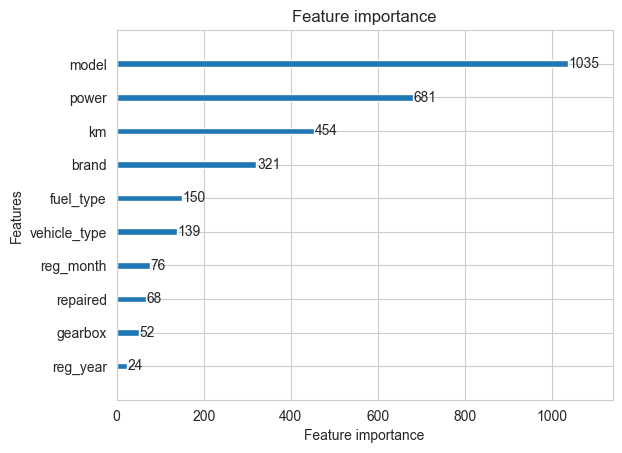

In [88]:
# Show important features
plot_importance(model)
plt.show()

## Conclusions: the best ML model is ***Gradient Boosting lgb.Dataset()***

- **The best advised model is ***Gradient Boosting lgb.Dataset()*** with the following hyper-parameters:**
    - 'metric' 'l2' 
    - 'max_depth' 5,
    - 'random_state' 5,
    - 'learning_rate' 0.1
    - num_boost_round=15,
    - verbose_eval=5
    
- **RMSE for validation data is 2248, while for test data is 2259, which are both less than agreed threshold 2500.**
- Execution time 453 ms, which is the quickest model amonth all.

***CatBoostRegressor is also a good model (RMSE for validation data is the best comparing with DT, RF). But the exetution time for training is around 1 hour, which prevent to admit this as the best solution for business.***


## <font color='orange'>Nice readings about gradient boosting</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Mатематика для DS https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* Новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***